In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file
file_path = "obs/MPCTune_1state1/MPCTune_1state1"
with open(file_path, "r") as f:
    data = json.load(f)

obs_array = data["observations"]
timesteps = np.arange(1, len(obs_array) + 1)

In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt

def plot_multiple_files(file_paths, plot_name, file_name, state_labels, timesteps, num_steps=1000):
    """
    Plots data from multiple files for comparison with custom subplot pairing.
    Converts pole angles and velocities from radians to degrees.
    """
    fig_labels = ["Cart", "Pole1", "Pole2", "Action"]
    index_pairs = [(0, 3), (1, 4), (2, 5), (6,)]  # Each tuple is one figure

    # Indices for pole angles and velocities
    degree_indices = [1, 2, 4, 5]  # 1 & 2: pole positions, 4 & 5: pole velocities

    # Load all data first
    all_data = []
    for file_path in file_paths:
        with open(file_path, "r") as f:
            data = json.load(f)
        obs_array = np.array(data["observations"][:num_steps])
        action_array = np.array(data["action"][:num_steps])

        # Convert radians to degrees for specific indices
        obs_array[:, degree_indices] = np.degrees(obs_array[:, degree_indices])

        combined_array = np.concatenate((obs_array, action_array), axis=1)
        all_data.append(combined_array)
        allreward = np.array(data["sum_reward"])
        print(f"File: {file_path}, Total Reward: {allreward}")

    # Plot using custom index pairs
    for fig_idx, idx_group in enumerate(index_pairs):
        n_subplots = len(idx_group)
        fig, axes = plt.subplots(1, n_subplots, figsize=(8 * n_subplots, 5), sharex=True)

        if n_subplots == 1:
            axes = [axes]  # Ensure iterable

        for ax, idx in zip(axes, idx_group):
            for file_index, combined_array in enumerate(all_data):
                ax.plot(timesteps[:num_steps], combined_array[:, idx],
                        label=f"{file_name[file_index]}", alpha=0.7)
            ax.set_title(state_labels[idx])
            ax.set_xlabel("Timesteps")
            ax.set_ylabel("Value" + (" (deg)" if idx in degree_indices else ""))
            ax.legend()
            ax.grid()

        fig.tight_layout()
        fig.suptitle(f"{plot_name} - {fig_labels[fig_idx]}", fontsize=14, y=1.02)
        plt.show()

In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Example usage
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_5m_play/SB3_SAC_5m_play"]
plot_name = "MPCTune Comparison of States 1 Weight"
file_name = ["State_1_Weight_1"]
timesteps = np.arange(1, 1001)  # Assuming you want to plot the first 1000 timesteps
plot_multiple_files(file_paths, plot_name, file_name, state_labels, timesteps)

KeyError: 'action'

File: obs/SB3_SAC_Opposit10/SB3_SAC_Opposit10, Total Reward: 9.87343692779541
File: obs/SB3Test_Opposit10/SB3Test_Opposit10, Total Reward: 9.718039512634277


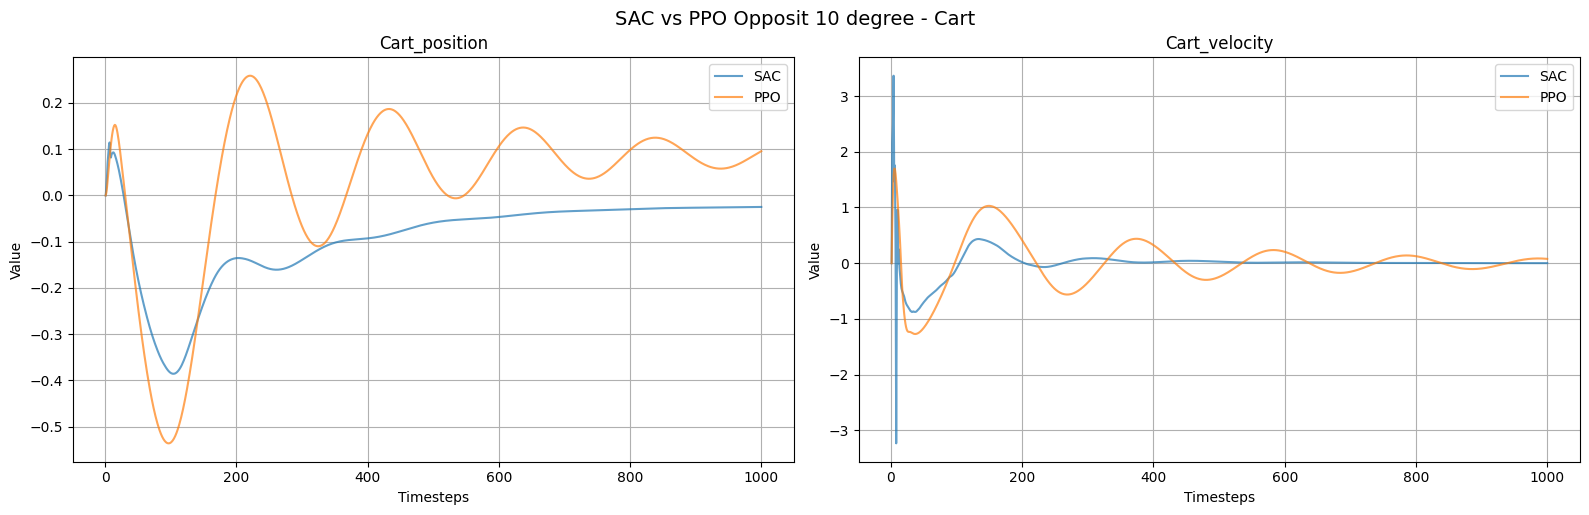

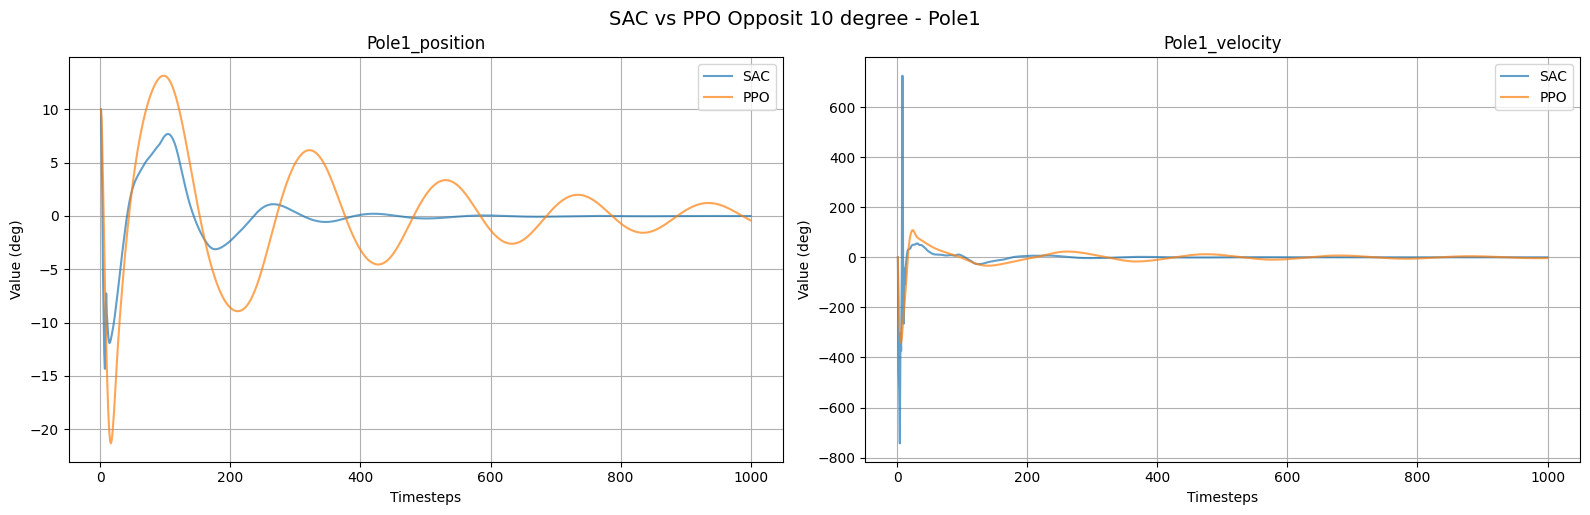

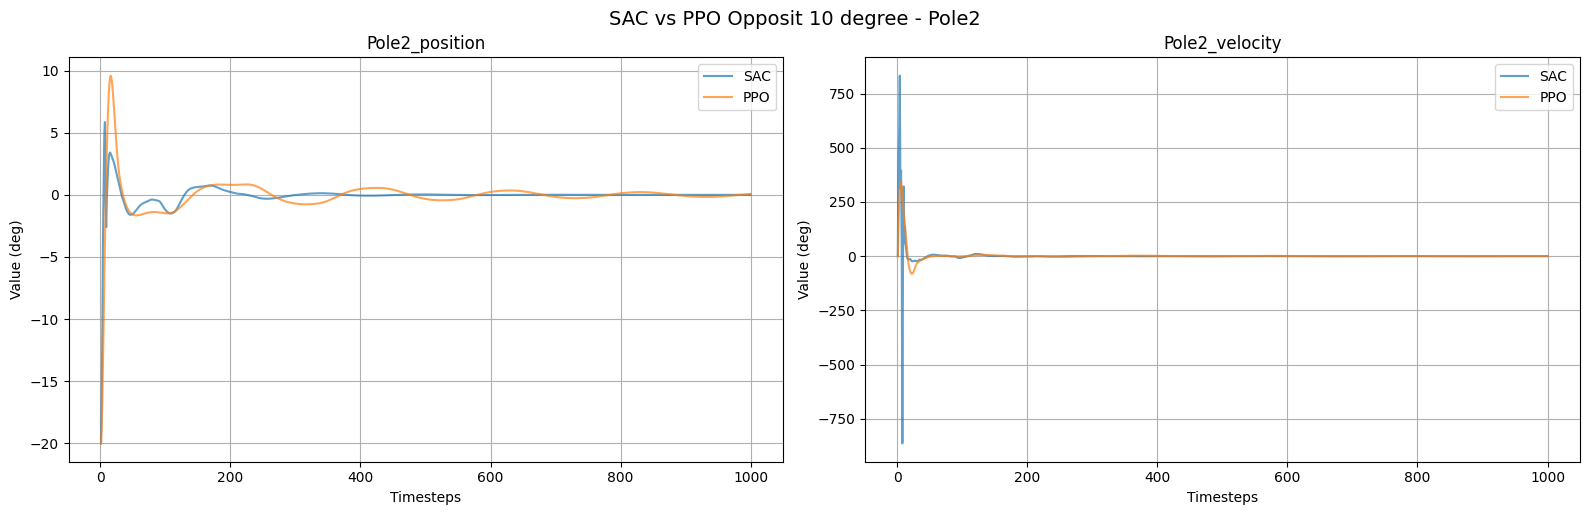

In [10]:
def plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps, num_steps=1000):
    """
    Plots state data (excluding actions) from multiple JSON files.
    Converts pole-related values from radians to degrees.
    
    Parameters:
    - file_paths: List of paths to JSON files.
    - plot_name: Title for the plots.
    - file_name: List of labels for each file.
    - state_labels: List of state variable names.
    - timesteps: Array of timestep values.
    - num_steps: Number of steps to plot.
    """
    fig_labels = ["Cart", "Pole1", "Pole2"]
    index_pairs = [(0, 3), (1, 4), (2, 5)]  # (position, velocity) for each state group

    degree_indices = [1, 2, 4, 5]  # Indices to convert from rad to deg

    # Load and prepare data
    all_data = []
    for file_path in file_paths:
        with open(file_path, "r") as f:
            data = json.load(f)

        obs_array = np.array(data["observations"][:num_steps])

        # Convert selected states to degrees
        obs_array[:, degree_indices] = np.degrees(obs_array[:, degree_indices])
        all_data.append(obs_array)
        allreward = np.array(data["sum_reward"])
        print(f"File: {file_path}, Total Reward: {allreward}")

    # Plot grouped states
    for fig_idx, idx_group in enumerate(index_pairs):
        fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=True)

        for ax, idx in zip(axes, idx_group):
            for file_index, obs_array in enumerate(all_data):
                ax.plot(timesteps[:num_steps], obs_array[:, idx],
                        label=f"{file_name[file_index]}", alpha=0.7)

            label_suffix = " (deg)" if idx in degree_indices else ""
            ax.set_title(state_labels[idx])
            ax.set_xlabel("Timesteps")
            ax.set_ylabel(f"Value{label_suffix}")
            ax.legend()
            ax.grid()

        fig.tight_layout()
        fig.suptitle(f"{plot_name} - {fig_labels[fig_idx]}", fontsize=14, y=1.02)
        plt.show()
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Opposit10/SB3_SAC_Opposit10","obs/SB3Test_Opposit10/SB3Test_Opposit10"]
plot_name = "SAC vs PPO Opposit 10 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)


File: obs/SB3_SAC_Opposit5/SB3_SAC_Opposit5, Total Reward: 9.968977928161621
File: obs/SB3_PPO_Opposit5/SB3_PPO_Opposit5, Total Reward: 9.861199378967285


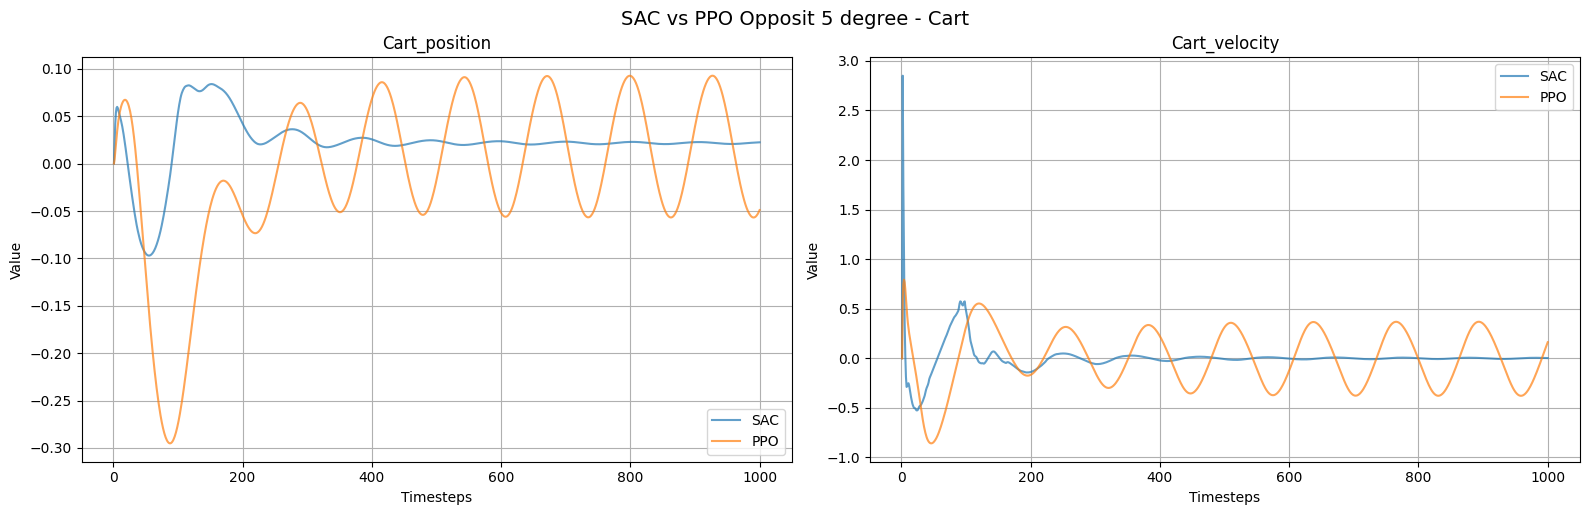

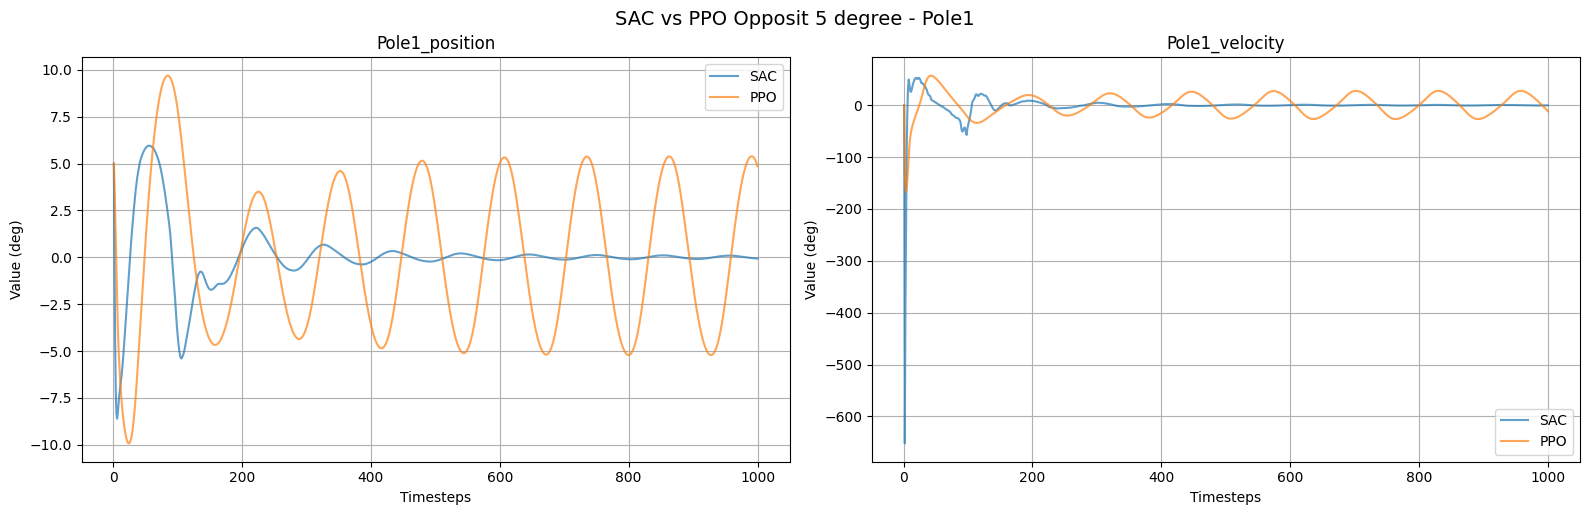

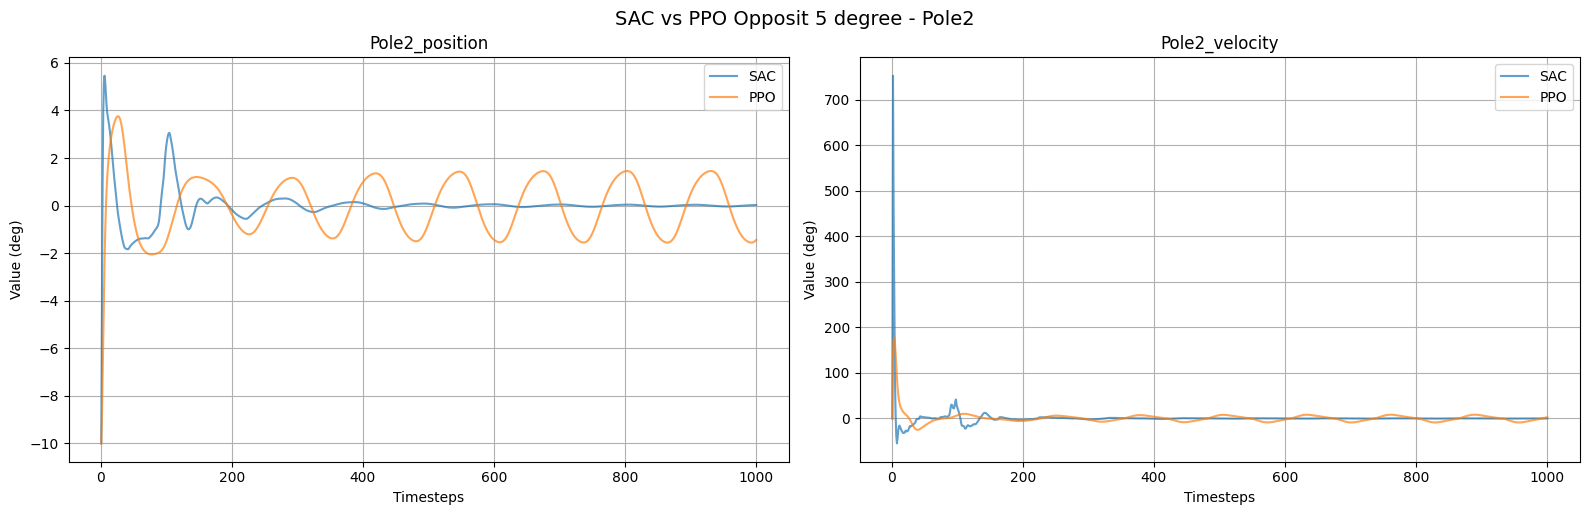

In [8]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Opposit5/SB3_SAC_Opposit5","obs/SB3_PPO_Opposit5/SB3_PPO_Opposit5"]
plot_name = "SAC vs PPO Opposit 5 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Opposit15/SB3_SAC_Opposit15, Total Reward: 9.879678726196289
File: obs/SB3_PPO_Opposit15/SB3_PPO_Opposit15, Total Reward: 9.67954158782959


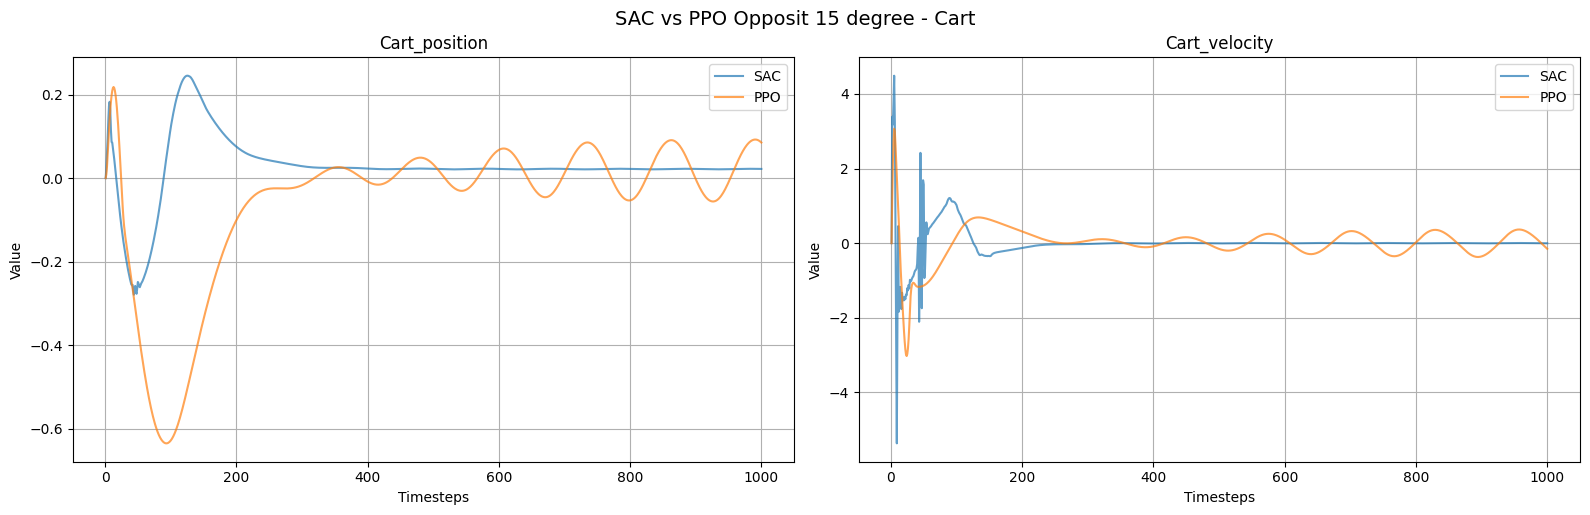

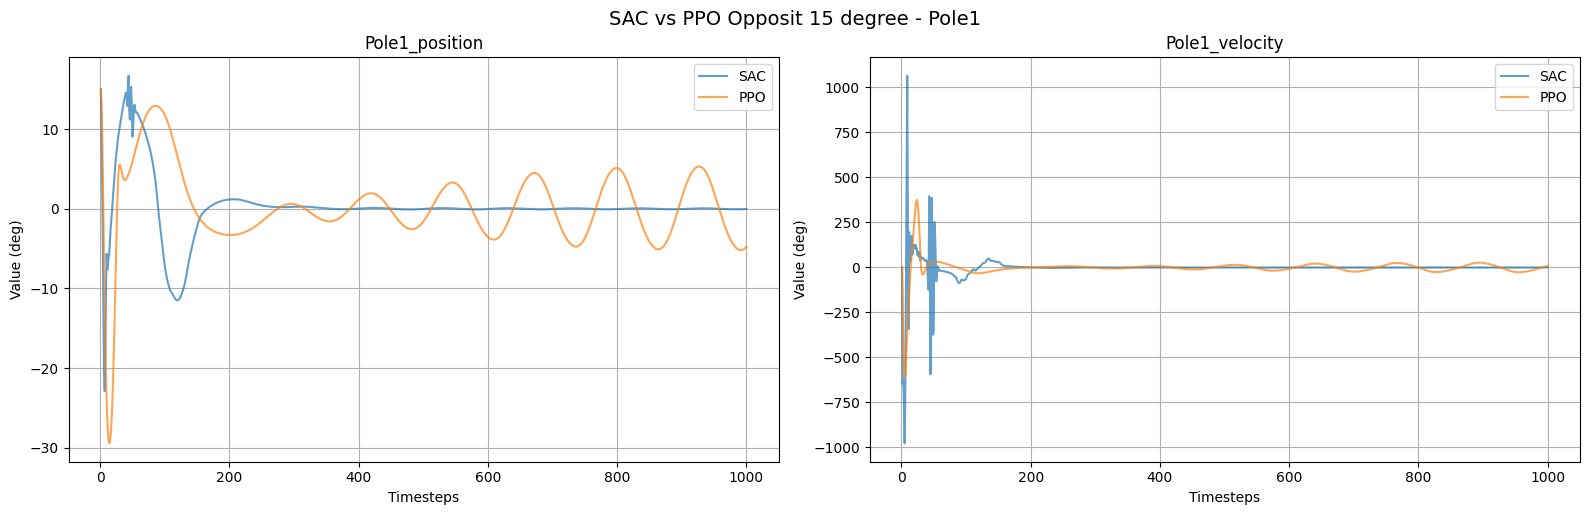

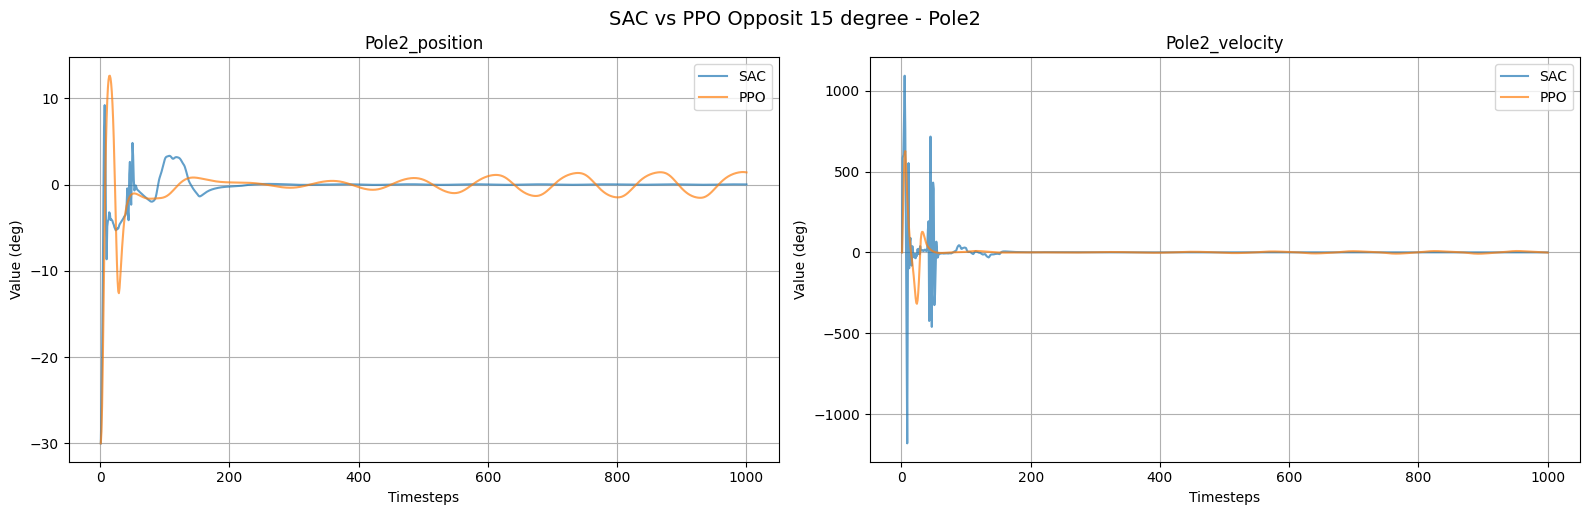

In [12]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Opposit15/SB3_SAC_Opposit15","obs/SB3_PPO_Opposit15/SB3_PPO_Opposit15"]
plot_name = "SAC vs PPO Opposit 15 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same5/SB3_SAC_Same5, Total Reward: 9.972152709960938
File: obs/SB3_PPO_Same5/SB3_PPO_Same5, Total Reward: 9.876129150390625


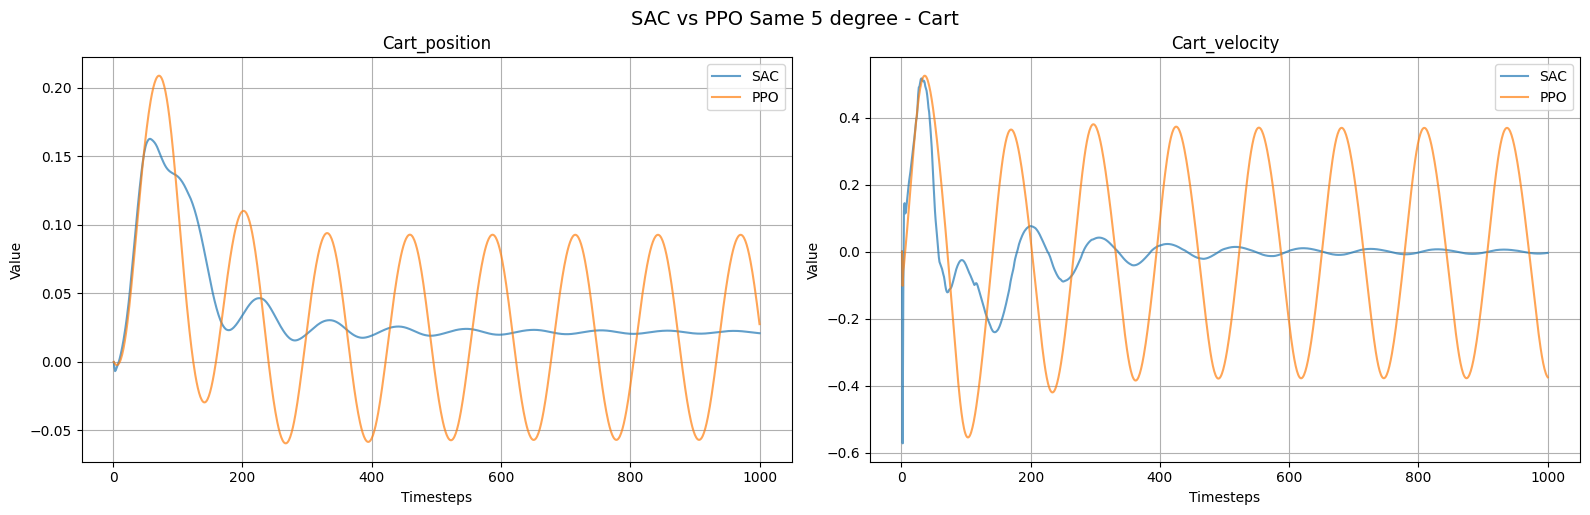

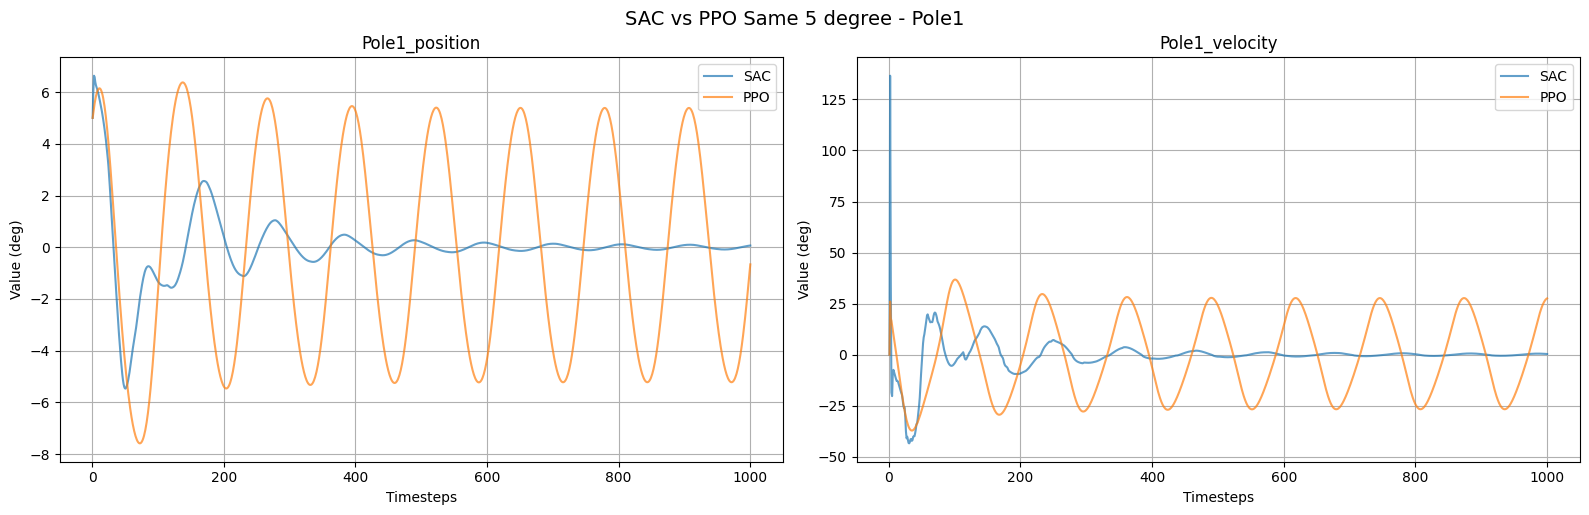

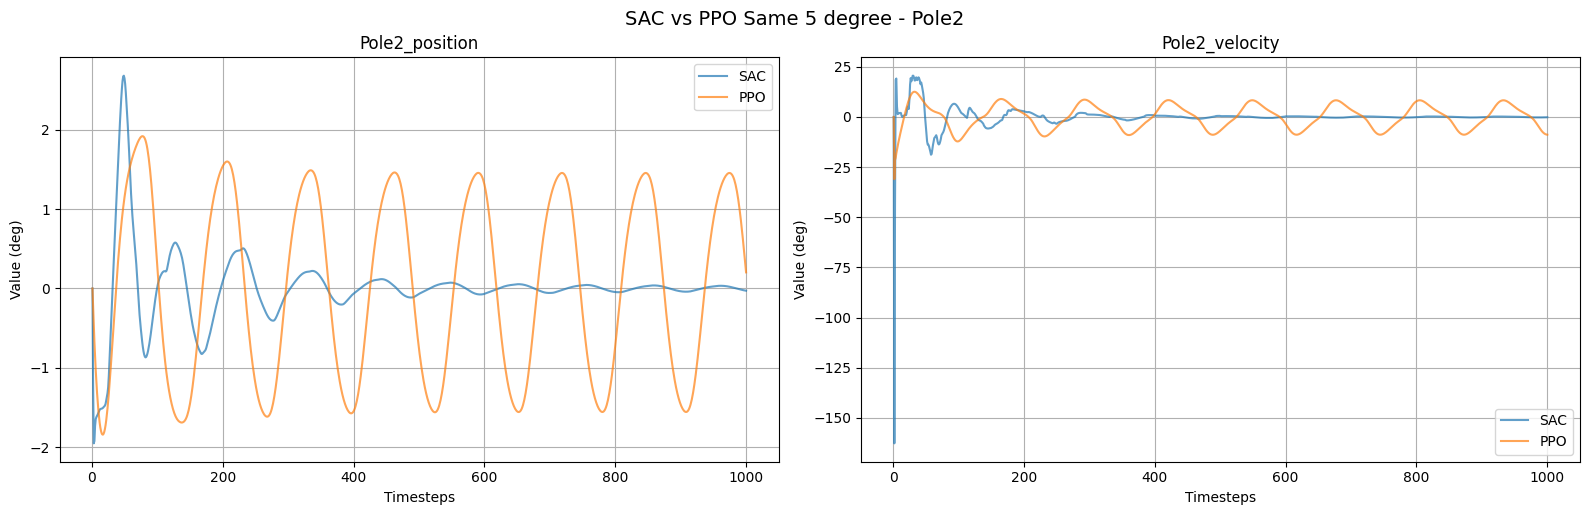

In [13]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same5/SB3_SAC_Same5","obs/SB3_PPO_Same5/SB3_PPO_Same5"]
plot_name = "SAC vs PPO Same 5 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same10/SB3_SAC_Same10, Total Reward: 9.93685245513916
File: obs/SB3_PPO_Same10/SB3_PPO_Same10, Total Reward: 9.815526962280273


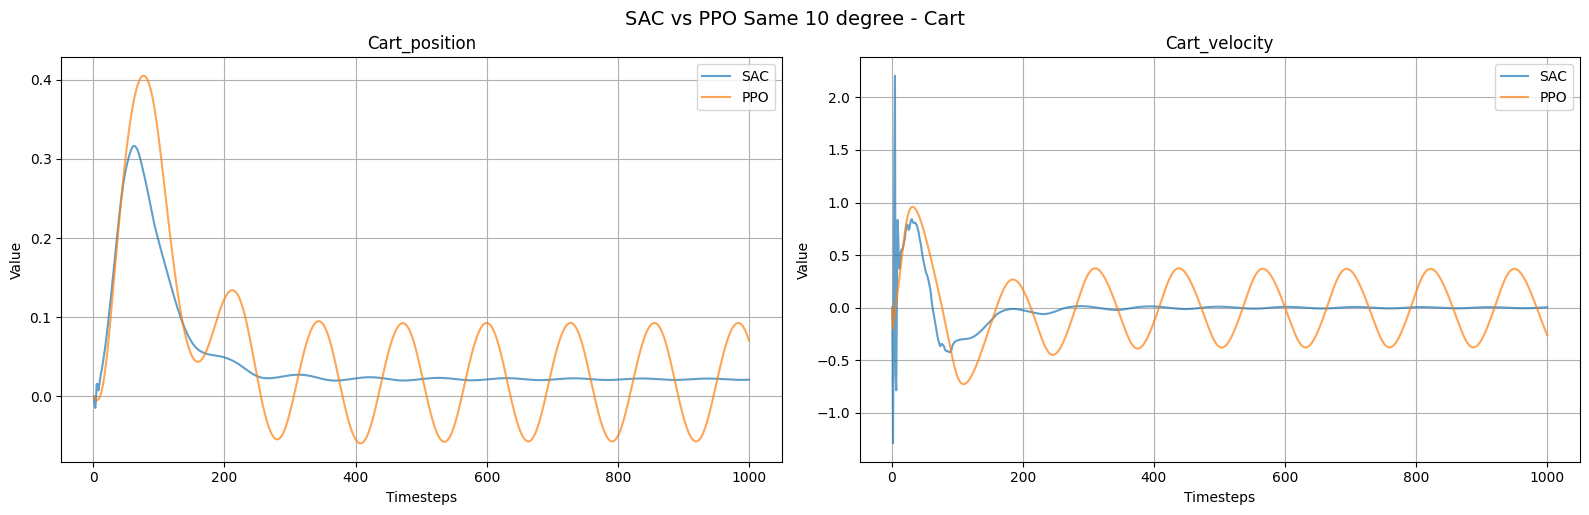

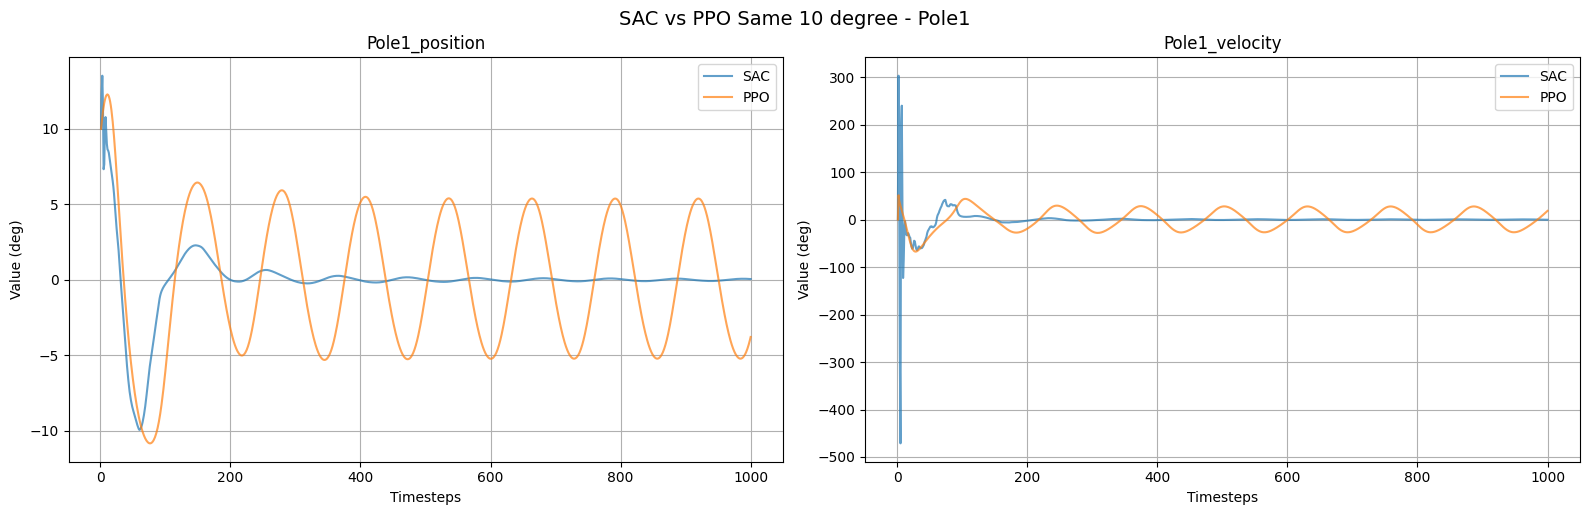

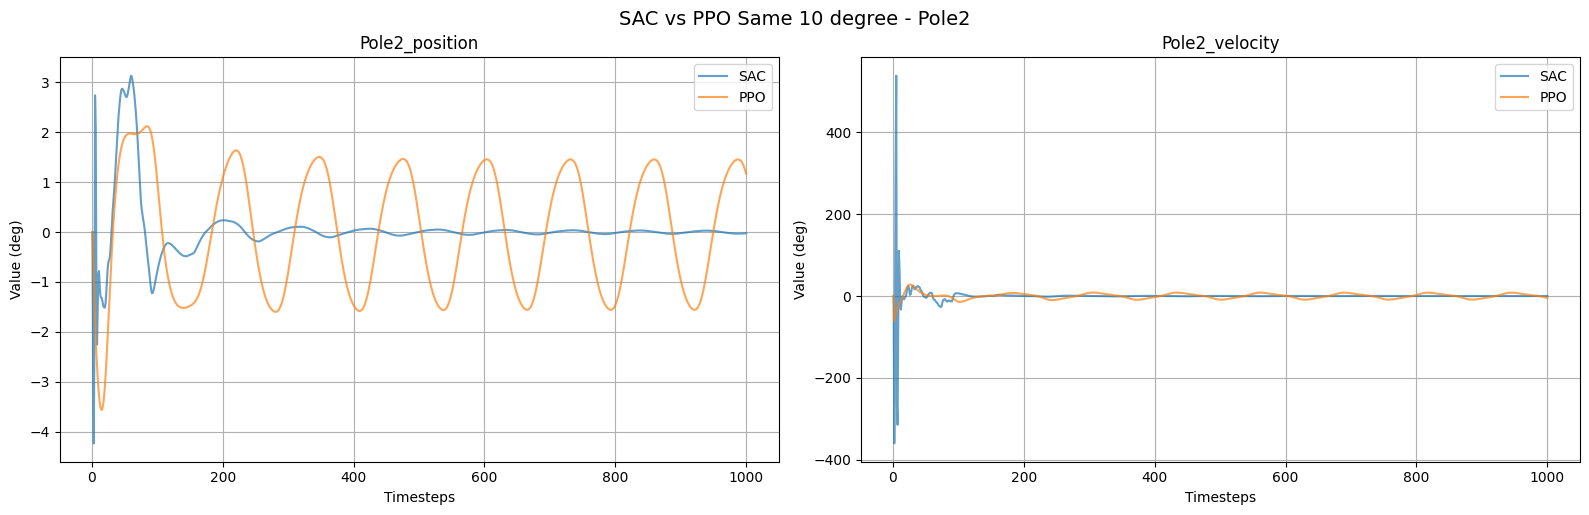

In [15]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same10/SB3_SAC_Same10","obs/SB3_PPO_Same10/SB3_PPO_Same10"]
plot_name = "SAC vs PPO Same 10 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same20/SB3_SAC_Same20, Total Reward: 9.701165199279785
File: obs/SB3_PPO_Same20/SB3_PPO_Same20, Total Reward: 9.532508850097656


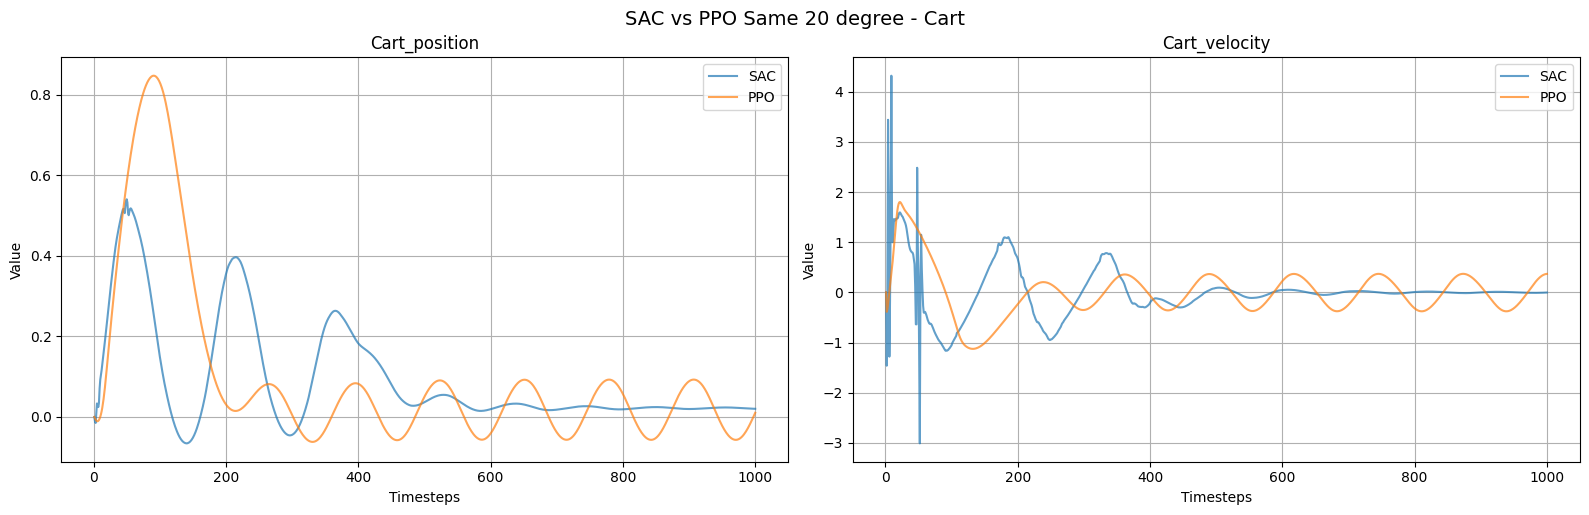

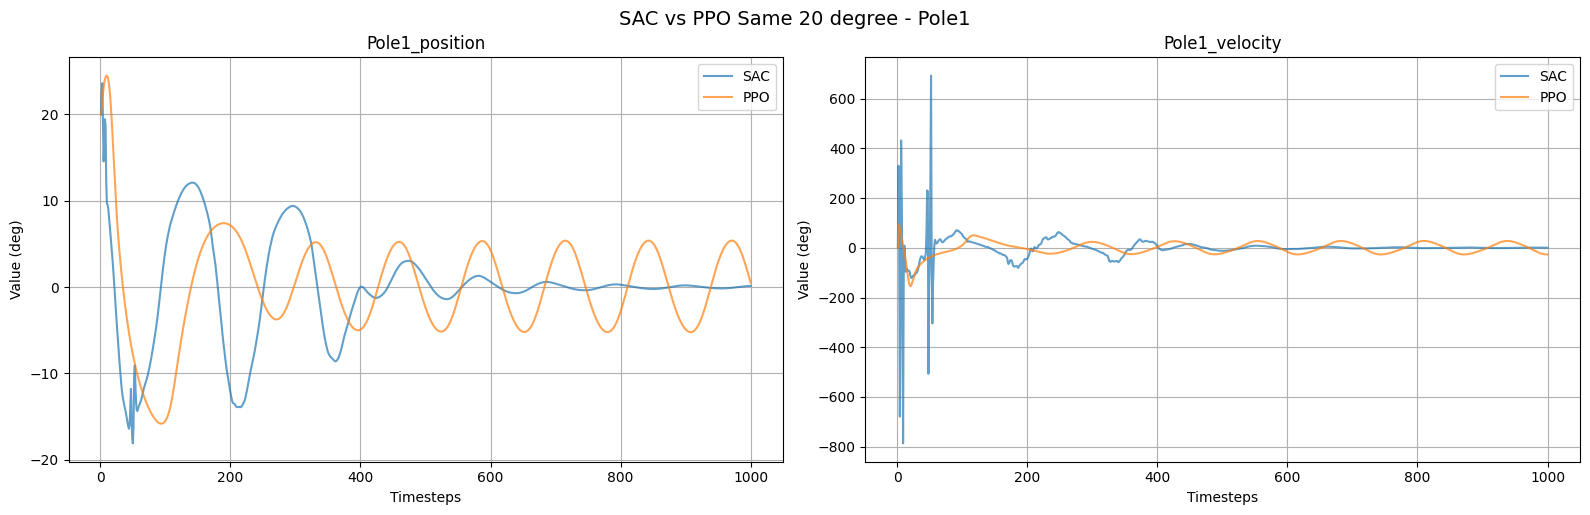

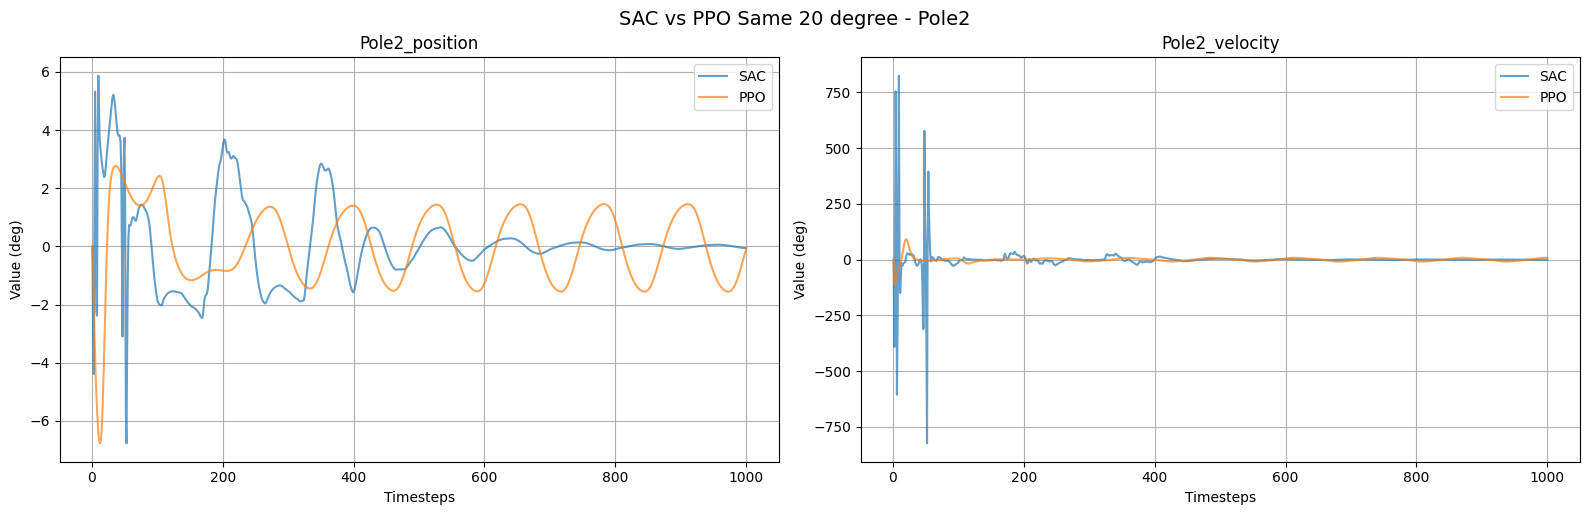

In [17]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same20/SB3_SAC_Same20","obs/SB3_PPO_Same20/SB3_PPO_Same20"]
plot_name = "SAC vs PPO Same 20 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same30/SB3_SAC_Same30, Total Reward: 9.457481384277344
File: obs/SB3_PPO_Same30/SB3_PPO_Same30, Total Reward: 9.278450965881348


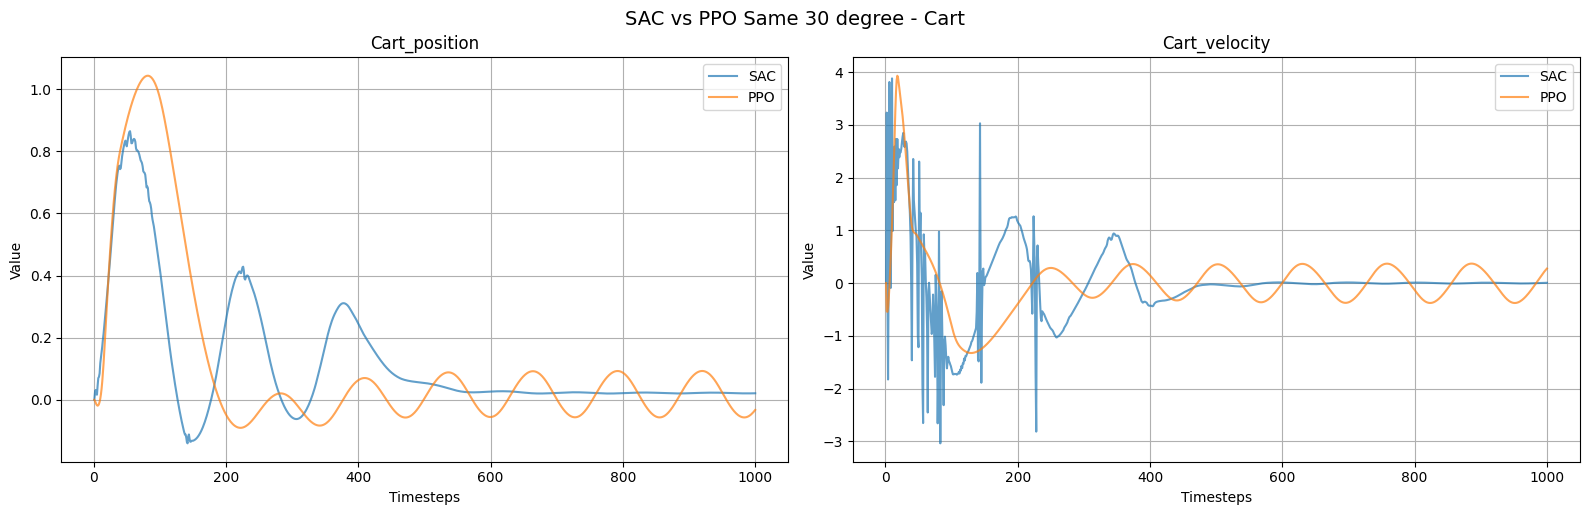

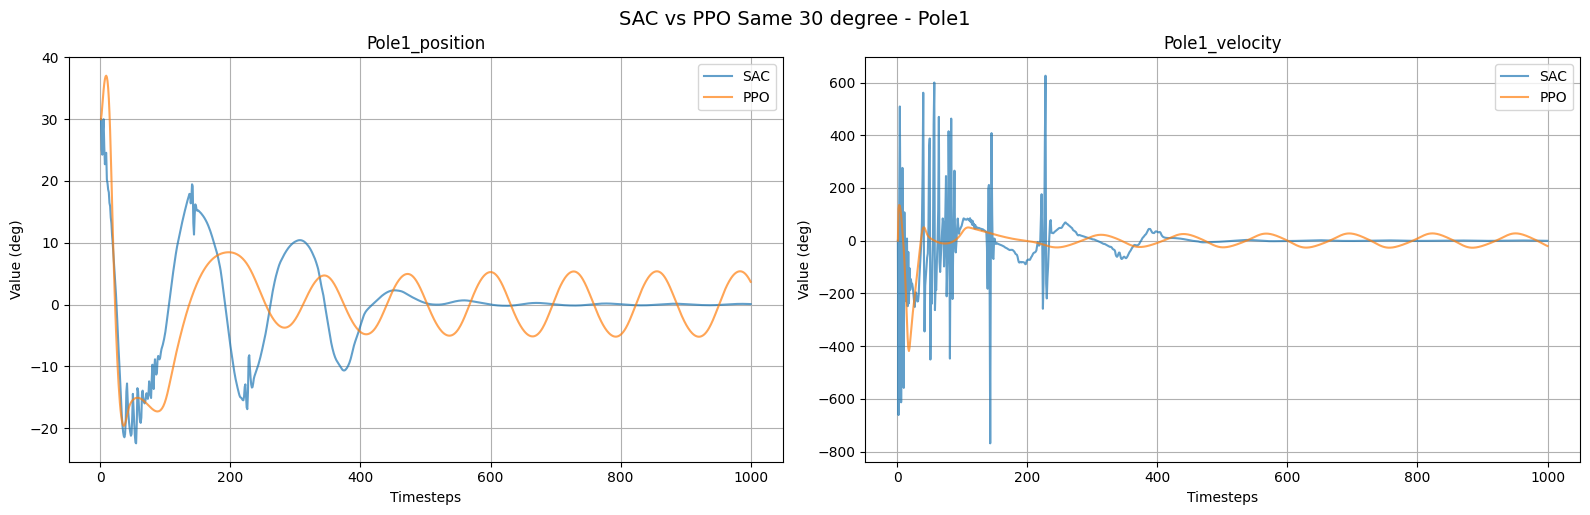

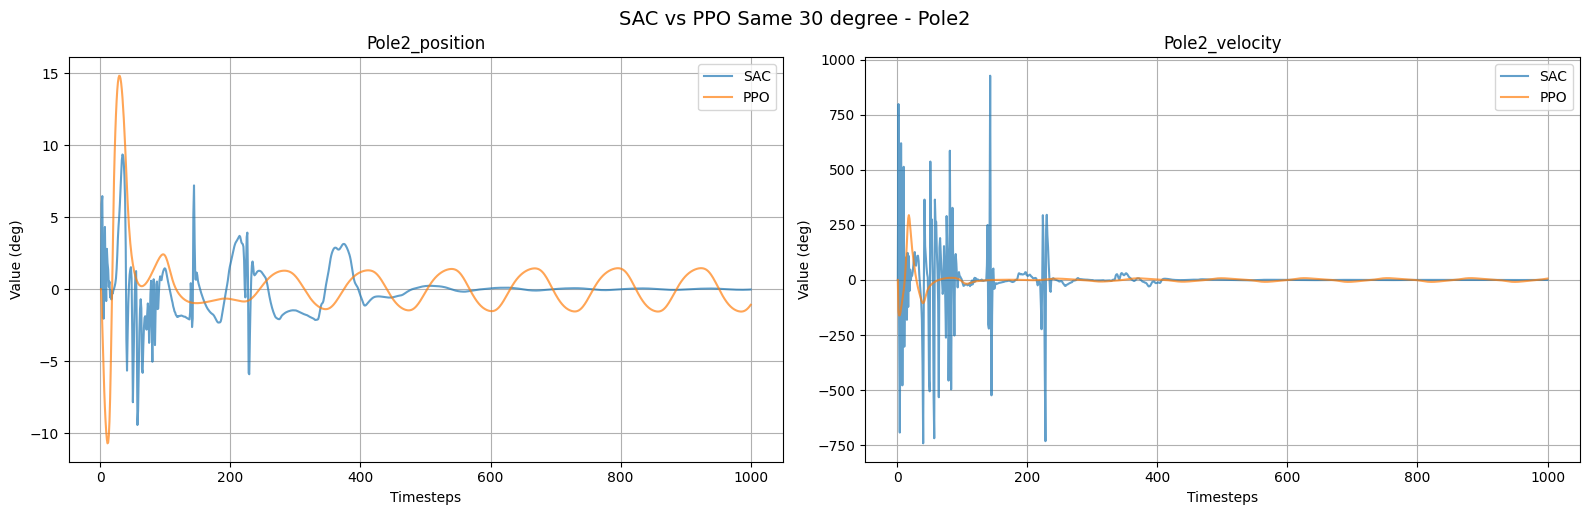

In [18]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same30/SB3_SAC_Same30","obs/SB3_PPO_Same30/SB3_PPO_Same30"]
plot_name = "SAC vs PPO Same 30 degree"
file_name = ["SAC","PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_SAC_Same40/SB3_SAC_Same40, Total Reward: 9.14755916595459
File: obs/SB3_PPO_Same40/SB3_PPO_Same40, Total Reward: -1.1951254606246948


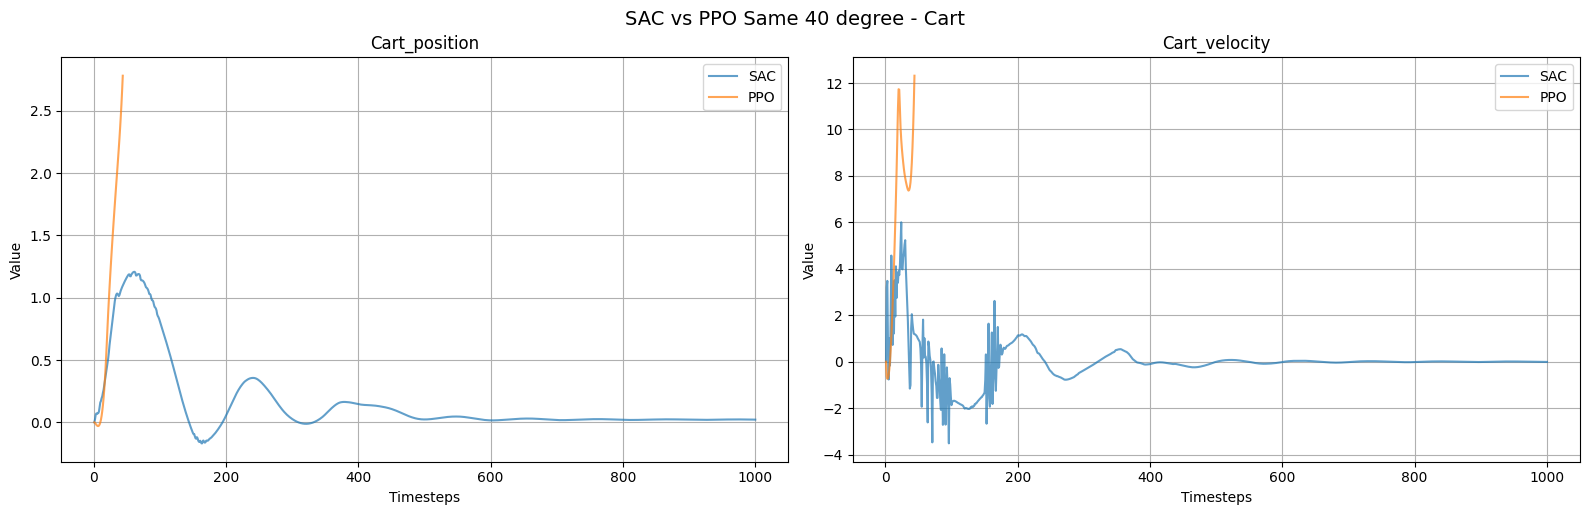

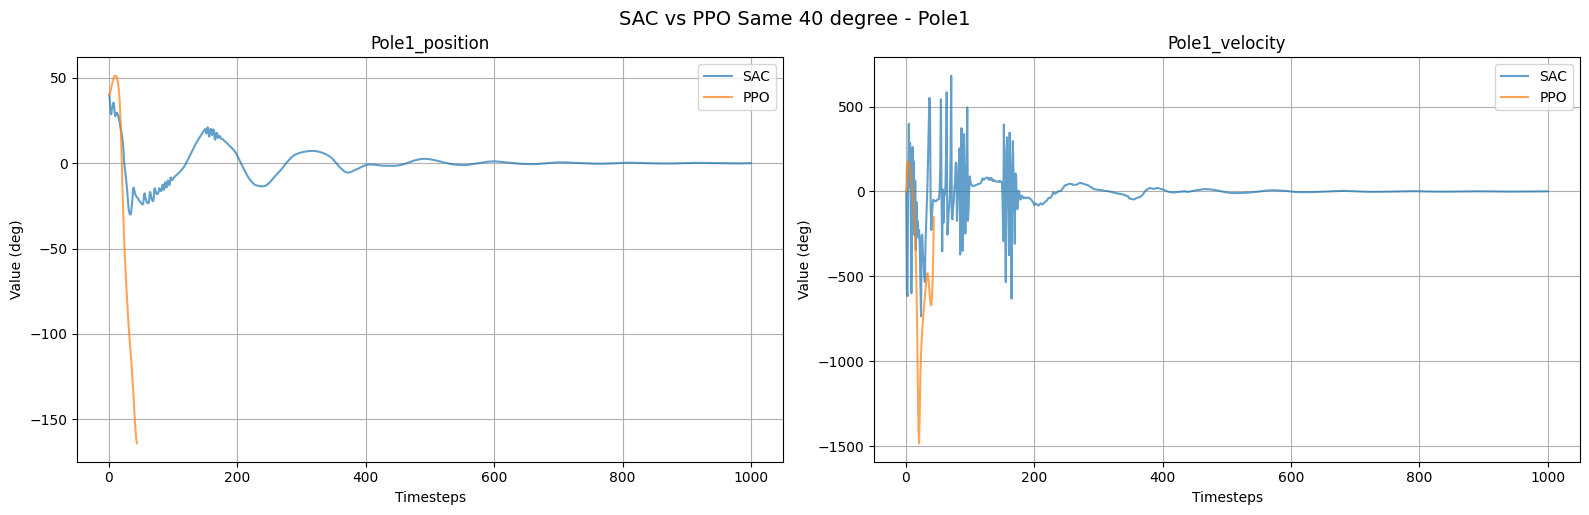

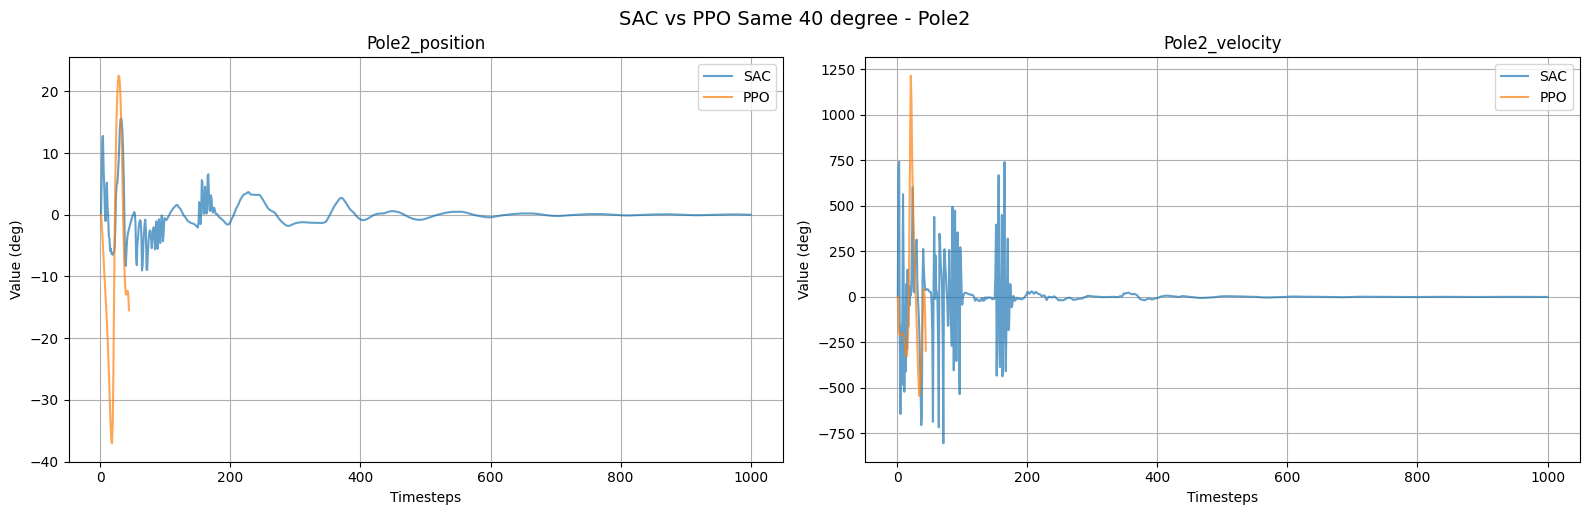

In [21]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_SAC_Same40/SB3_SAC_Same40","obs/SB3_PPO_Same40/SB3_PPO_Same40"]
plot_name = "SAC vs PPO Same 40 degree"
file_name = ["SAC","PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_BestRRSAC_Opposit/SB3_BestRRSAC_Opposit, Total Reward: 8.828751564025879


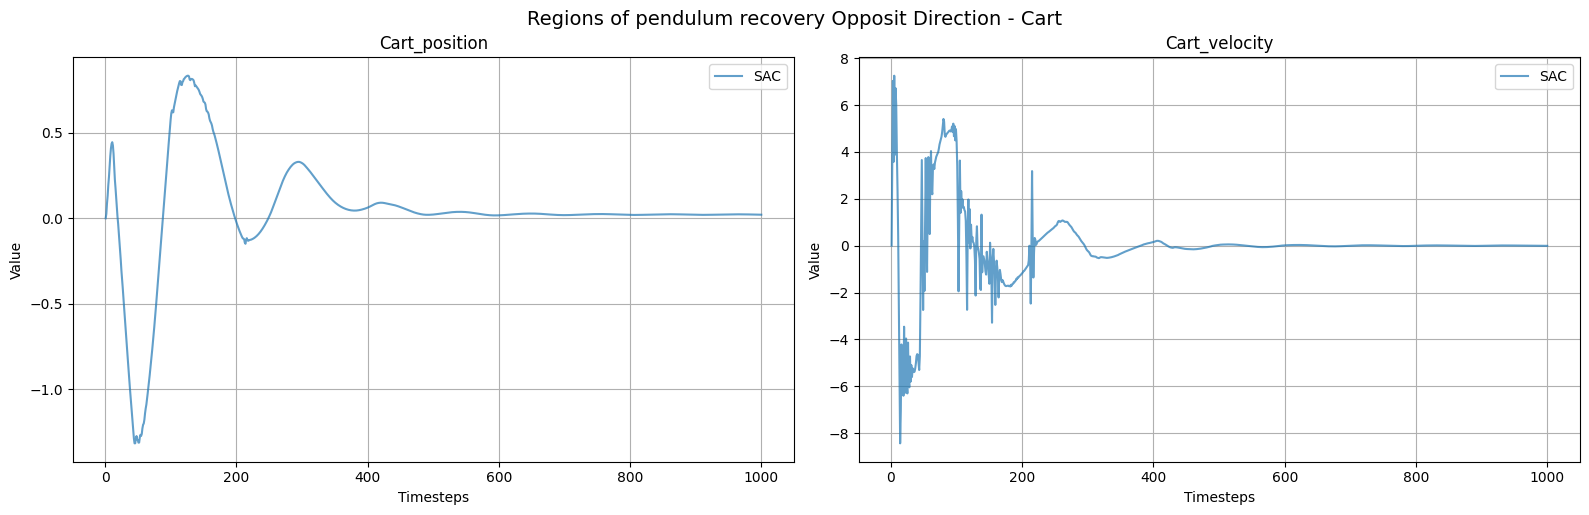

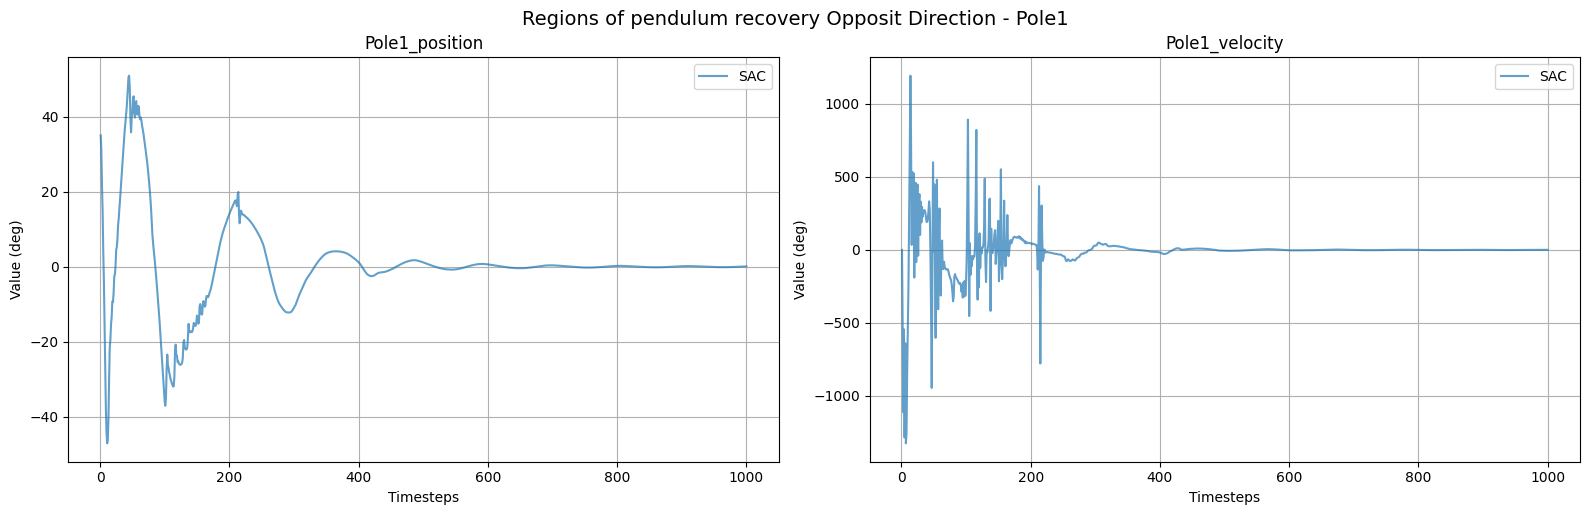

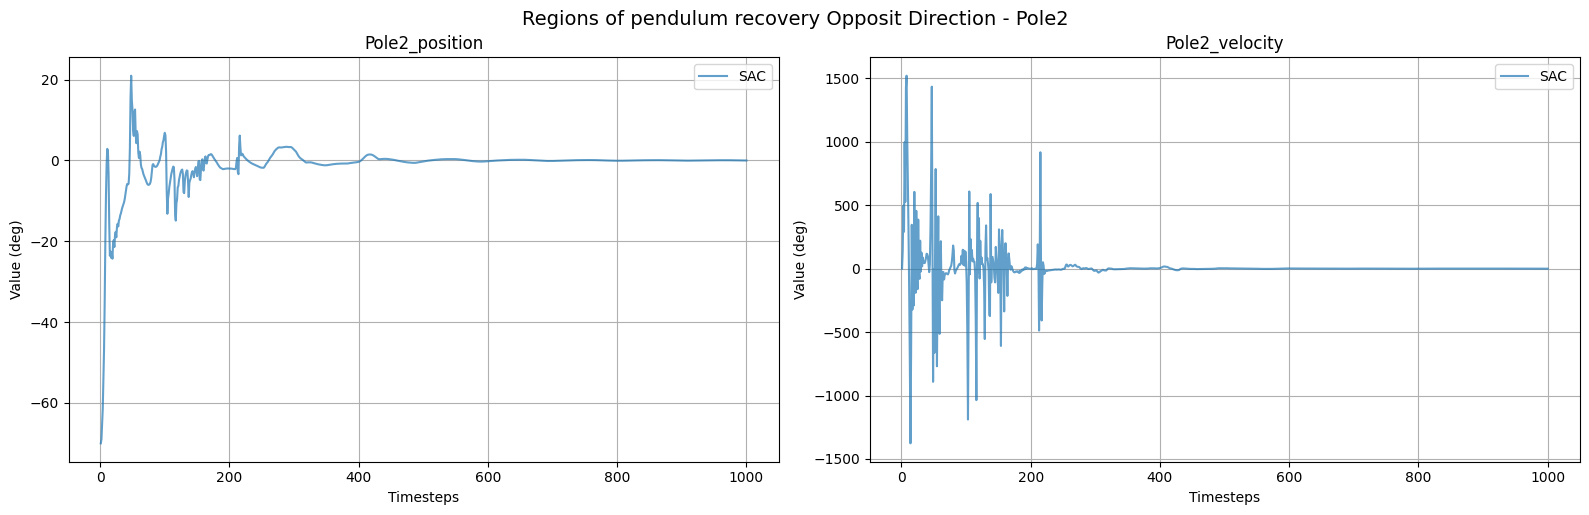

In [22]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRSAC_Opposit/SB3_BestRRSAC_Opposit"]
plot_name = "Regions of pendulum recovery Opposit Direction"
file_name = ["SAC"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_BestRRSAC_Same/SB3_BestRRSAC_Same, Total Reward: 8.923684120178223


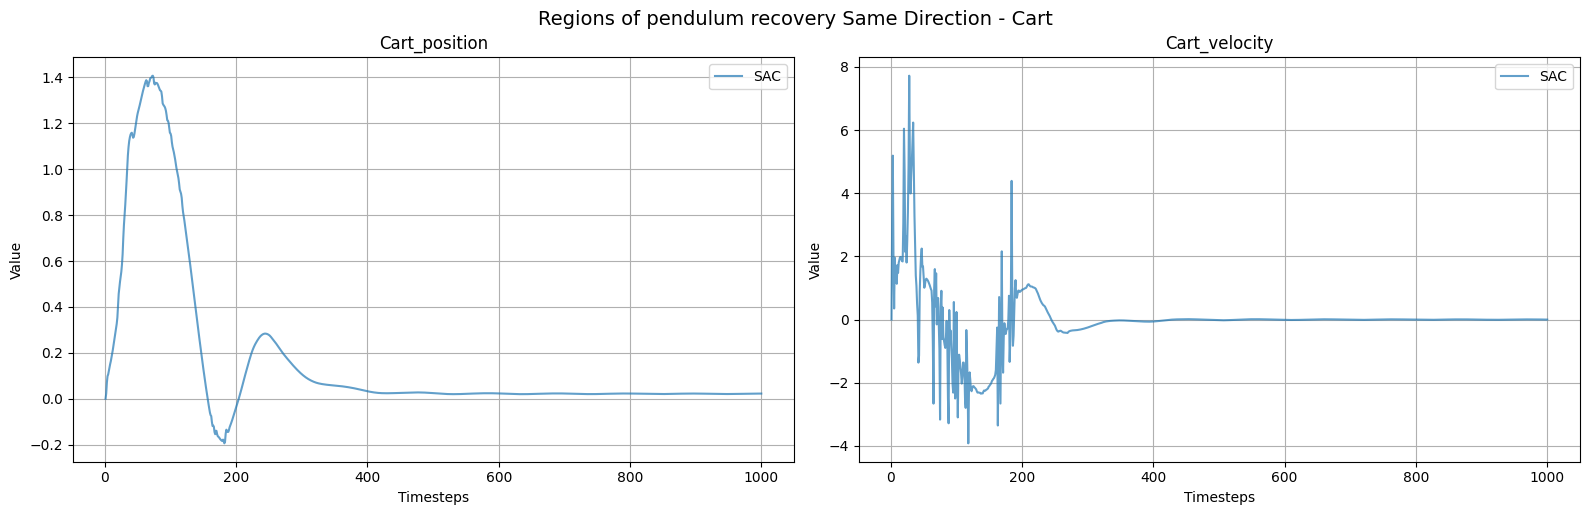

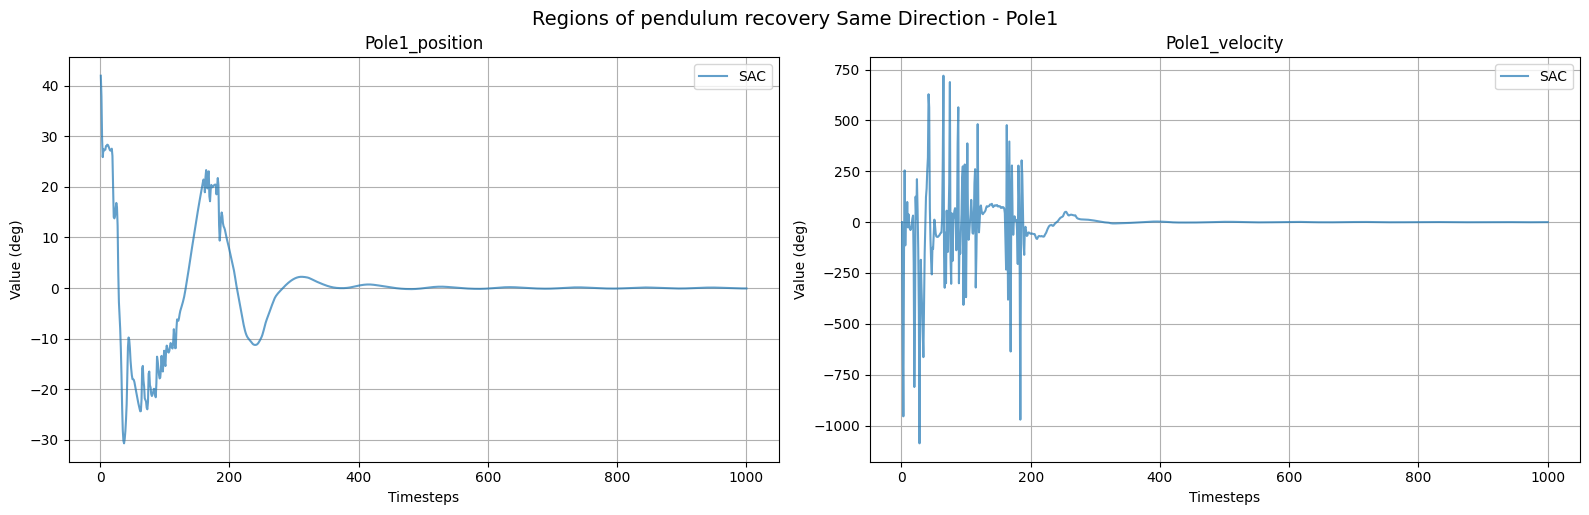

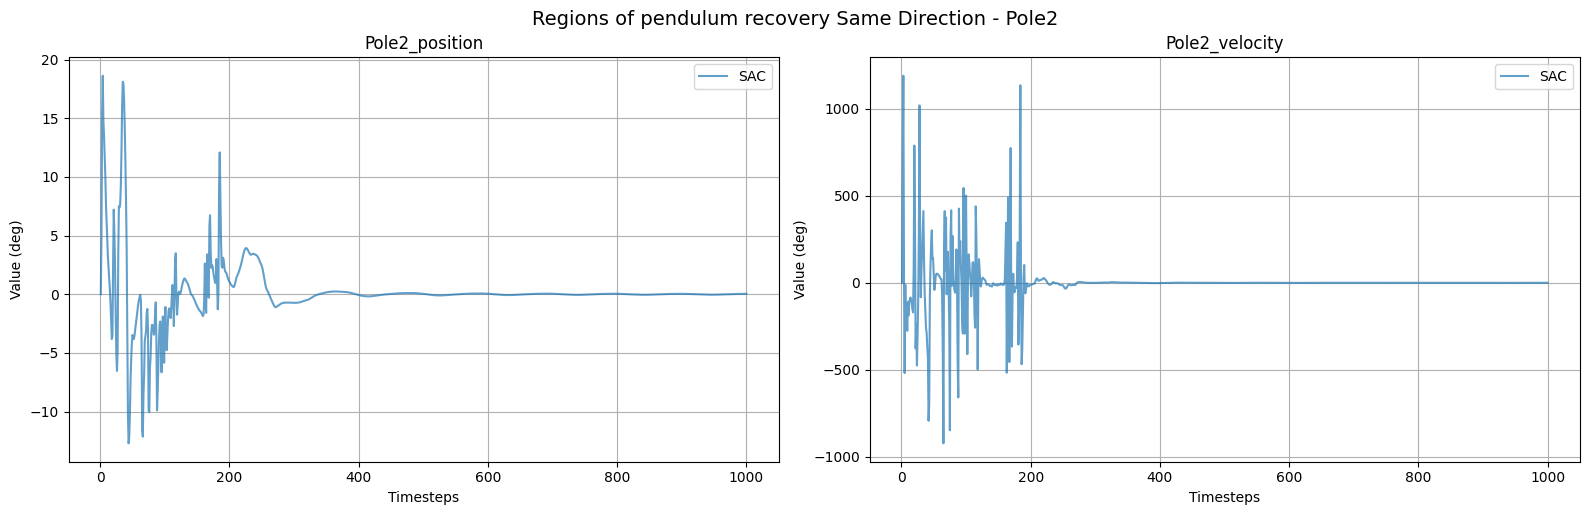

In [23]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRSAC_Same/SB3_BestRRSAC_Same"]
plot_name = "Regions of pendulum recovery Same Direction"
file_name = ["SAC"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_BestRRPPO_Opposit/SB3_BestRRPPO_Opposit, Total Reward: 8.740642547607422


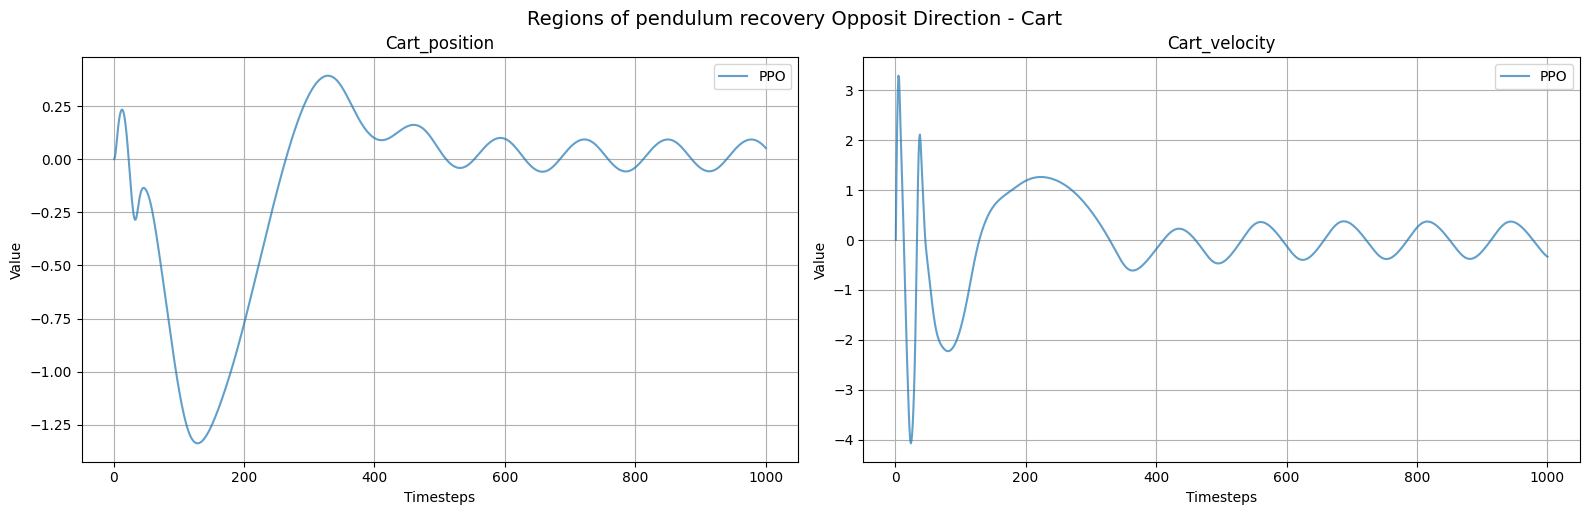

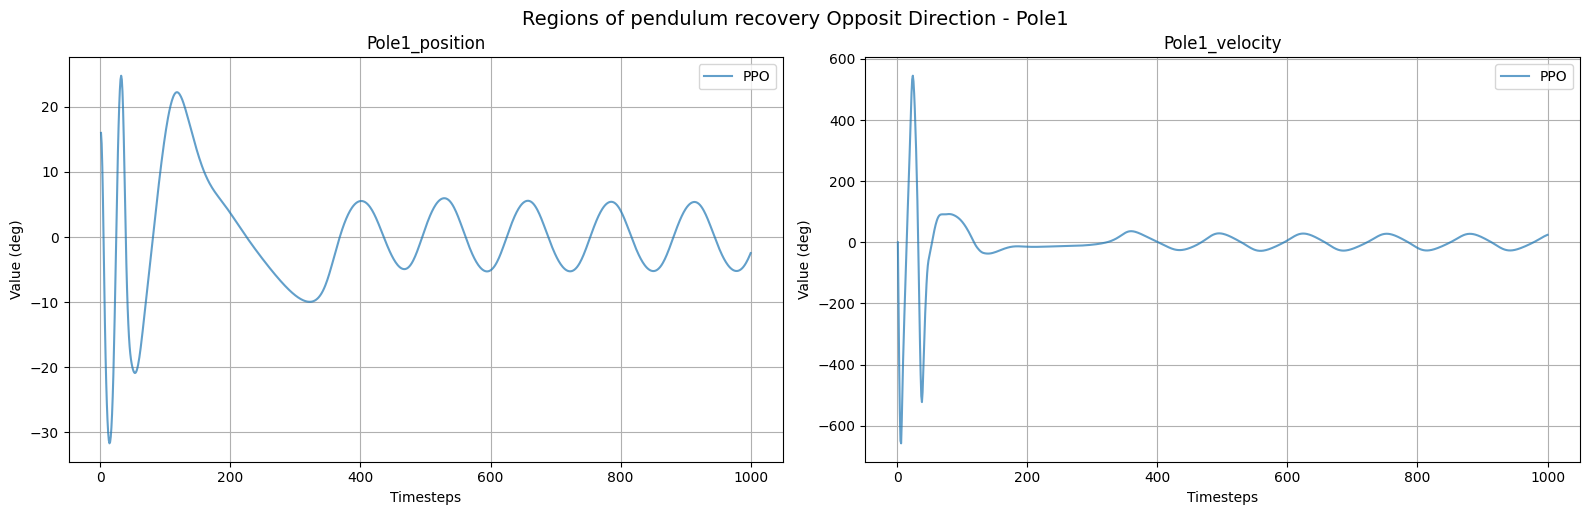

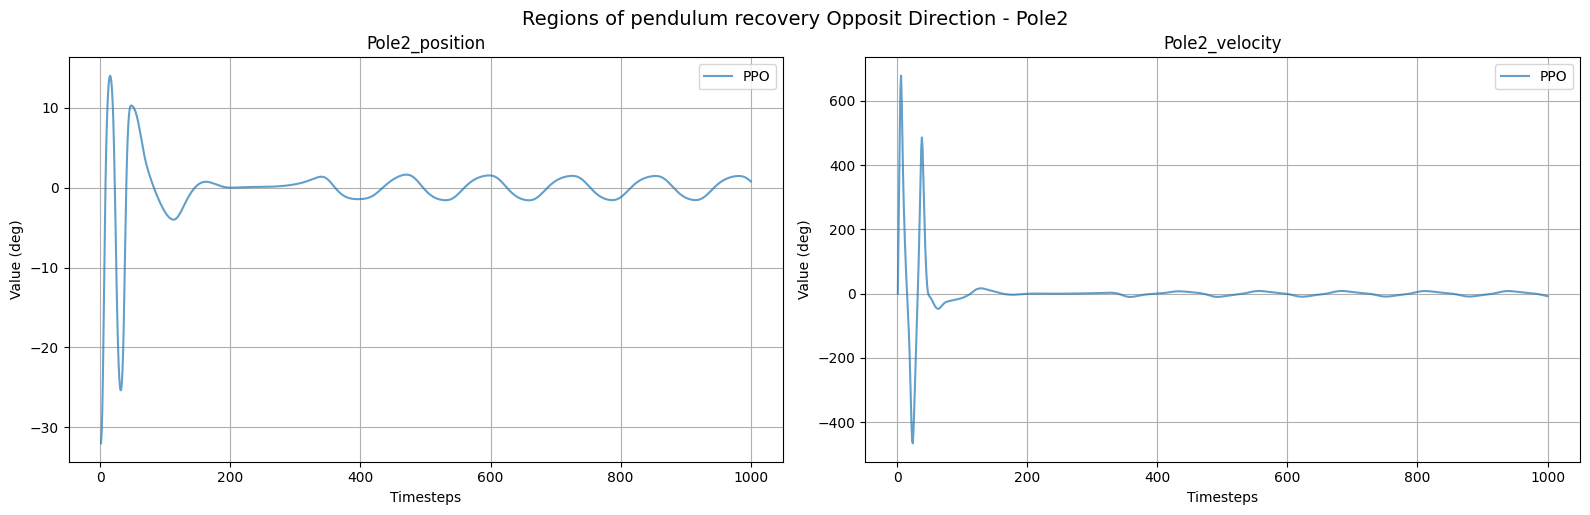

In [24]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRPPO_Opposit/SB3_BestRRPPO_Opposit"]
plot_name = "Regions of pendulum recovery Opposit Direction"
file_name = ["PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3_BestRRPPO_Same/SB3_BestRRPPO_Same, Total Reward: 9.20157241821289


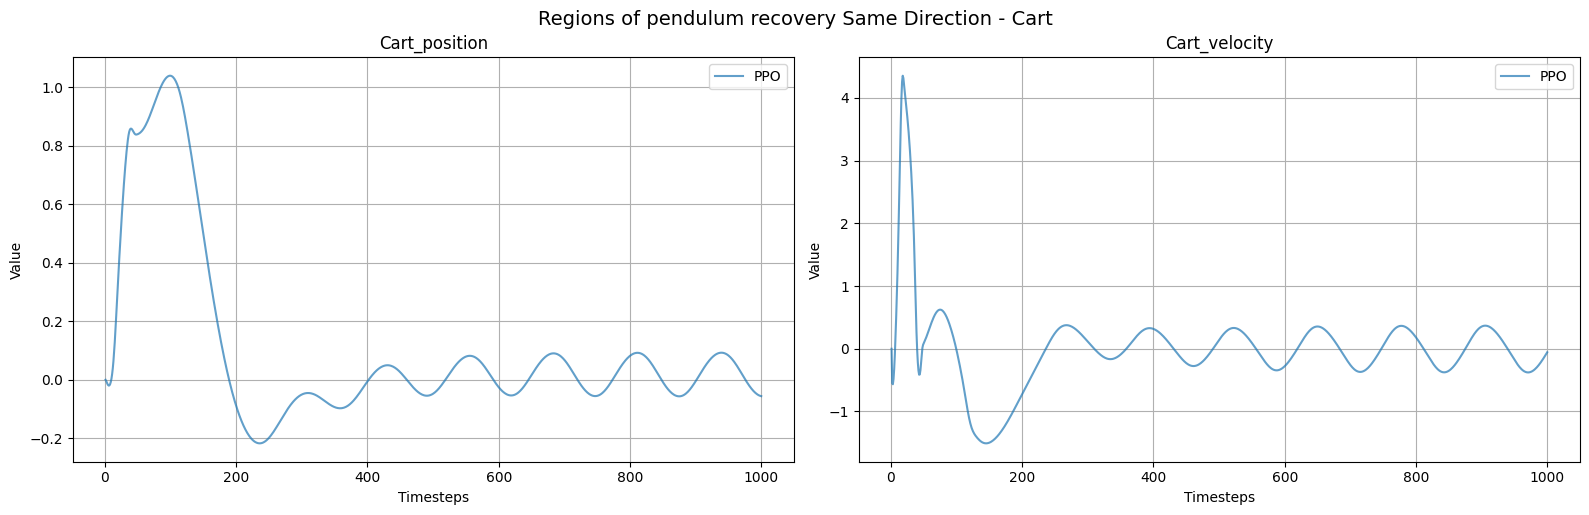

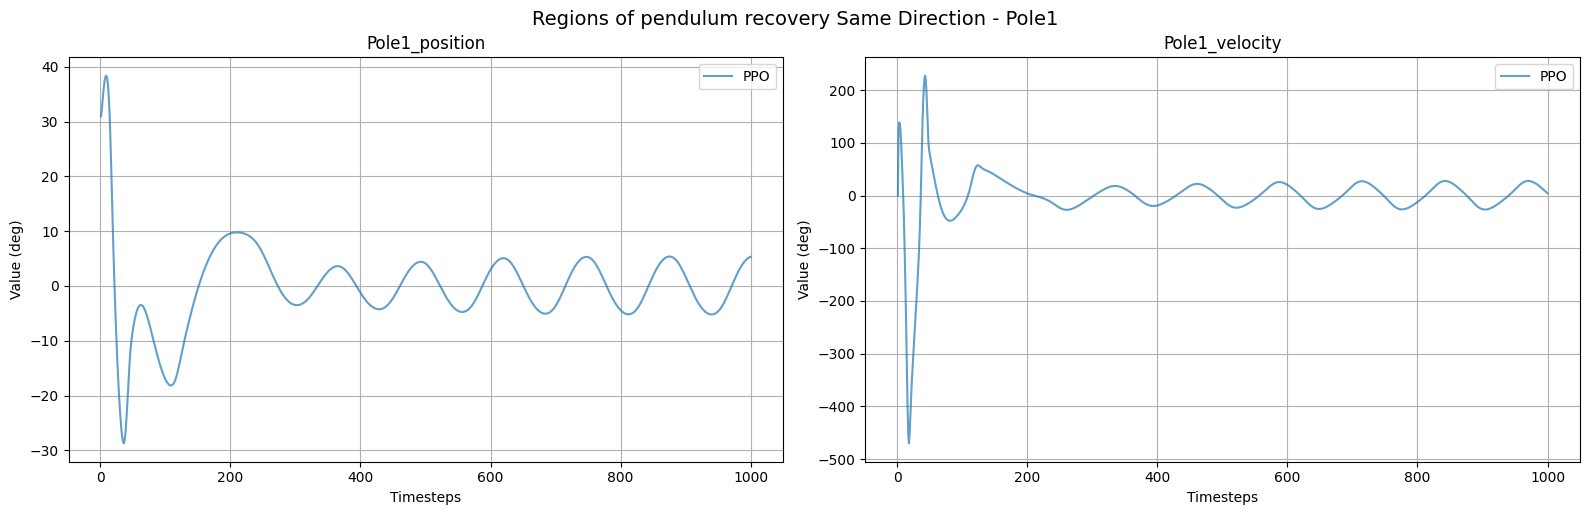

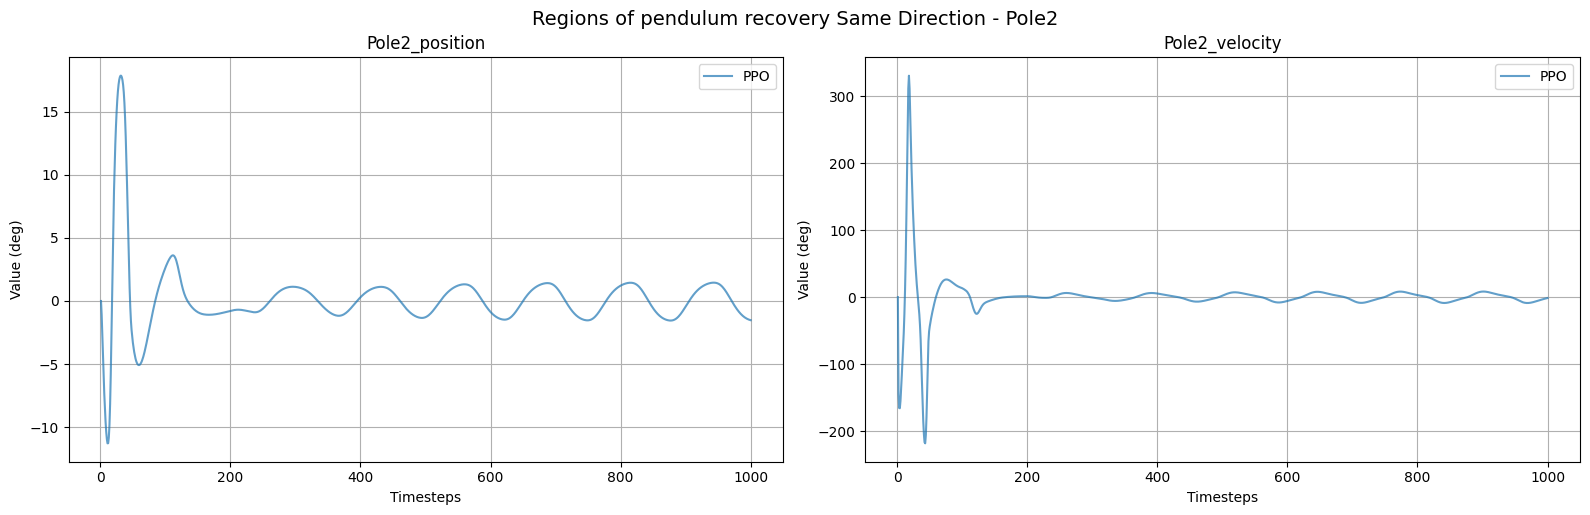

In [26]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/SB3_BestRRPPO_Same/SB3_BestRRPPO_Same"]
plot_name = "Regions of pendulum recovery Same Direction"
file_name = ["PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Opposit10/MPCTest_Opposit10, Total Reward: 9.563526153564453
File: obs/SB3Test_Opposit10/SB3Test_Opposit10, Total Reward: 9.718039512634277


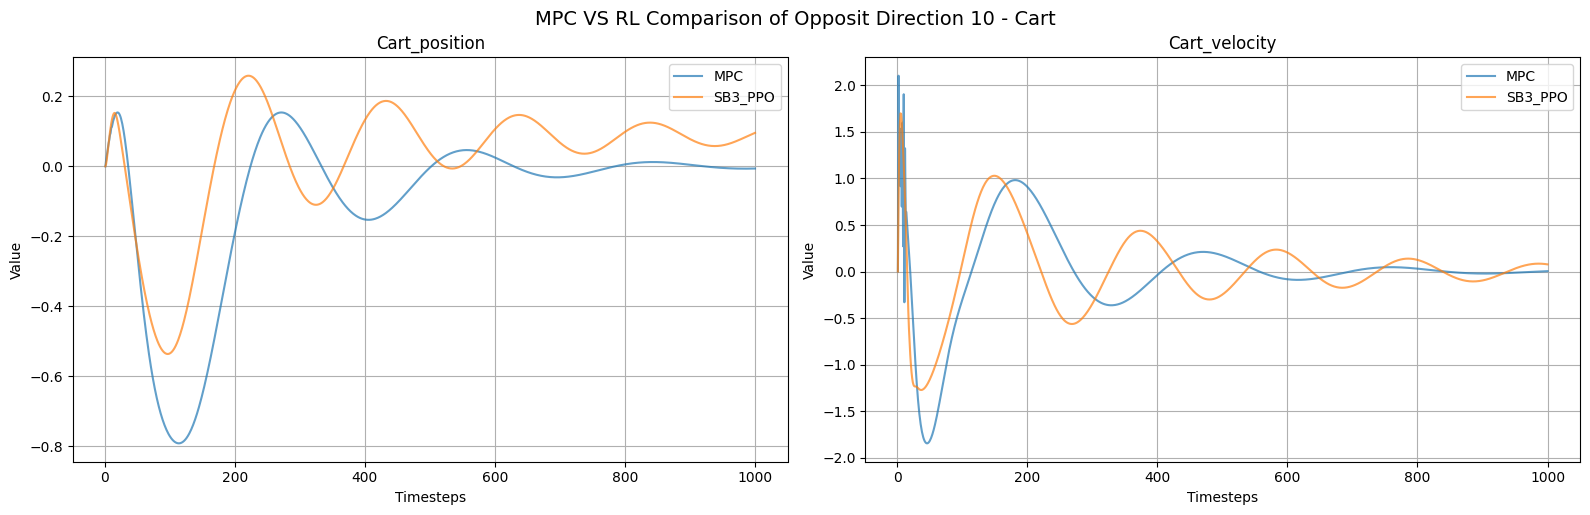

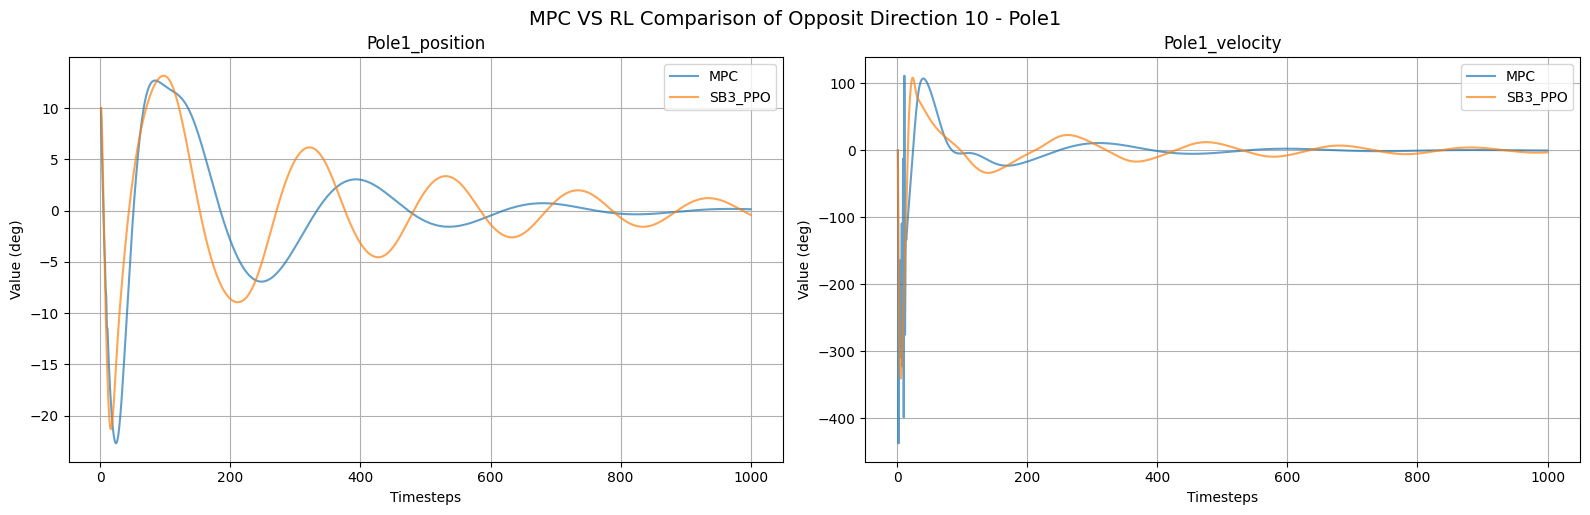

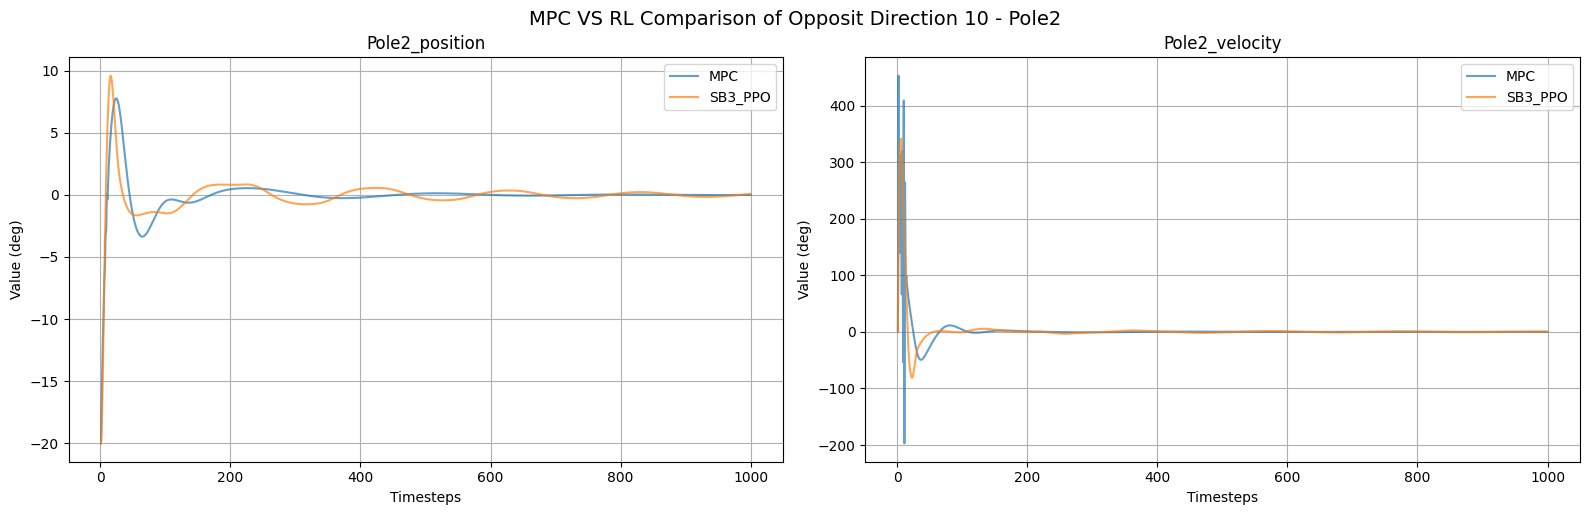

In [30]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Opposit10/MPCTest_Opposit10", "obs/SB3Test_Opposit10/SB3Test_Opposit10"]
plot_name = "MPC VS RL Comparison of Opposit Direction 10"
file_name = ["MPC", "SB3_PPO"]
plot_multiple_files_without_action(file_paths, plot_name, file_name, state_labels, timesteps)

In [20]:
import numpy as np
import json
import matplotlib.pyplot as plt

def plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps, num_steps=1000):
    """
    Plots state data (excluding actions) from multiple JSON files.
    Converts pole-related values from radians to degrees.
    If a file has fewer than `num_steps`, plots up to its available length.
    """
    fig_labels = ["Cart", "Pole1", "Pole2"]
    index_pairs = [(0, 3), (1, 4), (2, 5)]  # (position, velocity) for each group
    degree_indices = [1, 2, 4, 5]  # Indices to convert from rad to deg

    all_data = []
    lengths = []
    valid_file_names = []

    # Load and preprocess data
    for i, file_path in enumerate(file_paths):
        with open(file_path, "r") as f:
            data = json.load(f)

        obs_array = np.array(data["observations"])
        steps = min(len(obs_array), num_steps)

        if steps == 0:
            print(f"Skipping {file_path}: no data available.")
            continue

        obs_array = obs_array[:steps]

        # Convert radians to degrees
        obs_array[:, degree_indices] = np.degrees(obs_array[:, degree_indices])
        all_data.append(obs_array)
        lengths.append(steps)
        valid_file_names.append(file_name[i])
        allreward = np.array(data["sum_reward"])
        print(f"File: {file_path}, Total Reward: {allreward}")

    # Stop if no valid files
    if not all_data:
        print("No valid data to plot.")
        return

    # Plot by grouped state indices
    for fig_idx, idx_group in enumerate(index_pairs):
        fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharex=False)

        for ax, idx in zip(axes, idx_group):
            for file_index, obs_array in enumerate(all_data):
                steps = lengths[file_index]
                ax.plot(timesteps[:steps], obs_array[:, idx],
                        label=f"{valid_file_names[file_index]}", alpha=0.7)

            label_suffix = " (deg)" if idx in degree_indices else ""
            ax.set_title(state_labels[idx])
            ax.set_xlabel("Timesteps")
            ax.set_ylabel(f"Value{label_suffix}")
            ax.legend()
            ax.grid()

        fig.tight_layout()
        fig.suptitle(f"{plot_name} - {fig_labels[fig_idx]}", fontsize=14, y=1.02)
        plt.show()


File: obs/MPCTest_Opposit15/MPCTest_Opposit15, Total Reward: 9.271486282348633
File: obs/SB3Test_Opposit15/SB3Test_Opposit15, Total Reward: -1.993086576461792


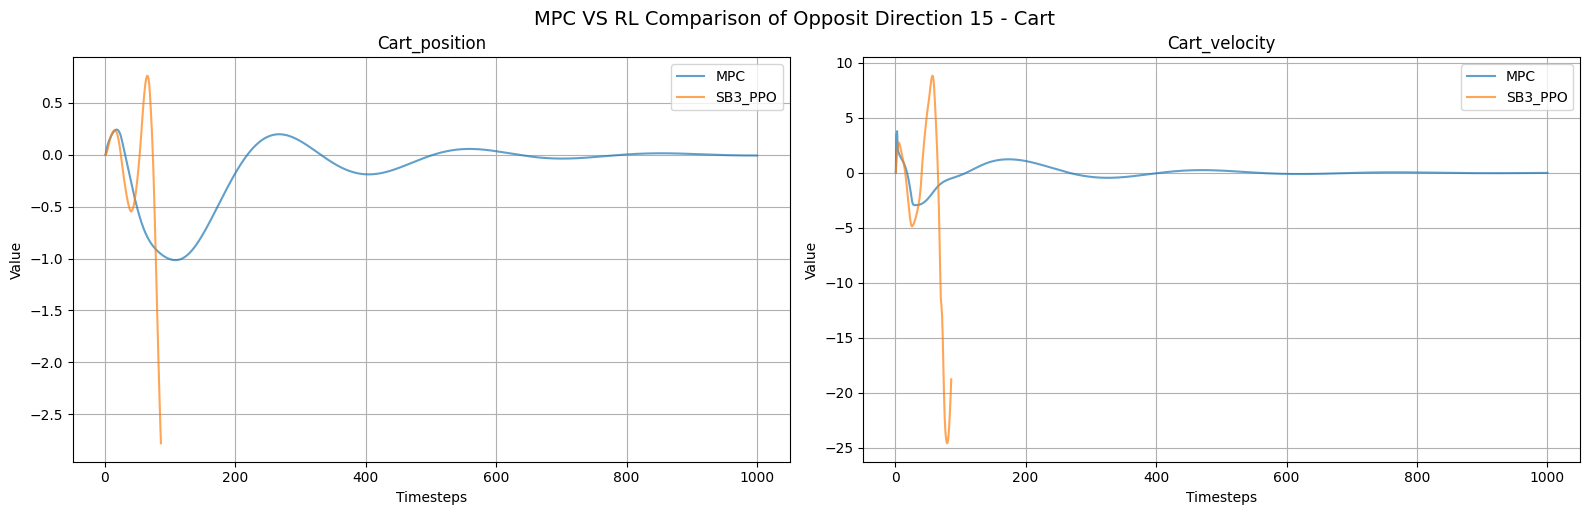

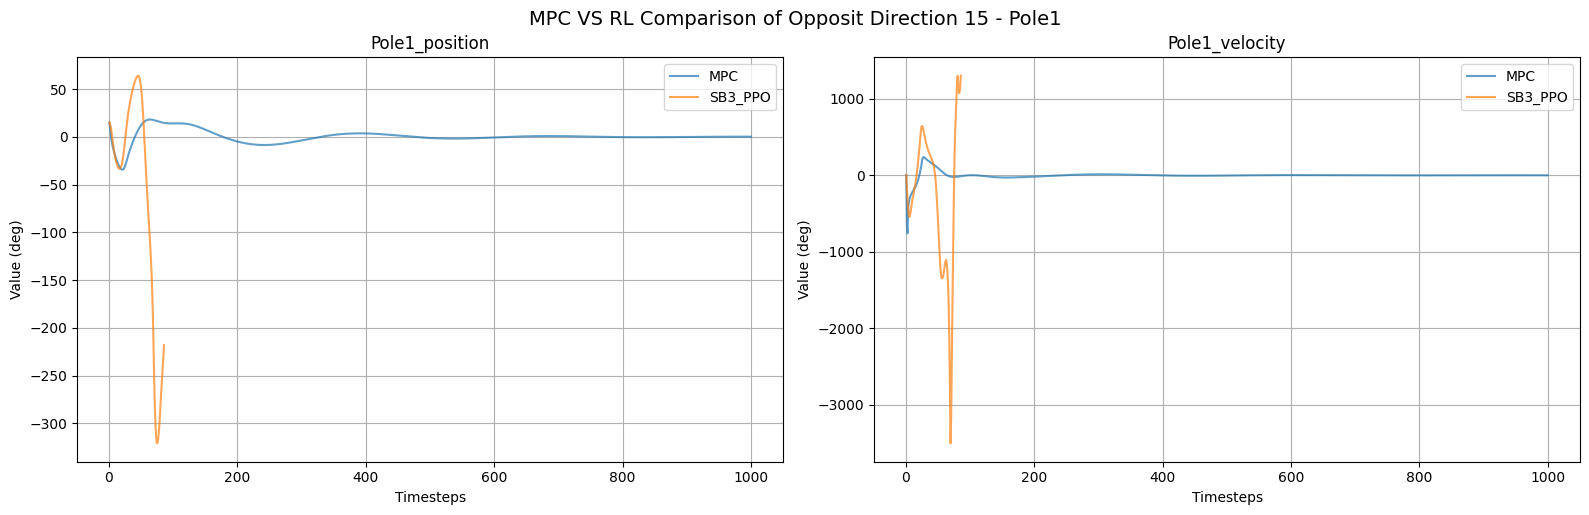

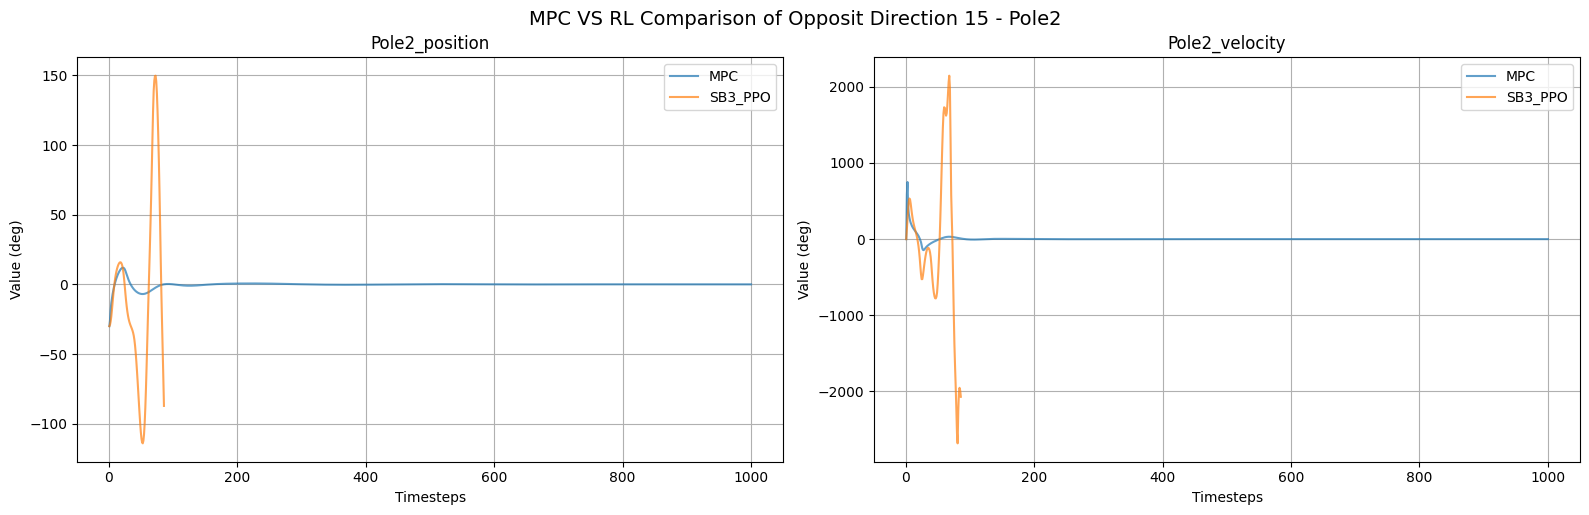

In [46]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Opposit15/MPCTest_Opposit15", "obs/SB3Test_Opposit15/SB3Test_Opposit15"]
plot_name = "MPC VS RL Comparison of Opposit Direction 15"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same10/MPCTest_Same10, Total Reward: 9.802943229675293
File: obs/SB3Test_Same10/SB3Test_Same10, Total Reward: 9.774356842041016


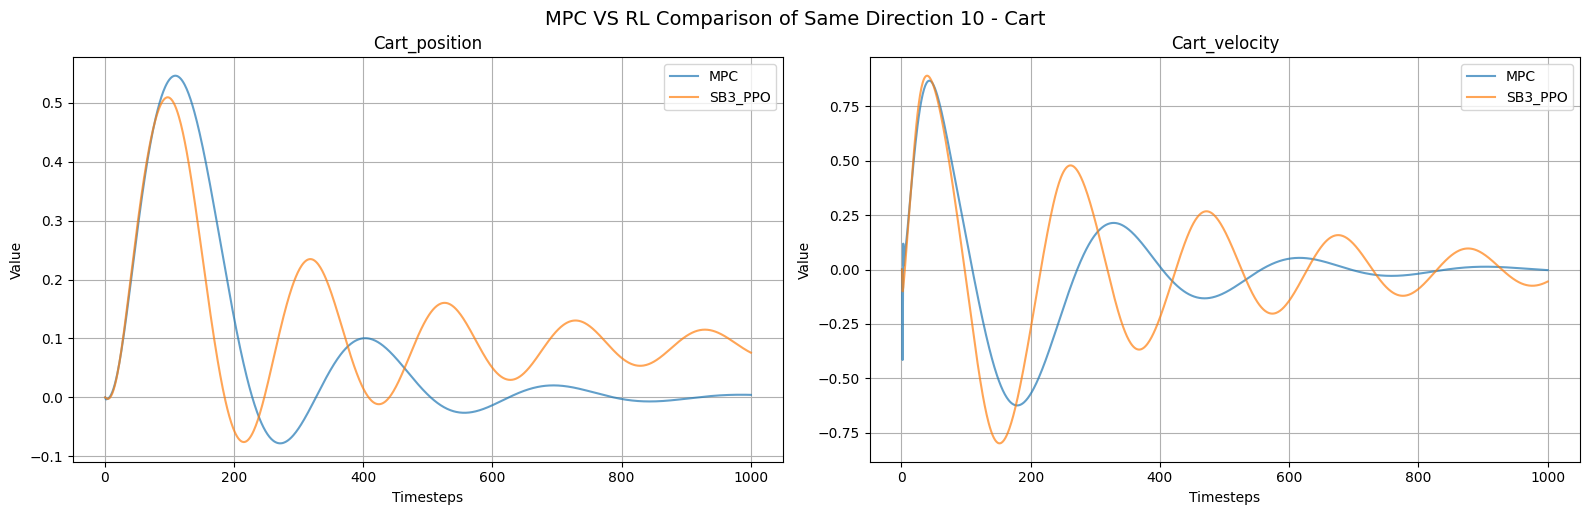

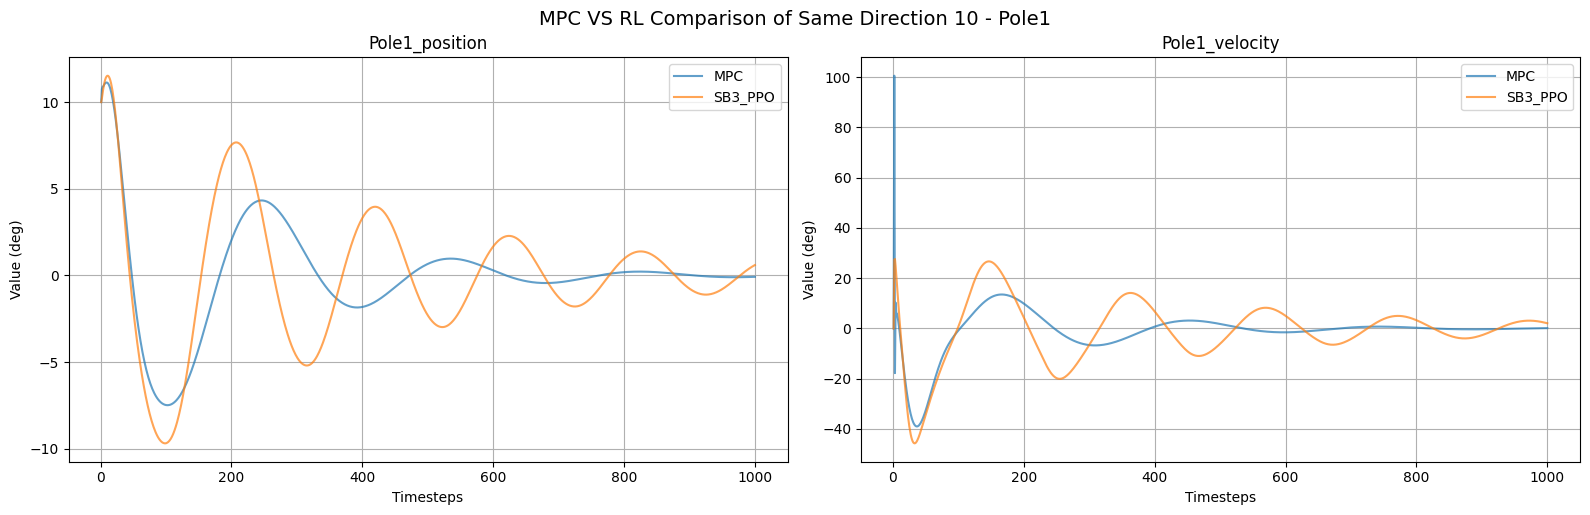

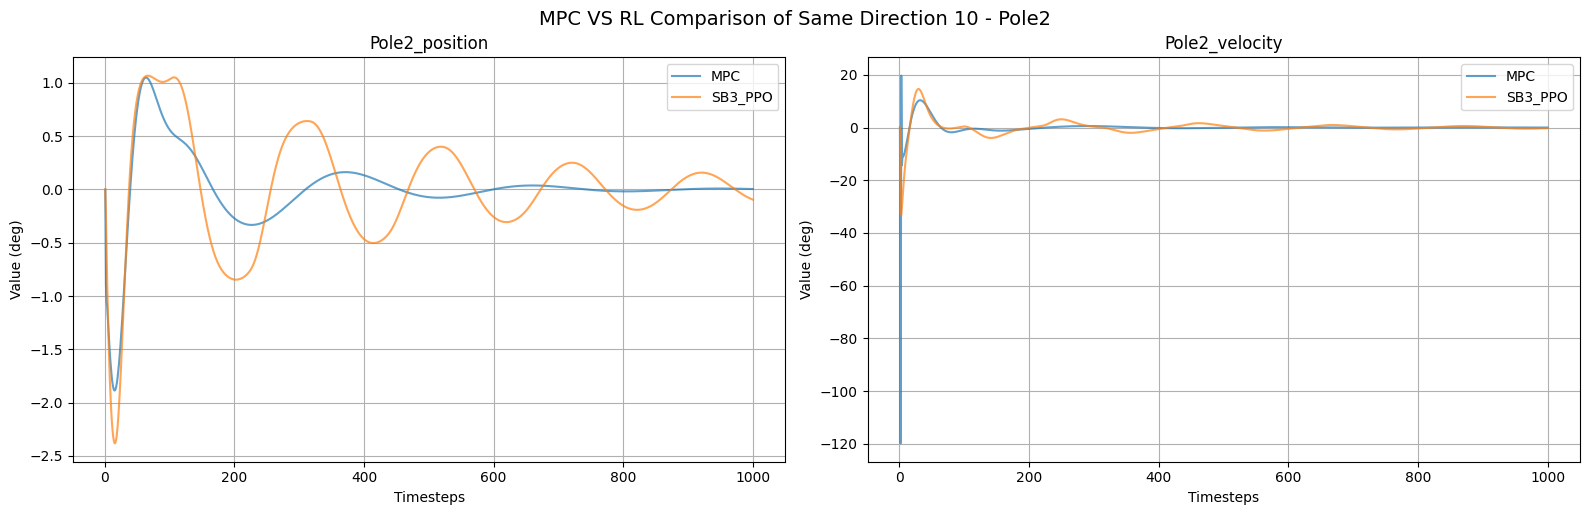

In [47]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same10/MPCTest_Same10", "obs/SB3Test_Same10/SB3Test_Same10"]
plot_name = "MPC VS RL Comparison of Same Direction 10"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same15/MPCTest_Same15, Total Reward: 9.583226203918457
File: obs/SB3Test_Same15/SB3Test_Same15, Total Reward: 9.572599411010742


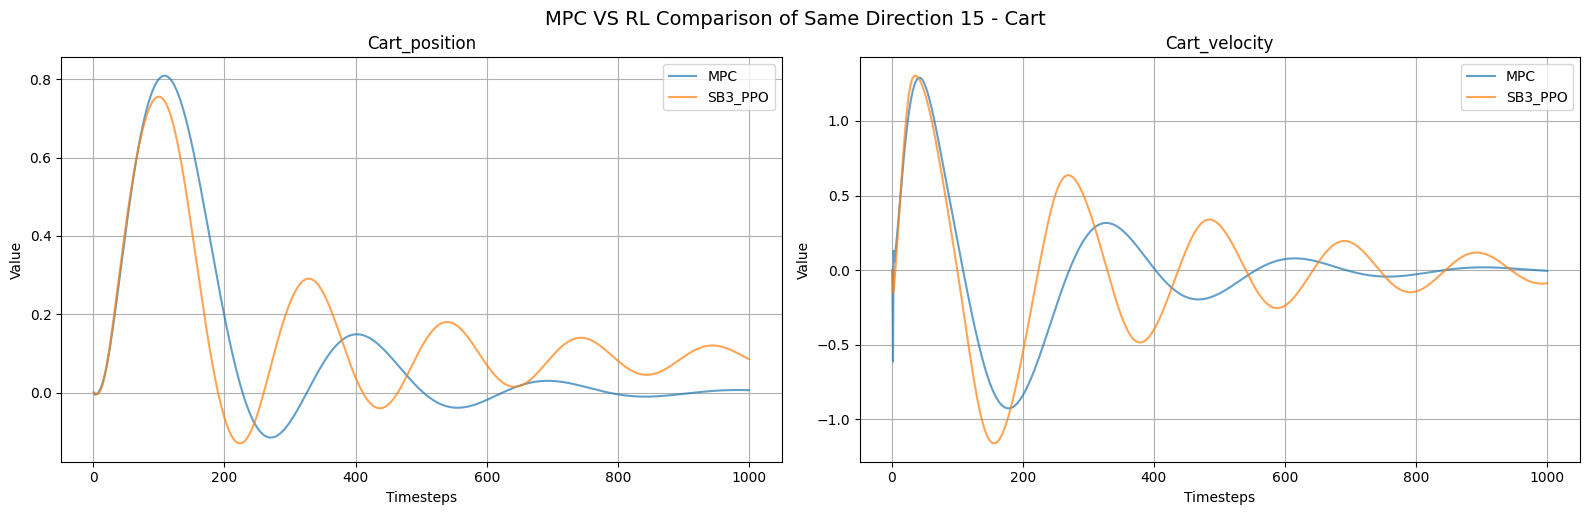

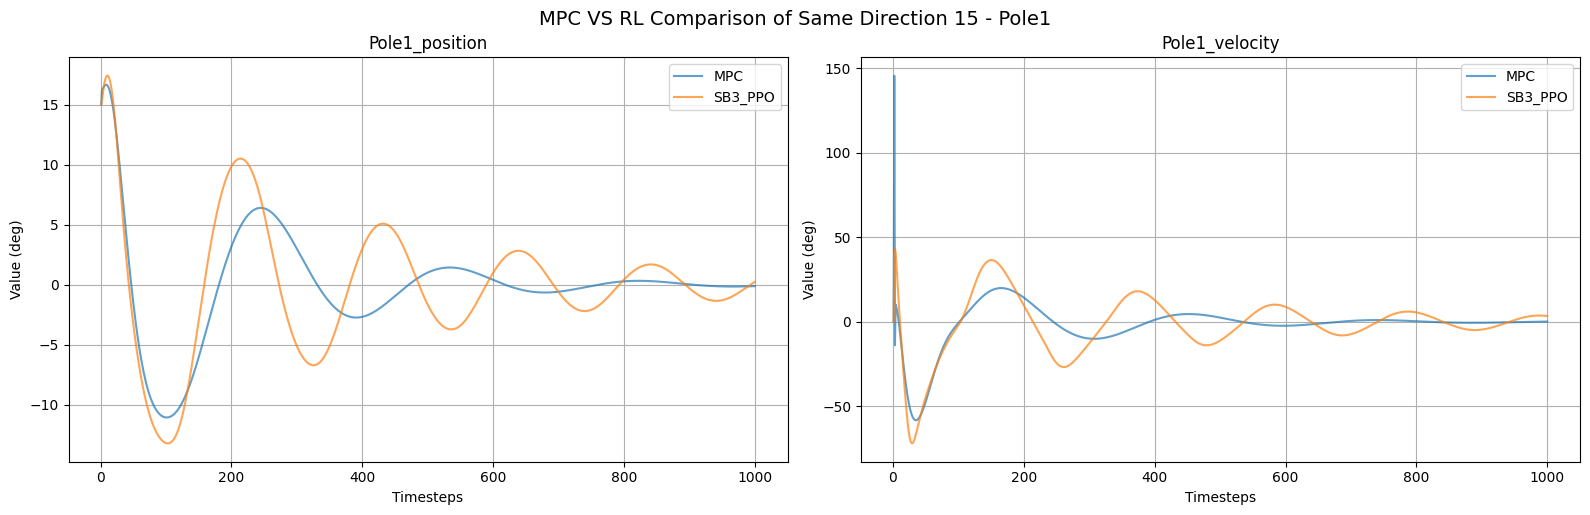

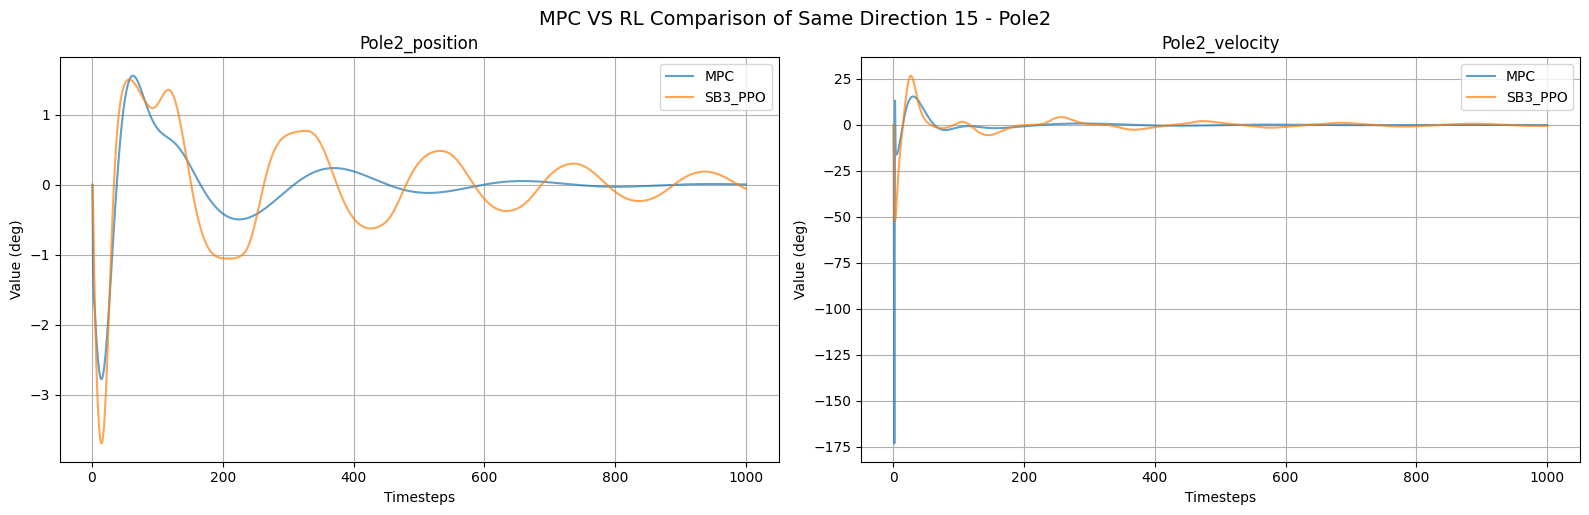

In [48]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same15/MPCTest_Same15", "obs/SB3Test_Same15/SB3Test_Same15"]
plot_name = "MPC VS RL Comparison of Same Direction 15"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same20/MPCTest_Same20, Total Reward: 9.29765510559082
File: obs/SB3Test_Same20/SB3Test_Same20, Total Reward: 9.307327270507812


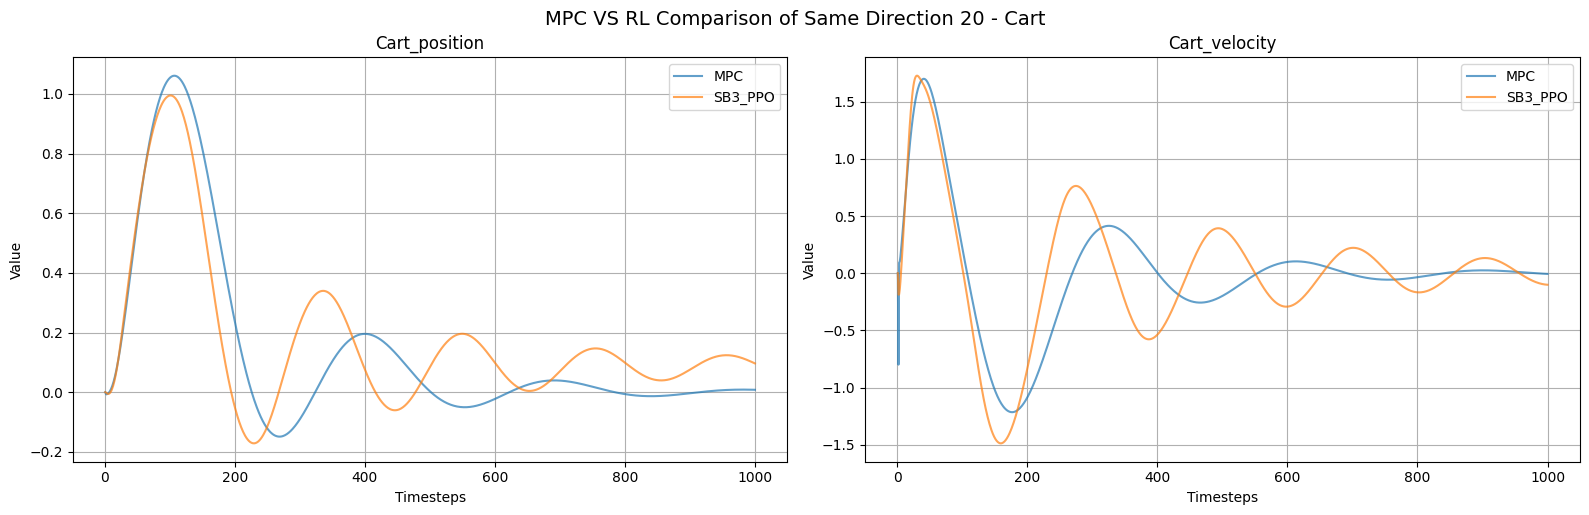

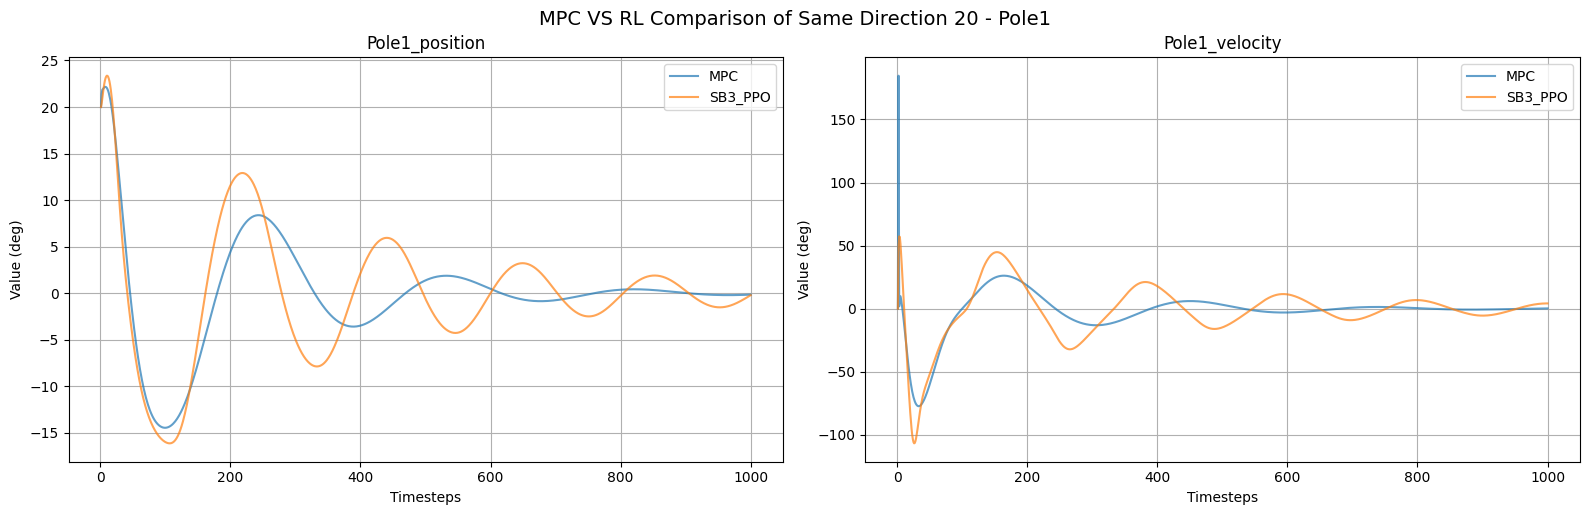

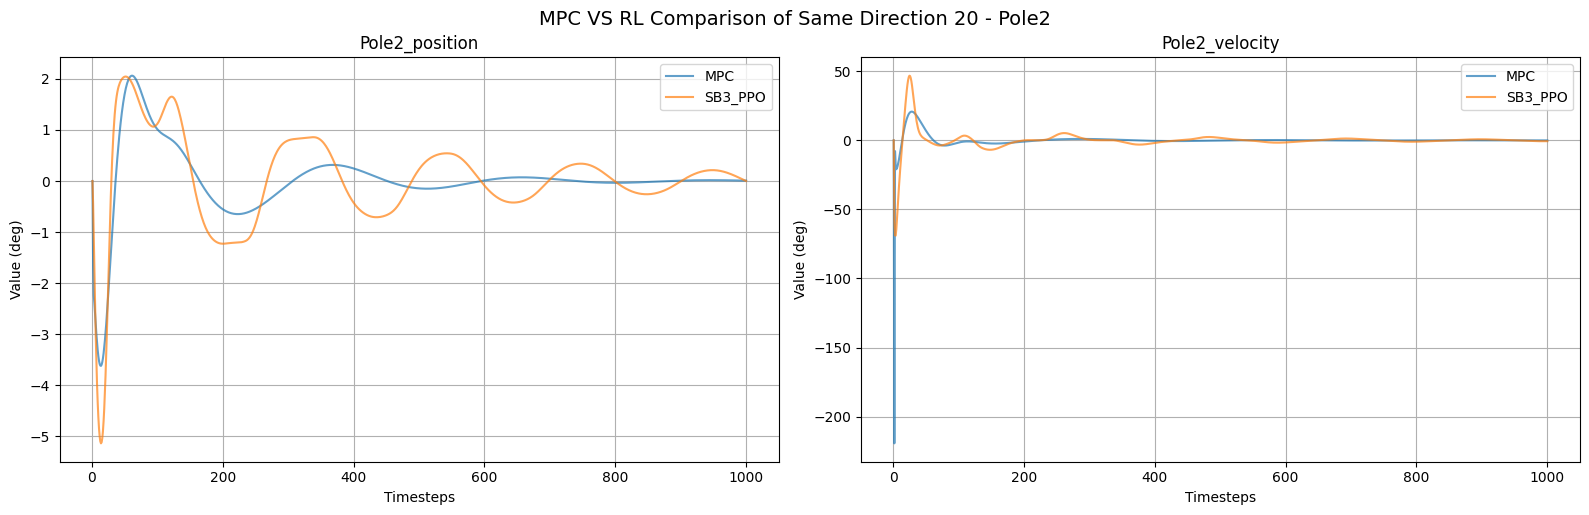

In [49]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same20/MPCTest_Same20", "obs/SB3Test_Same20/SB3Test_Same20"]
plot_name = "MPC VS RL Comparison of Same Direction 20"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same25/MPCTest_Same25, Total Reward: 8.961240768432617
File: obs/SB3Test_Same25/SB3Test_Same25, Total Reward: 9.01302719116211


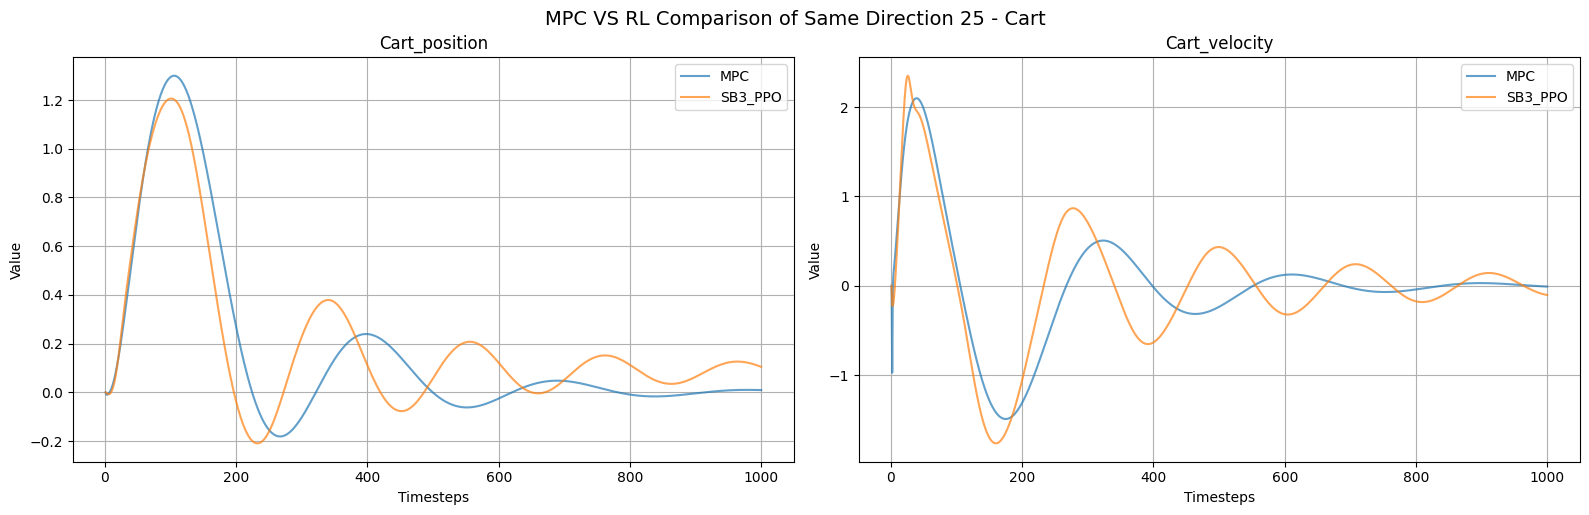

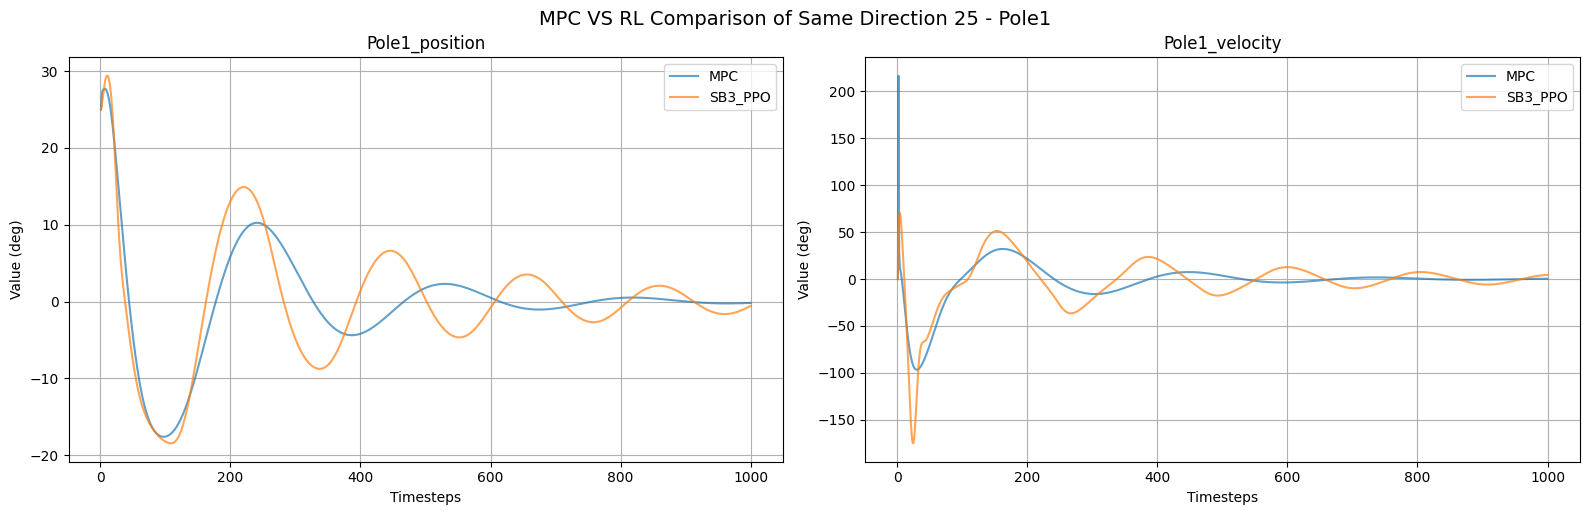

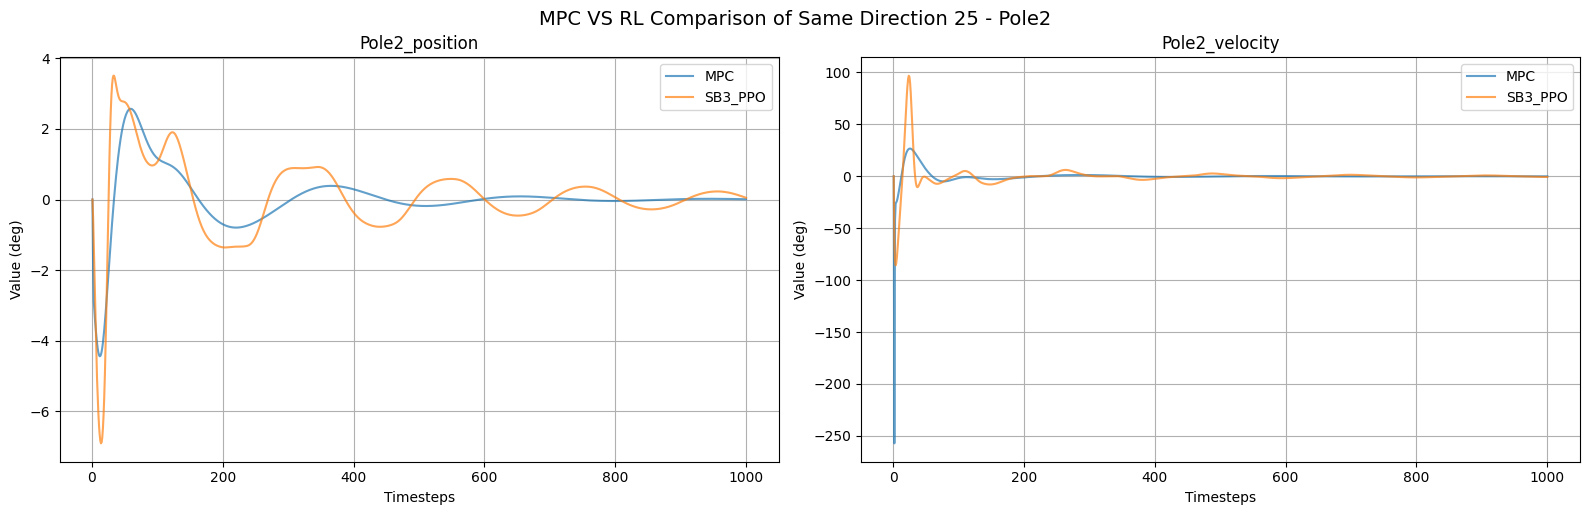

In [50]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same25/MPCTest_Same25", "obs/SB3Test_Same25/SB3Test_Same25"]
plot_name = "MPC VS RL Comparison of Same Direction 25"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same30/MPCTest_Same30, Total Reward: 8.596044540405273
File: obs/SB3Test_Same30/SB3Test_Same30, Total Reward: 8.911710739135742


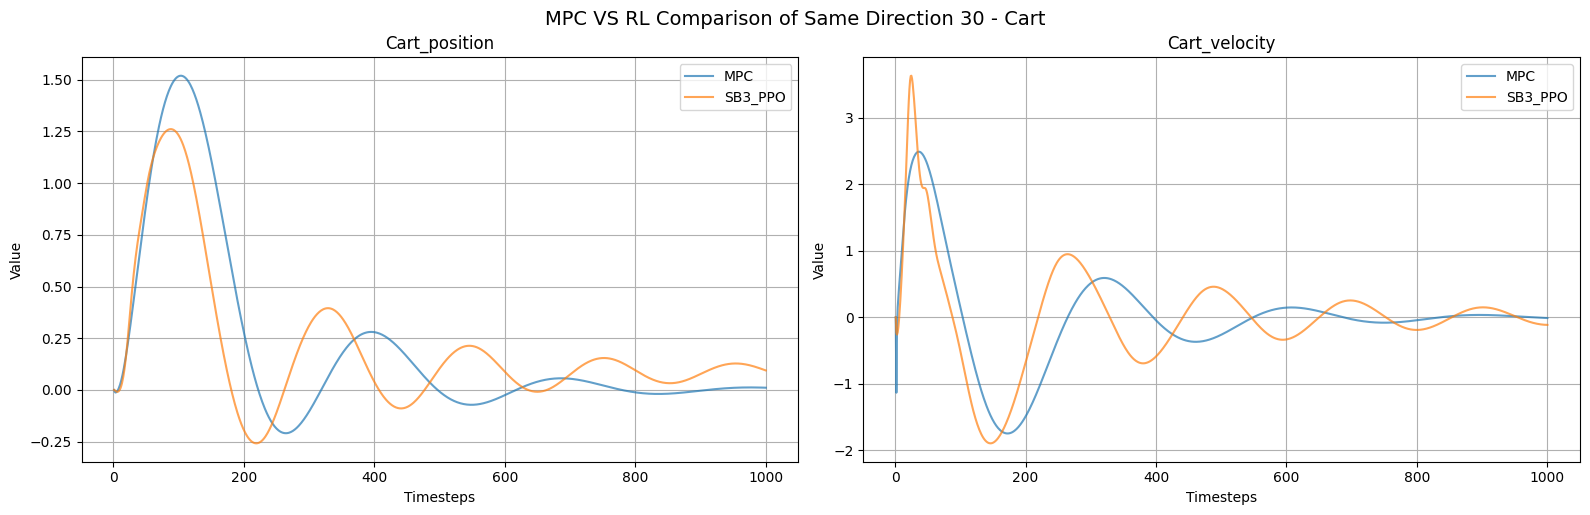

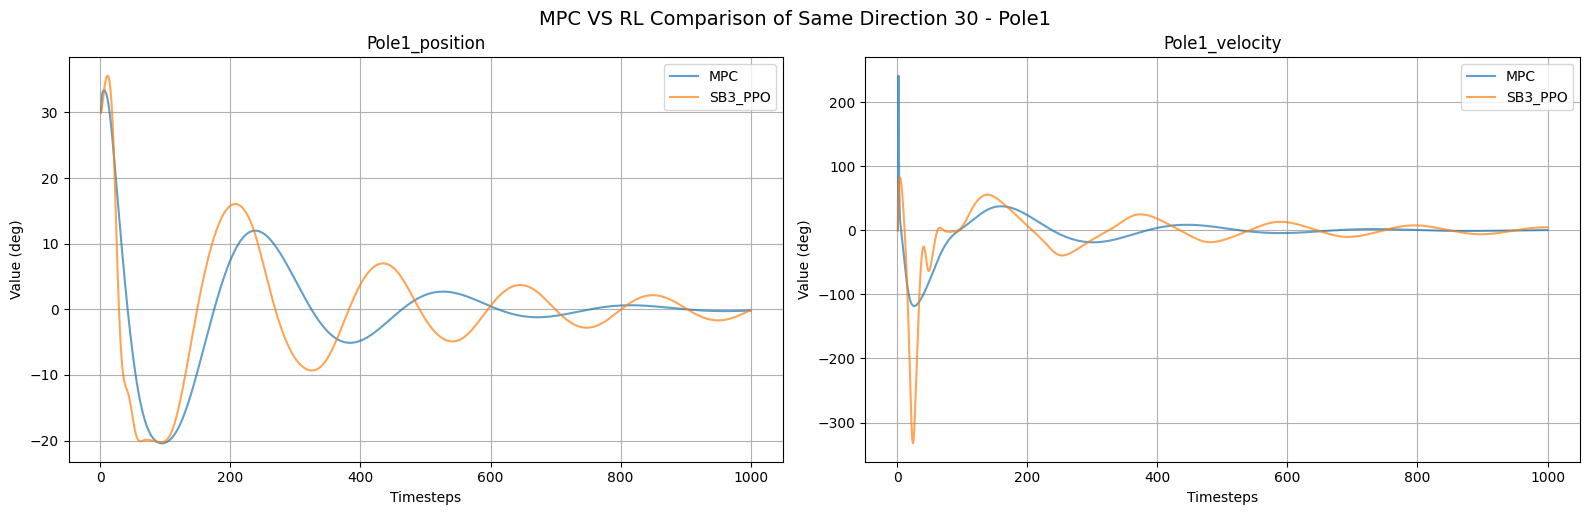

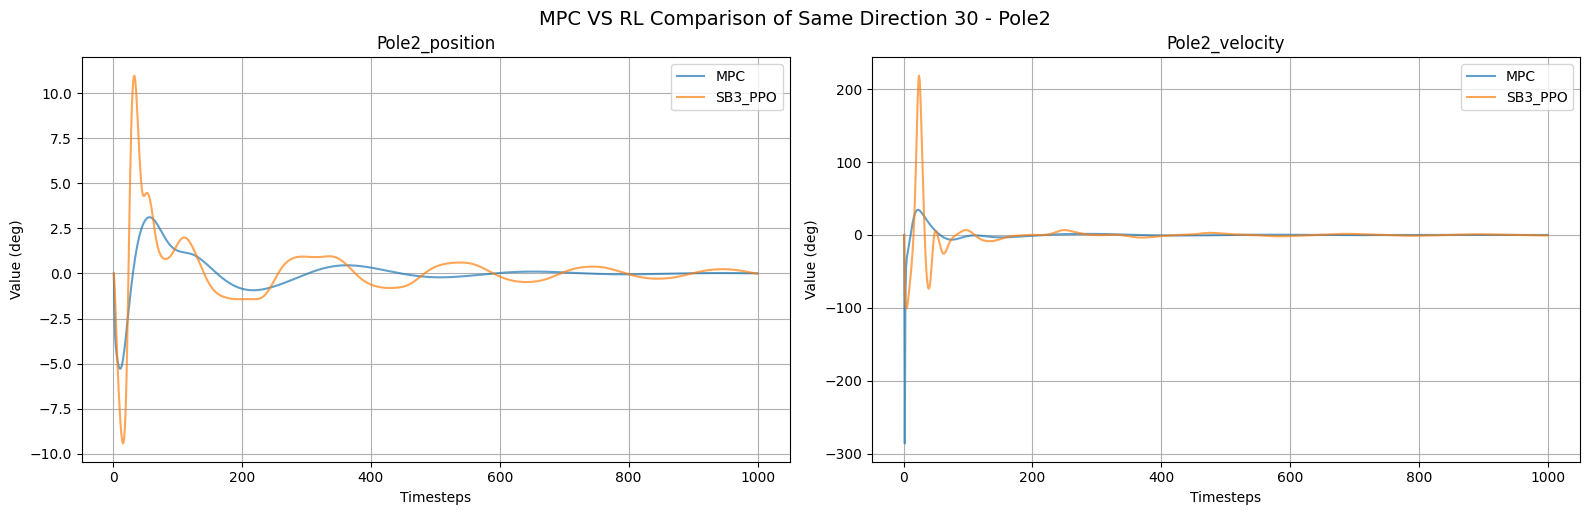

In [51]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same30/MPCTest_Same30", "obs/SB3Test_Same30/SB3Test_Same30"]
plot_name = "MPC VS RL Comparison of Same Direction 30"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same35/MPCTest_Same35, Total Reward: 8.252829551696777
File: obs/SB3Test_Same35/SB3Test_Same35, Total Reward: -1.6053590774536133


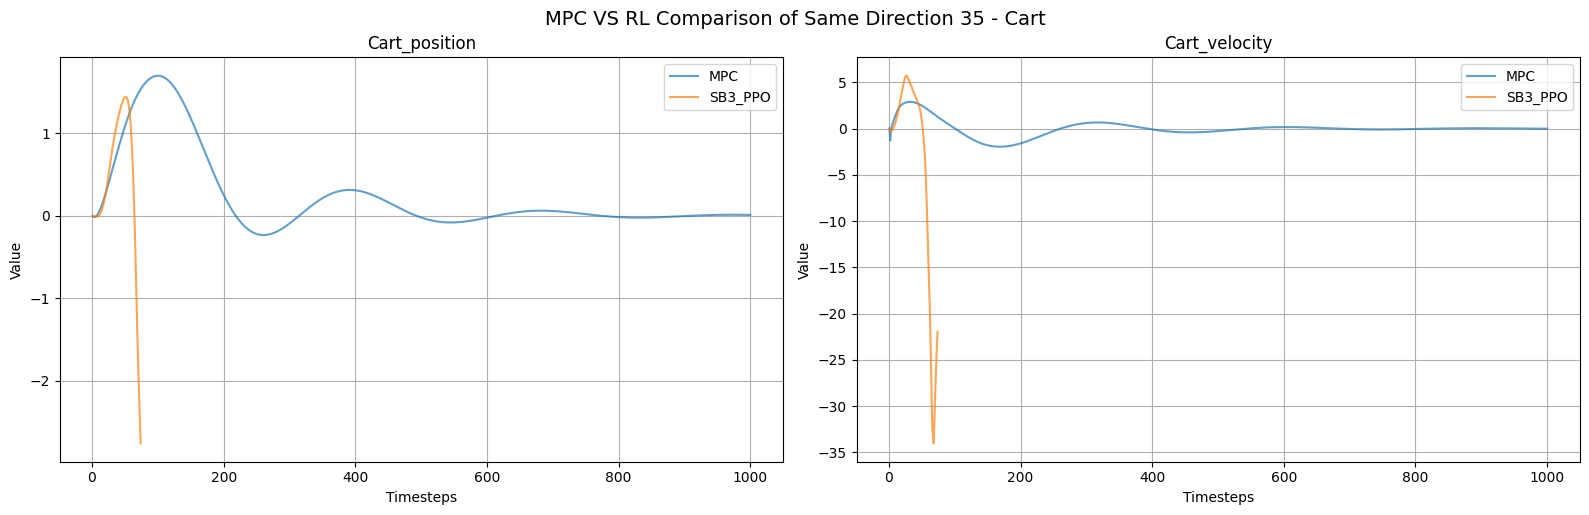

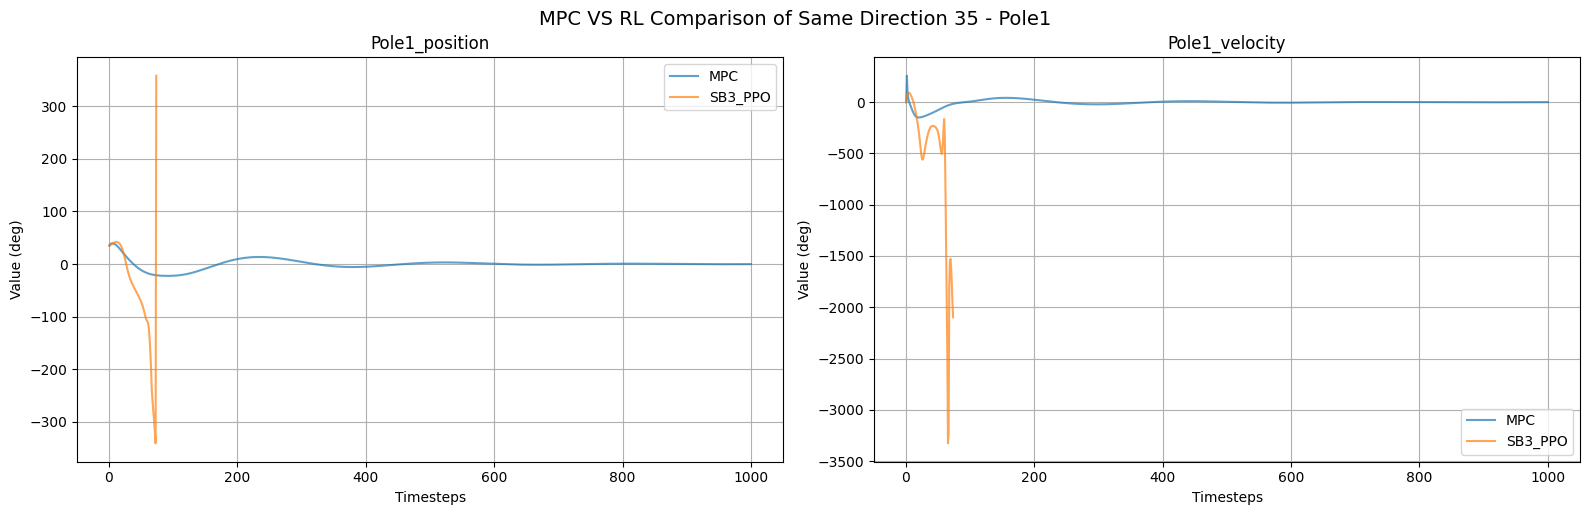

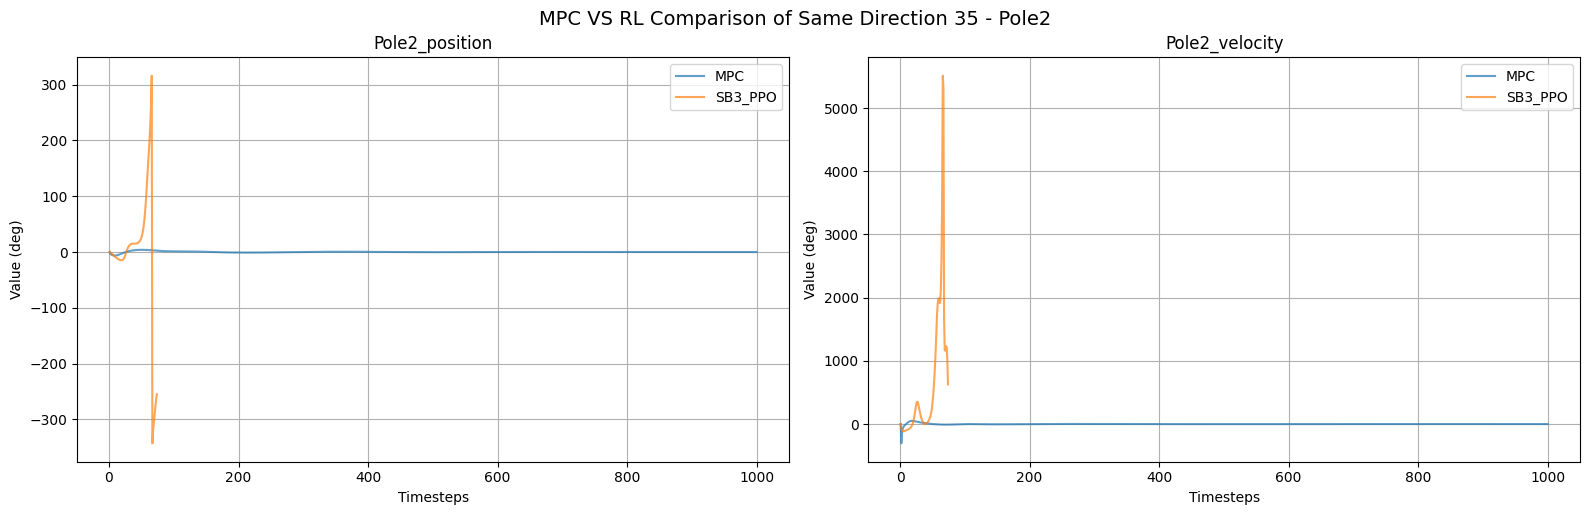

In [52]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same35/MPCTest_Same35", "obs/SB3Test_Same35/SB3Test_Same35"]
plot_name = "MPC VS RL Comparison of Same Direction 35"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same40/MPCTest_Same40, Total Reward: 8.132426261901855
File: obs/SB3Test_Same40/SB3Test_Same40, Total Reward: -2.5269546508789062


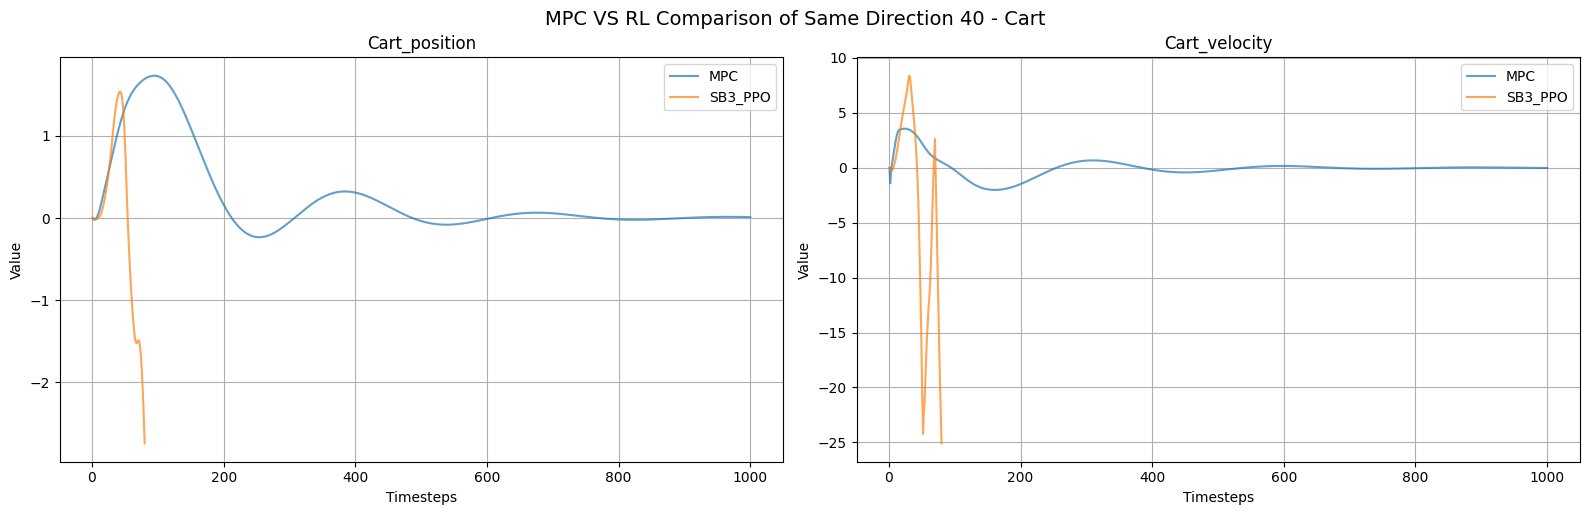

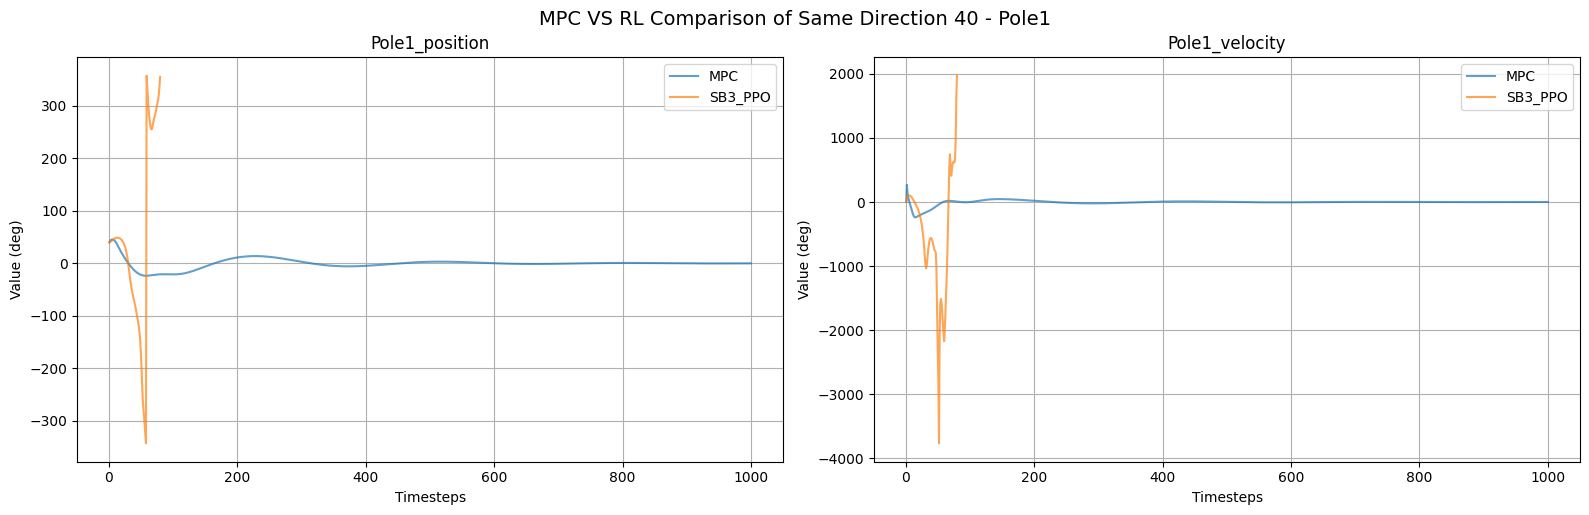

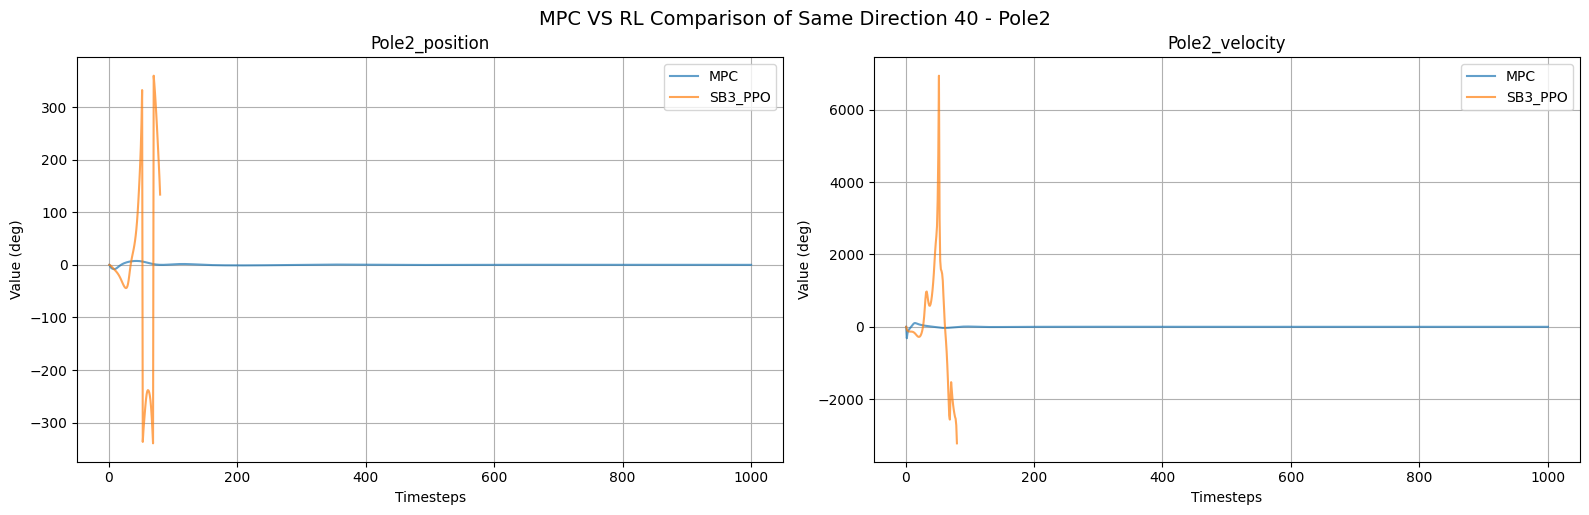

In [59]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same40/MPCTest_Same40", "obs/SB3Test_Same40/SB3Test_Same40"]
plot_name = "MPC VS RL Comparison of Same Direction 40"
file_name = ["MPC", "SB3_PPO"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Same42/MPCTest_Same42, Total Reward: 7.006825923919678


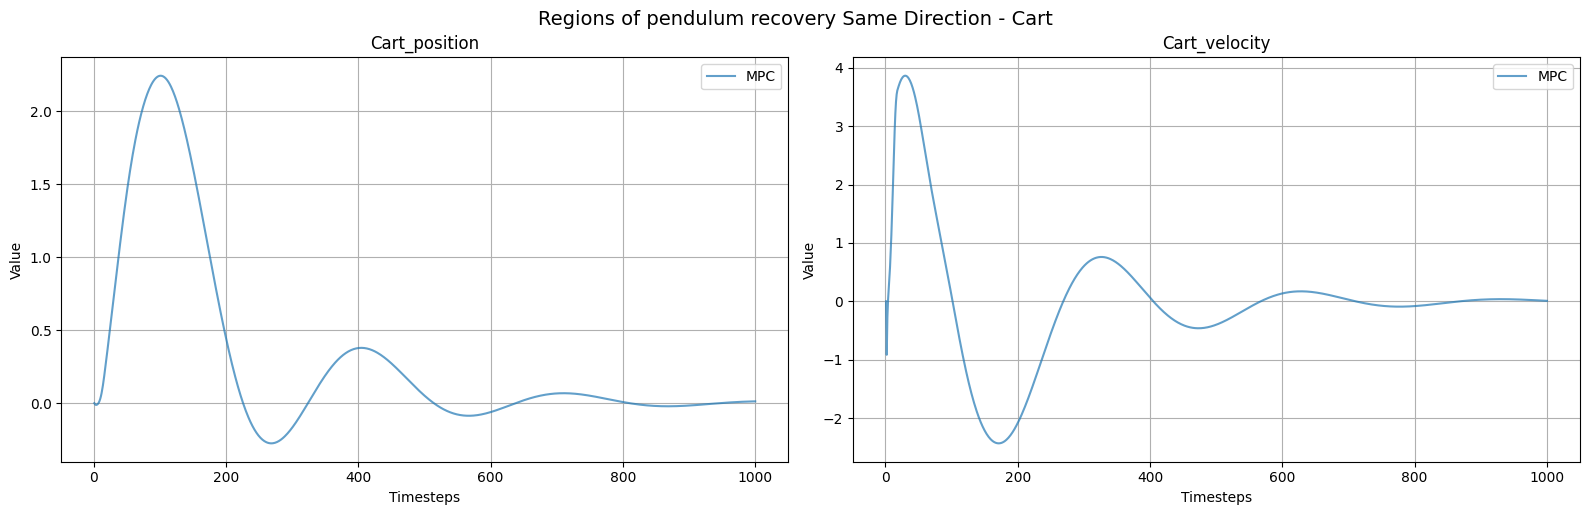

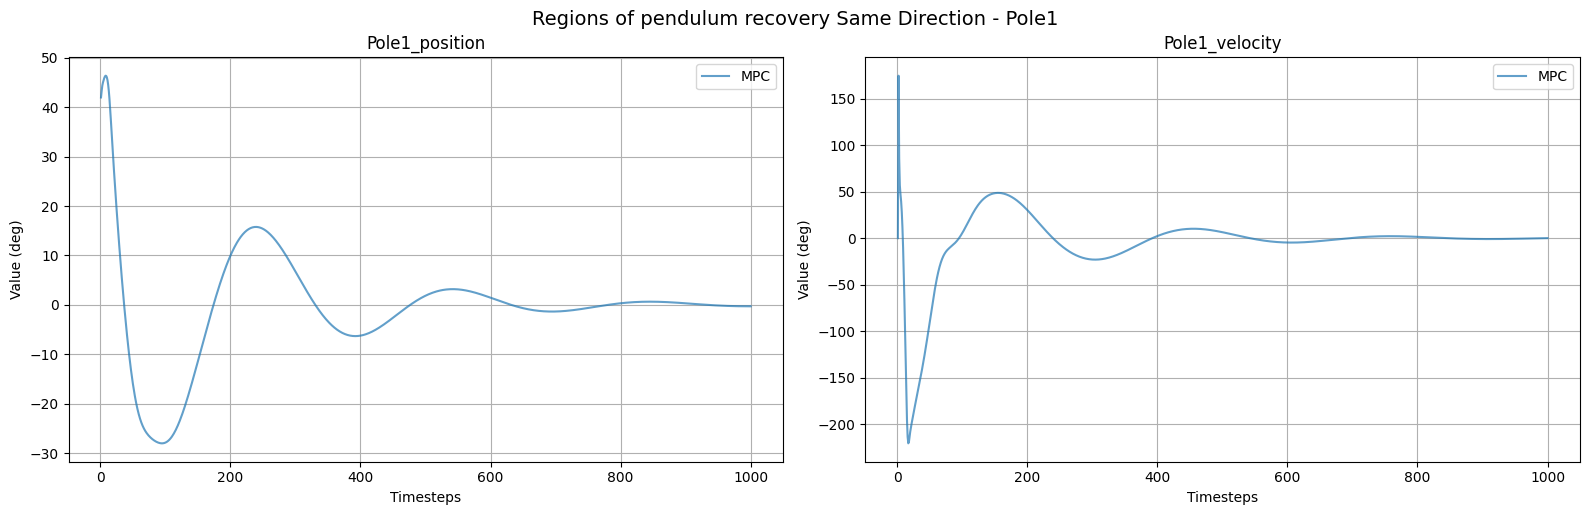

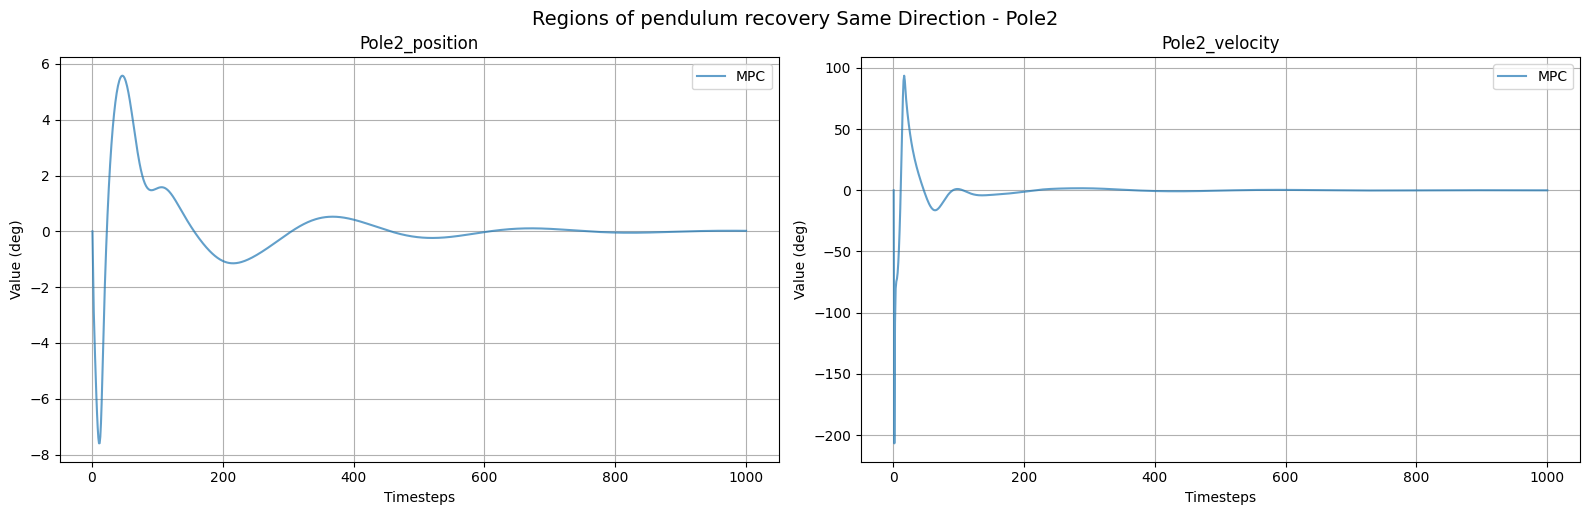

In [54]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Same42/MPCTest_Same42"]
plot_name = "Regions of pendulum recovery Same Direction"
file_name = ["MPC"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3Test_Same32/SB3Test_Same32, Total Reward: 8.971752166748047


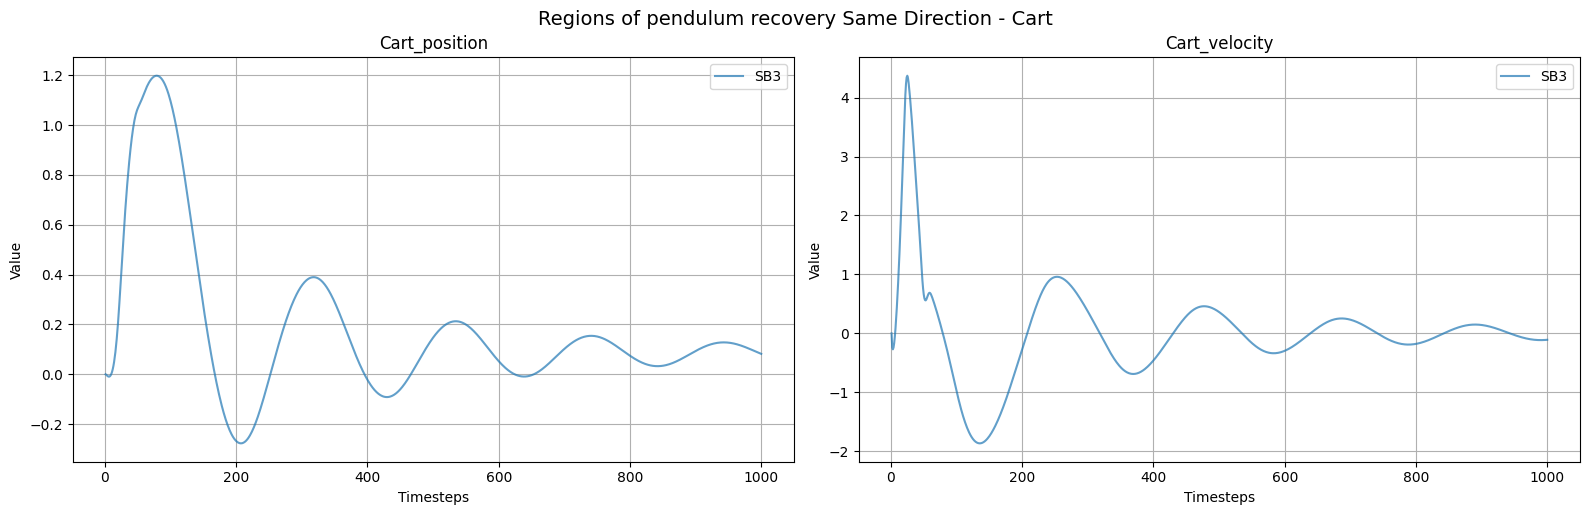

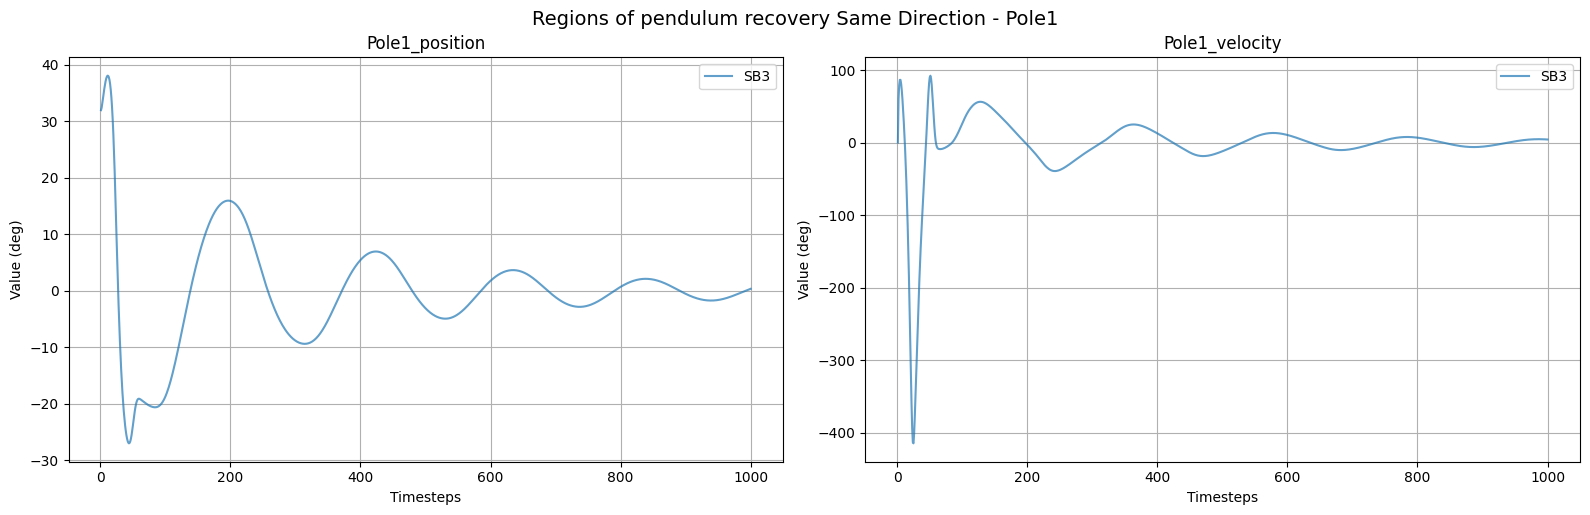

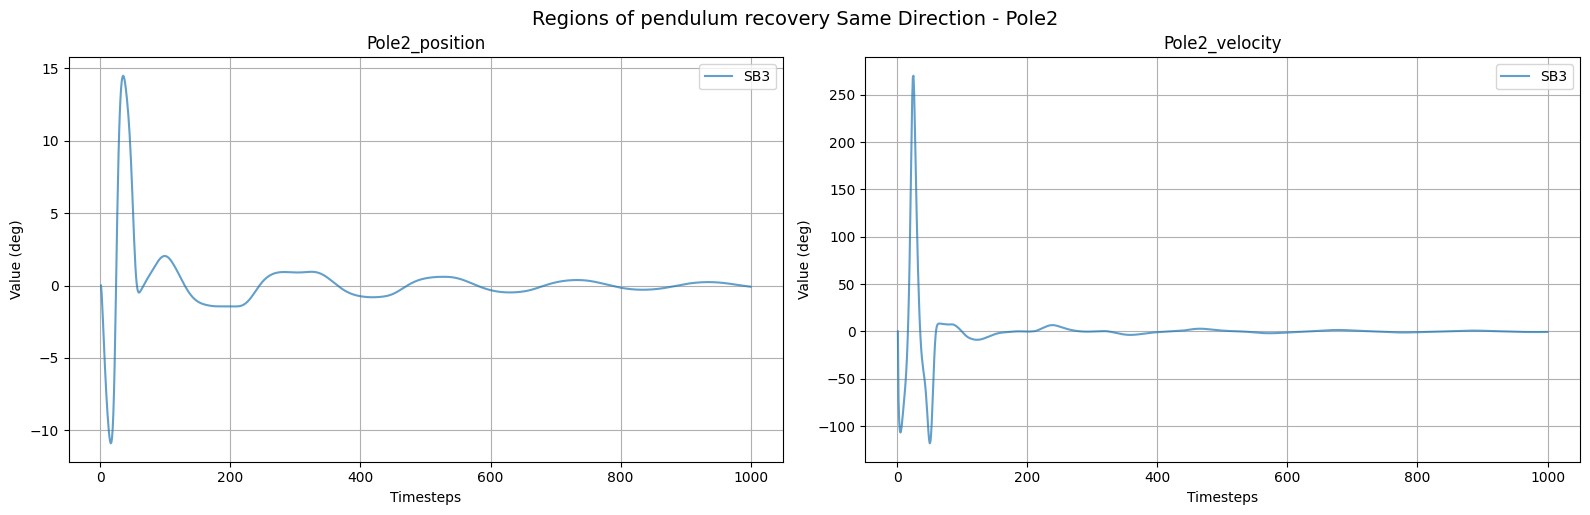

In [55]:
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/SB3Test_Same32/SB3Test_Same32"]
plot_name = "Regions of pendulum recovery Same Direction"
file_name = ["SB3"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/MPCTest_Opposit19/MPCTest_Opposit19, Total Reward: 9.079697608947754


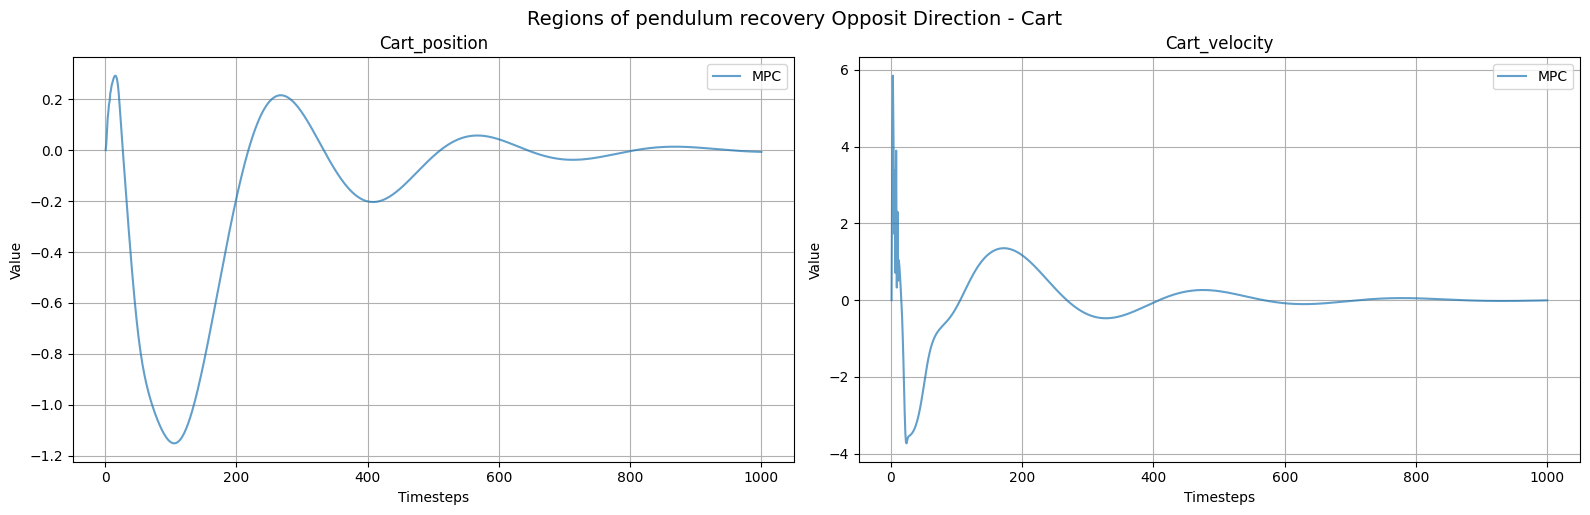

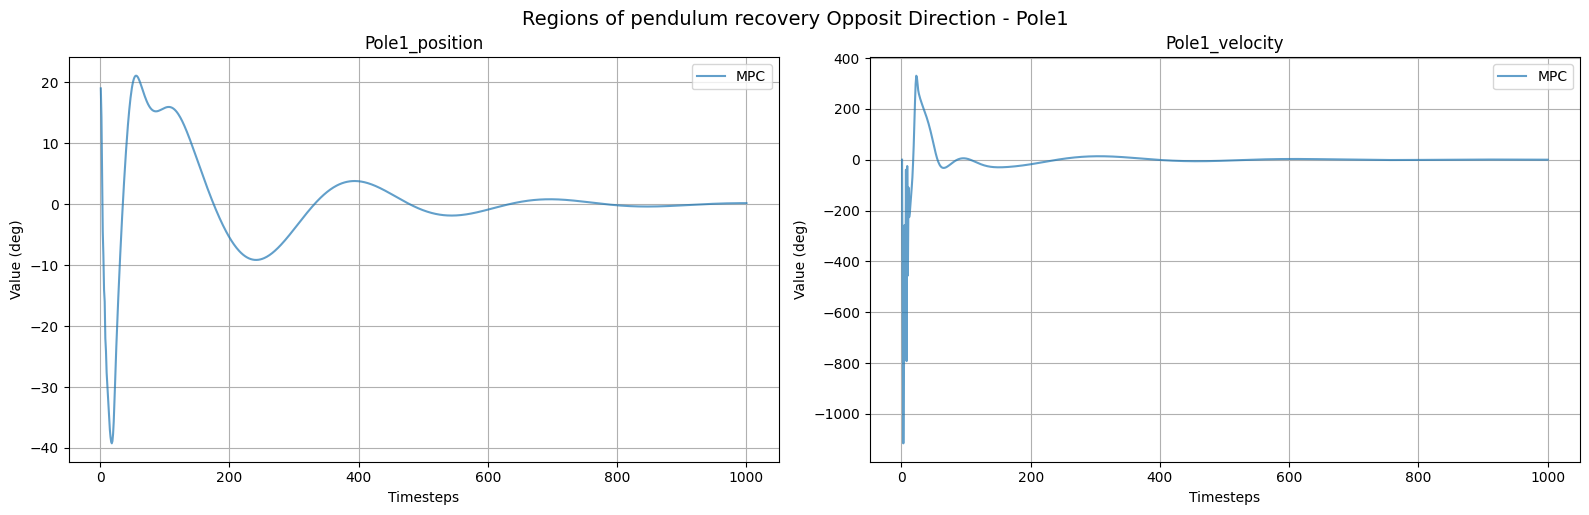

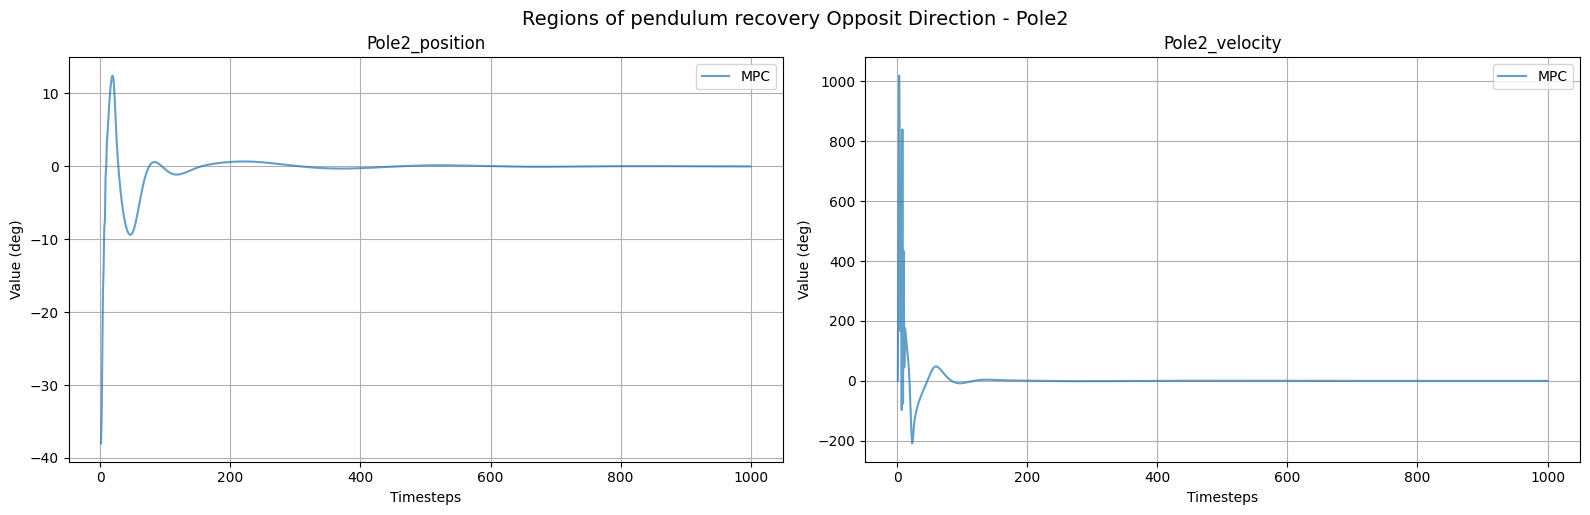

In [56]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/MPCTest_Opposit19/MPCTest_Opposit19"]
plot_name = "Regions of pendulum recovery Opposit Direction"
file_name = ["MPC"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3Test_Opposit14/SB3Test_Opposit14, Total Reward: 9.59766960144043


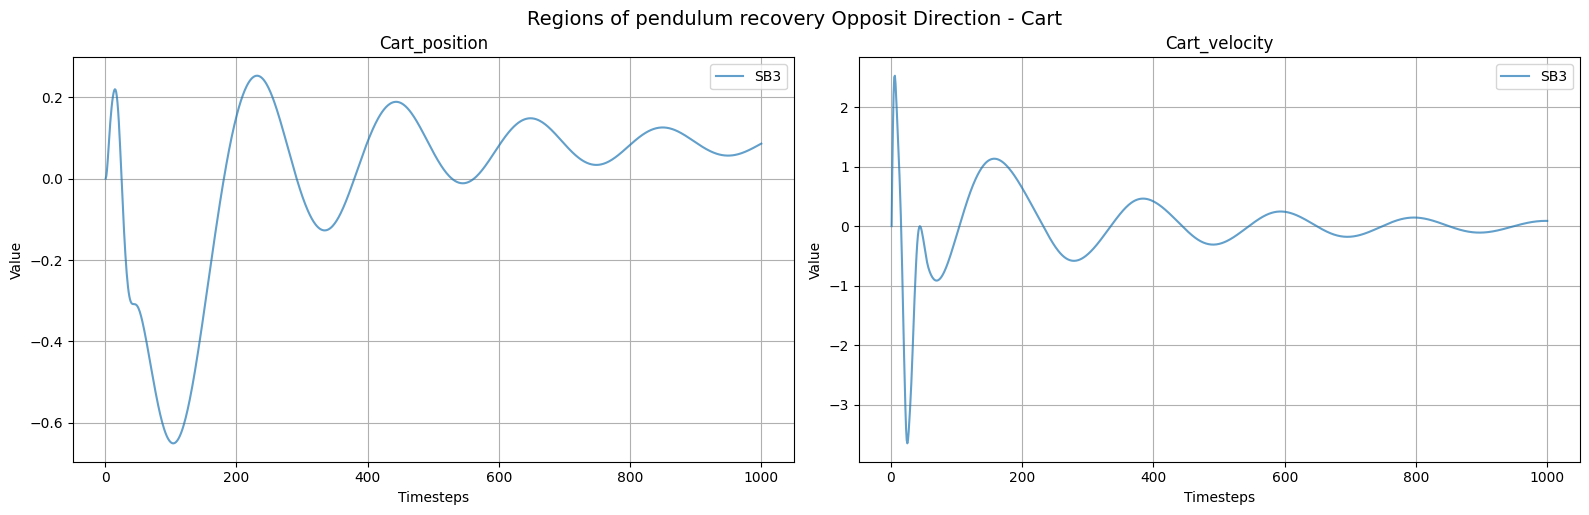

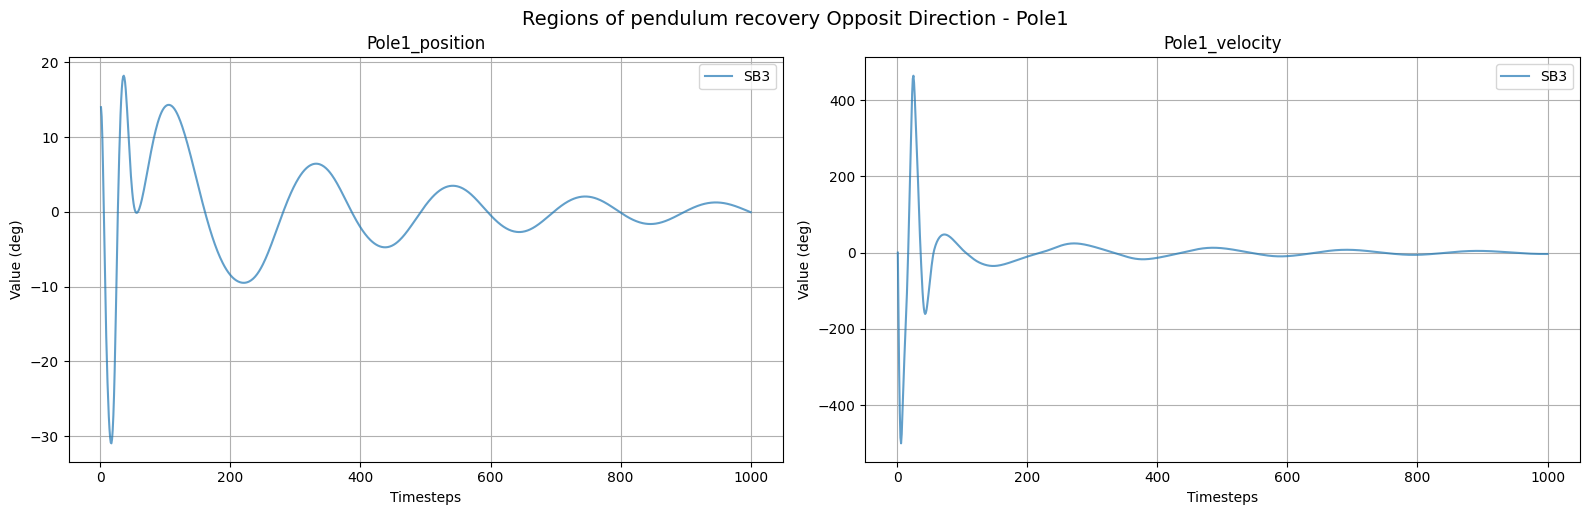

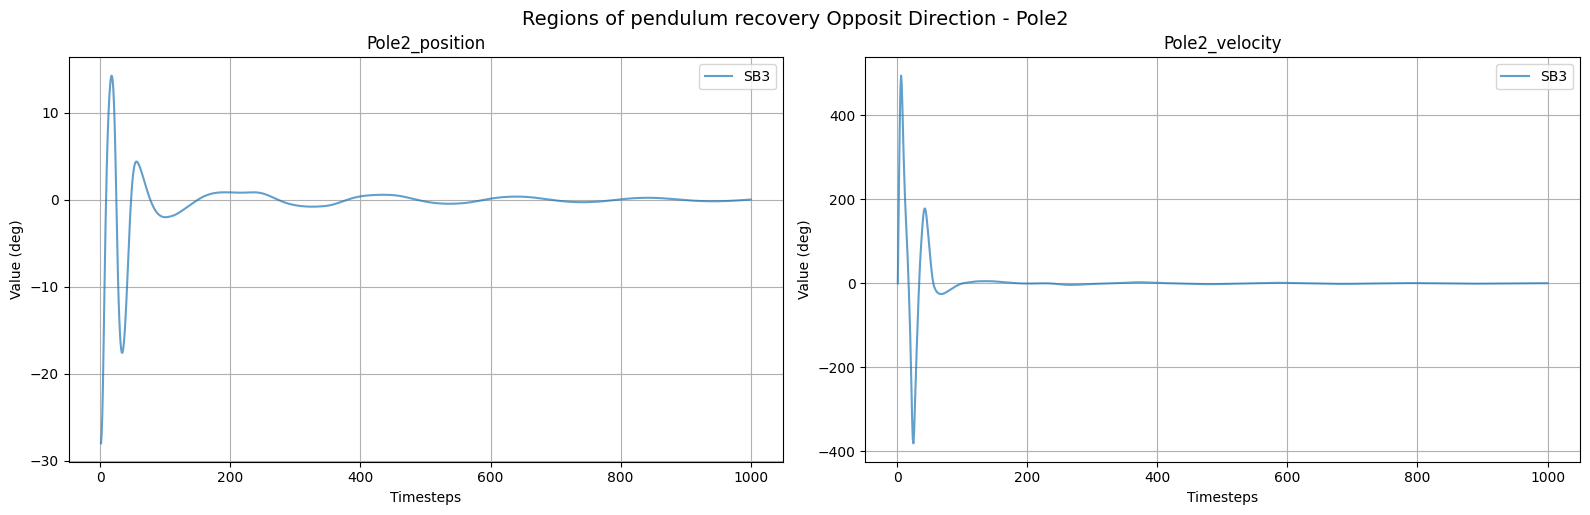

In [57]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/SB3Test_Opposit14/SB3Test_Opposit14"]
plot_name = "Regions of pendulum recovery Opposit Direction"
file_name = ["SB3"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

File: obs/SB3Test1/SB3Test1, Total Reward: 9.774356842041016


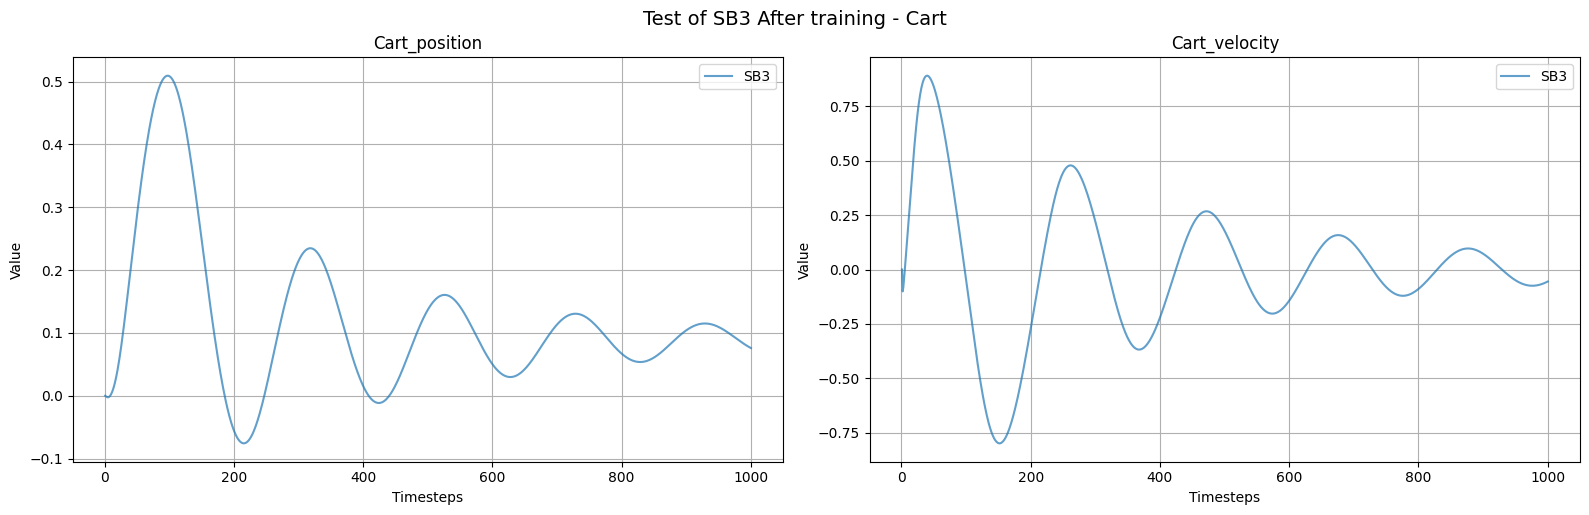

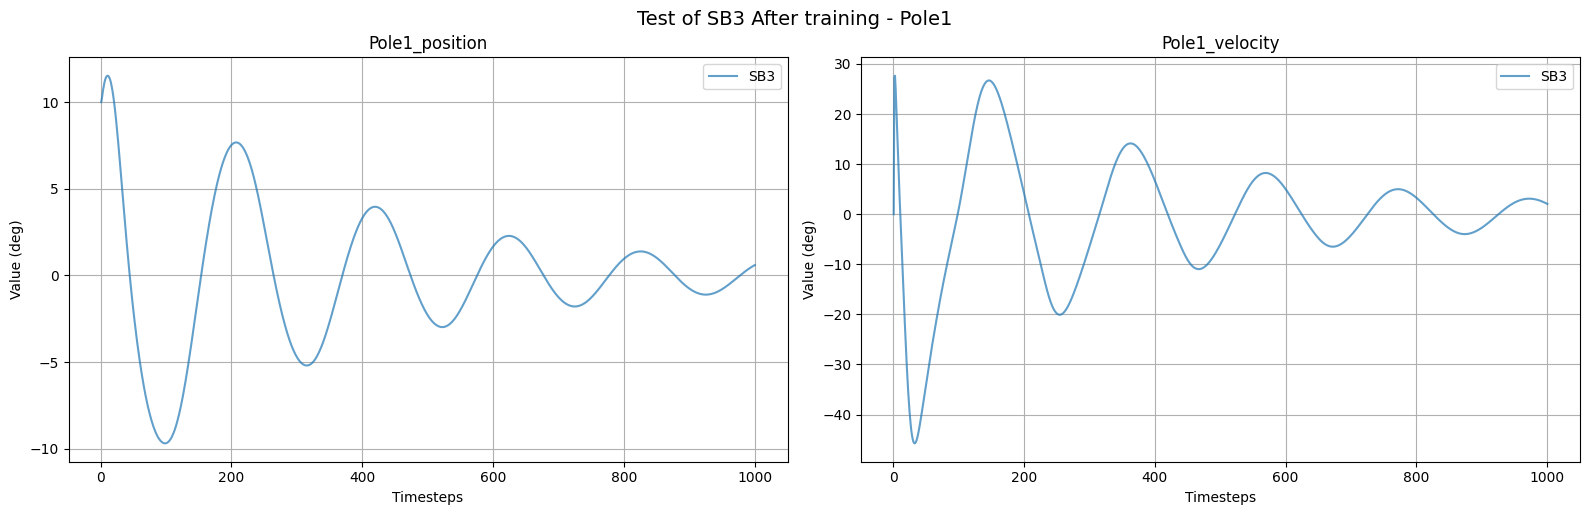

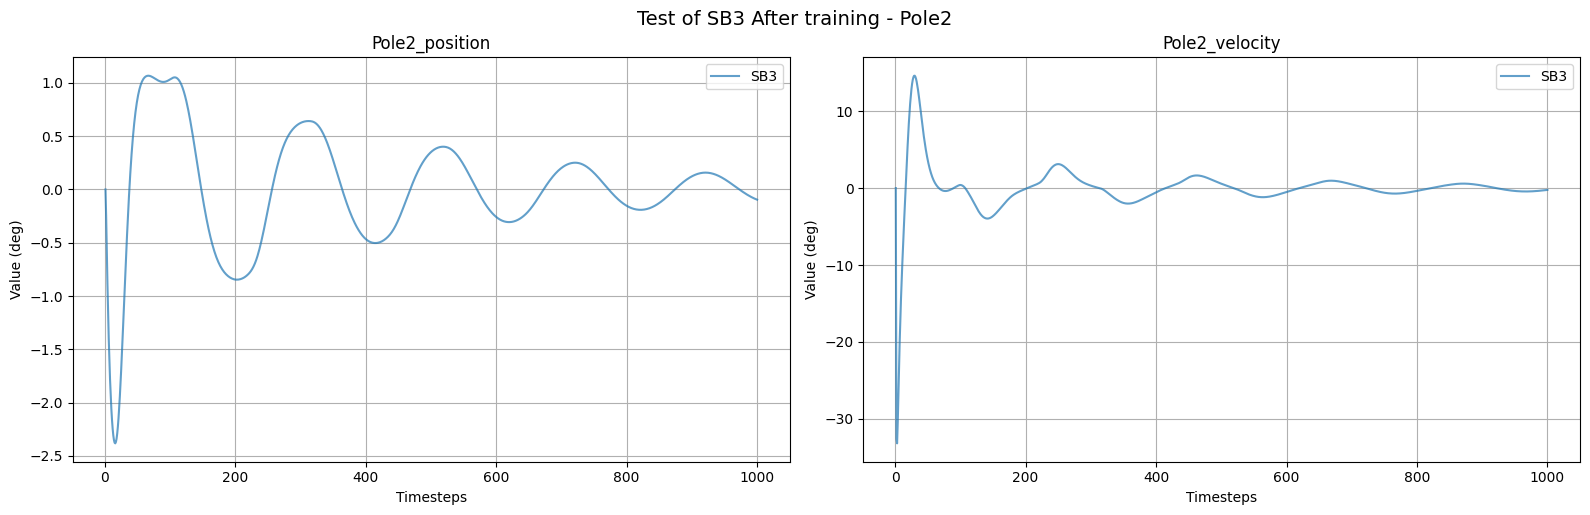

In [8]:
# Example usage without action
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity"]
file_paths = ["obs/SB3Test1/SB3Test1"]
plot_name = "Test of SB3 After training" 
file_name = ["SB3"]
plot_states_only(file_paths, plot_name, file_name, state_labels, timesteps)

In [58]:
,'obs\\MPCTune_Baseline','obs\\MPCTune_Con10','obs\\MPCTune_Con15','obs\\MPCTune_Con20','obs\\MPCTune_Con25','obs\\MPCTune_Con30','obs\\MPCTune_Opposit5','obs\\MPCTune_Pre100','obs\\MPCTune_Pre110', 'obs\\MPCTune_Pre120',
 'obs\\MPCTune_Pre80', 'obs\\MPCTune_Pre90','obs\\MPCTune_Same10','obs\\MPCTune_Temp','obs\\MPCTune_Temp10','obs\\MPCTune_Temp20',

IndentationError: unexpected indent (2305441650.py, line 2)

In [ ]:
# Example usage
state_labels = ["Cart_position", "Pole1_position", "Pole2_position", 
                "Cart_velocity", "Pole1_velocity", "Pole2_velocity", "Action"]
file_paths = ["obs/MPCTune_Pre80/MPCTune_Pre80","obs/MPCTune_Pre90/MPCTune_Pre90", "obs/MPCTune_Pre100/MPCTune_Pre100", "obs/MPCTune_Pre110/MPCTune_Pre110", "obs/MPCTune_Pre120/MPCTune_Pre120"]
plot_name = "MPCTune Comparison of PredictHorizon"
file_name = ["PredictHorizon_80", "PredictHorizon_90", "PredictHorizon_100", "PredictHorizon_110", "PredictHorizon_120"]
plot_multiple_files(file_paths, plot_name, file_name, state_labels, timesteps)

In [ ]:
All_file_paths = ['obs\\MPCTest_Opposit10','obs\\MPCTest_Opposit15','obs\\MPCTest_Opposit17','obs\\MPCTest_Opposit18','obs\\MPCTest_Opposit19','obs\\MPCTest_Opposit20','obs\\MPCTest_Opposit5','obs\\MPCTest_Same10','obs\\MPCTest_Same15','obs\\MPCTest_Same20','obs\\MPCTest_Same25',
 'obs\\MPCTest_Same30','obs\\MPCTest_Same35','obs\\MPCTest_Same40','obs\\MPCTest_Same42','obs\\MPCTune_1state1','obs\\MPCTune_1state10','obs\\MPCTune_1state5','obs\\MPCTune_2state15','obs\\MPCTune_2state5','obs\\MPCTune_3state15','obs\\MPCTune_3state5','obs\\MPCTune_4state0','obs\\MPCTune_4state5','obs\\MPCTune_5state0',
 'obs\\MPCTune_5state5','obs\\MPCTune_6state0','obs\\MPCTune_6state5','obs\\MPCTune_Baseline','obs\\MPCTune_Con10','obs\\MPCTune_Con15','obs\\MPCTune_Con20','obs\\MPCTune_Con25','obs\\MPCTune_Con30','obs\\MPCTune_Opposit5','obs\\MPCTune_Pre100','obs\\MPCTune_Pre110', 'obs\\MPCTune_Pre120',
 'obs\\MPCTune_Pre80', 'obs\\MPCTune_Pre90','obs\\MPCTune_Same10','obs\\MPCTune_Temp','obs\\MPCTune_Temp10','obs\\MPCTune_Temp20','obs\\SB3Test1','obs\\SB3Test_Opposit10','obs\\SB3Test_Opposit14','obs\\SB3Test_Opposit15','obs\\SB3Test_Opposit20','obs\\SB3Test_Opposit5','obs\\SB3Test_Same10',
 'obs\\SB3Test_Same15','obs\\SB3Test_Same20','obs\\SB3Test_Same25','obs\\SB3Test_Same30','obs\\SB3Test_Same32', 'obs\\SB3Test_Same35']

In [ ]:
'obs\\MPCTest_Opposit10','obs\\MPCTest_Opposit15','obs\\MPCTest_Opposit17','obs\\MPCTest_Opposit18','obs\\MPCTest_Opposit19','obs\\MPCTest_Opposit20','obs\\MPCTest_Opposit5','obs\\MPCTest_Same10','obs\\MPCTest_Same15','obs\\MPCTest_Same20','obs\\MPCTest_Same25',
 'obs\\MPCTest_Same30','obs\\MPCTest_Same35','obs\\MPCTest_Same40','obs\\MPCTest_Same42'

In [ ]:
'obs\\SB3Test1','obs\\SB3Test_Opposit10','obs\\SB3Test_Opposit14','obs\\SB3Test_Opposit15','obs\\SB3Test_Opposit20','obs\\SB3Test_Opposit5','obs\\SB3Test_Same10',
 'obs\\SB3Test_Same15','obs\\SB3Test_Same20','obs\\SB3Test_Same25','obs\\SB3Test_Same30','obs\\SB3Test_Same32', 'obs\\SB3Test_Same35'